<h1> Dead By Daylight </h1>

<img src="https://1000logos.net/wp-content/uploads/2023/04/Dead-by-Daylight-Logo.png" style="height:300px; width:600px"/>

<h2> PROJECT OVERVIEW </h2>

<h4> Resources </h4>

[Databricks Community](https://community.cloud.databricks.com/?o=2903637744786442#notebook/1747376958829000/command/1747376958829094)

- [Databricks: Published link](https://databricks-prod-cloudfront.cloud.databricks.com/public/4027ec902e239c93eaaa8714f173bcfc/2903637744786442/1747376958829000/8179177353340938/latest.html) 

[Canva presentation](https://www.canva.com/design/DAGMyJ2pKw8/ceyS507RG7ovzusLbCxBnw/view?utm_content=DAGMyJ2pKw8&utm_campaign=designshare&utm_medium=link&utm_source=editor)

[Project documentation](https://docs.google.com/document/d/1e_F-xESogJ7AGh0W7iJp34-JurqYgDTEN1VjYATbebo/edit?usp=sharing)

[Website API](https://dennisreep.nl/dbd/api/#/)

<h4> Overview </h4>

- Dead by Daylight (DBD) is a popular online multiplayer game
    - The game is essentially a 'cat and mouse' game. 
    - The game consists of 4 survivors & 1 killer on 1 map (selected out of the total maps).
    - The survivors' goal is to repair 5 generators to power an exit gate, so that they can escape
    - The killer's goal is to stop the reparation of the generators and kill the survivors
- This is a project that aims to analyse some user-generated data

<h4> Aims </h4>

- To scrape tabular Dead by Daylight data from the following [website](https://dennisreep.nl/dbd/)
    - https://dennisreep.nl/dbd/ 
- To model the data into dim & fact tables
- To clean the data to aid in data analysis
- To feature engineer columns to aid in data analysis
- To analyse the data to create 'fun facts' about the game based on the website's data

<h4> Data limitations </h4>

- Some of the data is factual
    - Example: The number of 'perks' the game has
    - Example: The number of 'killers' the game has
- Some of the data is user-generated, based on users own opinions of the game
    - **Example**: *Ratings of killer perks*
    - That is to say, the ratings aren't generated from gameplay statistics or gameplay data
    - This means that we have a limited sample size and the data may be biased or skewed to those users who use online websites to rate aspects of the game
        - In such cases, generalisations of findings to the wider population is limited. 
        - For factual information, it is possible to make such generalisations, however.

<h4> DATA OVERVIEW </h4>

The data will be structured as follows:

<h4> Character tables </h4>

- **stg_killers**
    - A list of all the killers and their rankings
- **stg_survivors**
    - A list of all the survivers and their rankings
- **dim_characters**
    - A combination of stg_killers and stg_survivors
    - With additional features added for data analysis purposes
     - Character release date, associated dlc, whether licensed or not, etc.

<h4> Map tables </h4>

- **temp_{killer}_maps**
    - One dataframe per each killer with data about their best maps
    - Collected whilst scraping the map data from each of the killer's individual website pages
    - The individual dataframes are then concatenated to created stg_maps_killer  
- **stg_maps_killer**
    - A long format table with a list of maps and their ratings for how good they are for each specific killer
- **dim_maps**
    - A list of only the maps from the fact_maps_killer & their 'average' rating across all killers
- **fact_maps**
    - stg_maps_killer in wide format with additional features added for data analysis purposes

<h4> Addon tables </h4>

- **temp_{killer}_addons**
    - One dataframe per each killer with data about their best addons
    - Collected whilst scraping the addon data from each of the killer's individual website pages
    - The individual dataframes are then concatenated to created stg_addons_killer  
- **stg_addons_killer**
    - A list of the killer addons.
- **dim_addons_killer**
    - A list of all the killer addons in the game with additional features added for data analysis purposes 

<h4> Perk tables </h4>

- **temp_perks_{killer}_specific**
    - One dataframe per each killer with data about their best perks
    - Collected whilst scraping the killer top perk data from each of the killer's individual website pages
    - The individual dataframes are then concatenated to created stg_perks_killer 
- **stg_perks_killer**
    - Perk data for the killer.
    - Base data pull 
- **stg_perks_survivor**
    - Perk data for the survivor.
    - Base data pull  
- **dim_perks**
    - A list of all of the perks in the game: both survivor and killer
    - A combination of dim_perks_survivor & dim_perks_killer
    - dim_perks contains all of the perks, rated by how good they are in general. 
- **stg_perks_killer_specific**
    - Contains al the perks with a rating for how good they are for each specific killer  
- **fact_perks_killer_specific**
    - Contains al the perks with a rating for how good they are for each specific killer
        - With additional features added for data analysis purposes
- **fact_perks_killer_specific_wide**
    - Contains al the perks with a rating for how good they are for each specific killer
        - With additional features added for data analysis purposes
        - Aggregated in wide format, for ease of analysis.
- **fact_perks**
    - Combines dim_perks with the fact_perks_killer_specific_ratings into one fact table
        - Killer and Survivor perks, along with the killer_specific_ratings 

<h4> Match data </h4>

- **fact_matches**
    - A fact table containing data from a Dead by Daylight player.
    - Spans 6 months of data from several hundred matches.
        - [Forum: data source](https://forums.bhvr.com/dead-by-daylight/discussion/401797/dbd-match-data-spreadsheet)
        - [Pre-clean data](https://docs.google.com/spreadsheets/d/1pQQ4tkxbADrbLWvZn7t74QUSUGpiOzXQA-2_DZN3qz0/edit?usp=sharing)
        - [Clean data](https://docs.google.com/spreadsheets/d/1tjXjSYdhW7II9yW9v1nUzF2A4maXpAubhI50igW1j2s/edit?usp=sharing)


<h3> DATA HIERARCHY CHART </h3>

Made using dbdiagram.io

- [Conceptual model](https://dbdiagram.io/d/[DBD]-Conceptual-model-August-2024-66ade2c08b4bb5230e1d778c)
- [Logical model](https://dbdiagram.io/d/DBD-667abfa89939893dae3753df)

<img src="/Users/samtaylor/Desktop/Data/Projects/dbd/img/Conceptual model.png"/>|

<h2>  2. DATABASE CREATION </h2>

<h3> IMPORT LIBRARIES </h3> 

In [45]:
# Import libraries 
'''
REFERENCE MATERIAL 

1. Template code for scraping a website with 'request' & 'HTMLTableParser
>> https://www.geeksforgeeks.org/scrape-tables-from-any-website-using-python/

'''
 
# For opening and retrieving data from URLs over HTTP in Python.
import urllib.request

# For 'beautifying' python data structures
from pprint import pprint

# For parsing tables on a website
from html_table_parser.parser import HTMLTableParser

# For converting the parsed data to a Pandas dataframe
import pandas as pd

# For feature engineering of columns
import numpy as np

# For regular expressions (Regex)
import re  

# For parsing HTML and XML documents, extracting data, and navigating through their hierarchical structure
from bs4 import BeautifulSoup

# For URL-encoding special characters in a string, ensuring they can be safely used as part of a URL
from urllib.parse import quote

# For the data quality checking report function
import io

# For expanding the data table display settings 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

<h3> CREATE FUNCTIONS </h3> 

In [46]:
# Create functions

## Get contents of a URL

'''
HOW TO USE 

1. Define the URL, start, and end table indices, and the DataFrame name
>> url = 'https://dennisreep.nl/dbd/perks/survivor/'
>> start_table = 1
>> end_table = 18
>> dataframe_name = 'survivor_perks_df'

2. Call the function to scrape tables and save the DataFrame
>> killer_perks = scrape_tables(url, start_table, end_table dataframe_name)
'''

# Function to get the contents of the URL
def url_get_contents(url):
    req = urllib.request.Request(url=url, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:90.0) Gecko/20100101 Firefox/90.0'})
    f = urllib.request.urlopen(req)
    return f.read()

# Function to scrape tables and format column headers
def scrape_tables(url, start, end, dataframe_name):
    # Defining the HTML contents of the URL
    xhtml = url_get_contents(url).decode('utf-8')
    
    # Defining the HTMLTableParser object
    p = HTMLTableParser()
    
    # Feeding the HTML contents to the HTMLTableParser object
    p.feed(xhtml)
    
    # Initialize a list to store DataFrames
    dataframes = []
    
    # Loop through the specified range of tables
    for i in range(start, end + 1):
        # Create an empty list to store the split strings
        split_result = []
        
        # Iterate through each list in the table header (first row)
        for column in p.tables[i][0]:
            # Join all elements in the inner list into a string
            ini_string = ''.join(column)
            
            # Apply getVals operation to ini_string
            getVals = [val.lower() for val in ini_string if val.isalnum() or val.isspace() or val == '-']
            
            # Add underscores to separate words
            result = '_'.join(''.join(getVals).split()).replace('-', '_')
            
            # Append the split result to the list
            split_result.append(result)
        
        # Create a df for the current table
        table_df = pd.DataFrame(p.tables[i][1:], columns=split_result)
        
        # Append the df to the list
        dataframes.append(table_df)
    
    # Concatenate all dfs into one
    concatenated_df = pd.concat(dataframes, ignore_index=True)
    
    # Assign variable name
    globals()[dataframe_name] = concatenated_df
    
    # Return df
    return concatenated_df

# QUALITY CHECK REPORT
## To check the integrity of the data pulls across multiple areas

# For better display (in rows as opposed to in a dictionary)
def format_dict(d):
    return "\n".join(f"{key}: {value}" for key, value in d.items())

def dataframe_report(df):
    report = {}

    # .info() information
    buffer = io.StringIO()
    df.info(buf=buffer)
    report['info'] = buffer.getvalue()
    
    # Summary statistics for numerical columns rounded to 2 decimal places
    report['summary_statistics'] = df.describe().round(2).to_dict()

    # Number of duplicates in the dataframe
    num_duplicates = df.duplicated().sum()
    report['num_duplicates'] = num_duplicates
    
    # Duplicate rows in the dataframe
    duplicate_rows = df[df.duplicated()]
    report['duplicate_rows'] = duplicate_rows

    # Number of blanks in each column
    blank_counts = df.apply(lambda x: (x == '').sum())
    report['num_blanks'] = blank_counts[blank_counts > 0].to_dict()

    # Number of nulls in each column
    null_counts = df.isnull().sum()
    report['num_nulls'] = null_counts[null_counts > 0].to_dict()

    # Number of unique values in each column
    report['num_unique_values'] = df.nunique().to_dict()

    # Number of columns with a single unique value
    report['constant_columns'] = [col for col in df.columns if df[col].nunique() == 1]

    # Print the report
    separator = "#" * 30
    print(f"{separator}\n{'INFO':^30}\n{separator}")
    print(report['info'])
    print("\n")

    print(f"{separator}\n{'SUMMARY STATS':^30}\n{separator}")
    print(pd.DataFrame(report['summary_statistics']).to_string())
    print("\n")

    print(f"{separator}\n{'DUPLICATES':^30}\n{separator}")
    print(f"Number of Duplicates: {report['num_duplicates']}")
    if num_duplicates > 0:
        print("\nDuplicate Rows:")
        print(report['duplicate_rows'].to_string(index=False))
    print("\n")

    print(f"{separator}\n{'BLANKS':^30}\n{separator}")
    if report['num_blanks']:
        print("Number of Blanks in Each Column:")
        print(format_dict(report['num_blanks']))
        print("\nRows with Blanks:")
        print(df[df.isin(['']).any(axis=1)].to_string(index=False))
    else:
        print("No blanks found.")
    print("\n")

    print(f"{separator}\n{'NULLS':^30}\n{separator}")
    if report['num_nulls']:
        print("Number of Nulls in Each Column:")
        print(format_dict(report['num_nulls']))
        print("\nRows with Nulls:")
        # Display the first 5 rows with any null values
        print(df[df.isnull().any(axis=1)].to_string(index=False))
    else:
        print("No null values found.")
    print("\n")

    print(f"{separator}\n{'UNIQUE VALUES':^30}\n{separator}")
    print(format_dict(report['num_unique_values']))
    print("\n")

    print(f"{separator}\n{'CONSTANT COLUMNS':^30}\n{separator}")
    print(report['constant_columns'])
    print("\n")

<h3> CHARACTERS </h3>

<h4>STG_KILLERS</h4>

In [47]:
# KILLERS 

# Define the URL, start, and end table indices, and the dataframe name
url = 'https://dennisreep.nl/dbd/killers/'
start_table = 1
end_table = 3
dataframe_name = 'killers'

# Call the function to scrape tables and save the df
stg_killers = scrape_tables(url, start_table, end_table, dataframe_name)

# Drop the icon column (as it's blank)
stg_killers = stg_killers.drop(columns="icon")

# Format the name column, so that they are lowercase and separated by underscored
stg_killers['name'] = stg_killers['name'].apply(lambda x: x.lower().replace(" ", "_"))

# Rename 'name' column to 'perk_name' & rate to rating
stg_killers = stg_killers.rename(columns={'rate':'rating'})

# Create an "is_survivor" column 
stg_killers['is_survivor'] = 0 

# Add last_updated column
stg_killers["last_updated"] = pd.Timestamp.today().strftime('%Y-%m-%d')

# Inspect
stg_killers.head()

name tier rating  is_survivor last_updated
0     blight    A   4.21            0   2024-08-14
1      nurse    A   4.11            0   2024-08-14
2     spirit    A   4.11            0   2024-08-14
3  hillbilly    A   4.03            0   2024-08-14
4   huntress    A   4.03            0   2024-08-14

<h4> STG_SURVIVORS </h4>

In [48]:
# SURVIVORS 

# Define the URL, start, and end table indices, and the DataFrame name
url = 'https://dennisreep.nl/dbd/survivors/'
start_table = 1
end_table = 3
dataframe_name = 'survivors'

# Call the function to scrape tables and save the DataFrame
stg_survivors = scrape_tables(url, start_table, end_table, dataframe_name)

# Drop the icon column (as it's blank)
stg_survivors = stg_survivors.drop(columns="icon")

# Format the name column, so that they are lowercase and separated by underscored
stg_survivors['name'] = stg_survivors['name'].apply(lambda x: x.lower().replace(" ", "_"))

# Rename 'name' column to 'perk_name' & rate to rating
stg_survivors = stg_survivors.rename(columns={'rate':'rating'})

# Create an "is_survivor" column 
stg_survivors['is_survivor'] = 1  

# Add last_updated column
stg_survivors["last_updated"] = pd.Timestamp.today().strftime('%Y-%m-%d')

# Inspect
stg_survivors.head()

name tier rating  is_survivor last_updated
0          leon    B   3.96            1   2024-08-14
1  nicolas_cage    B   3.93            1   2024-08-14
2          kate    B   3.91            1   2024-08-14
3           ash    B   3.85            1   2024-08-14
4        cheryl    B   3.83            1   2024-08-14

<h4> DIM_CHARACTERS </h4>

In [49]:
# Create dataframe
dim_characters = pd.concat([stg_killers,stg_survivors], ignore_index=True)

In [50]:
# [DIM_CHARACTER] FEATURE ENGINEERING

## Release date
## Map associated with character
## If character is a licensed character or not
### Source: https://en.wikipedia.org/wiki/Dead_by_Daylight
### Note: Adding manually due to time constraints. However, should be possible to automate.

dlc_data = [
    {'Title': 'The Last Breath', 'Release Date': '2016-08-18', 'Killer': 'nurse', 'Survivor(s)': 'nea', 'Map (Realm)': 'The Asylum (Crotus Prenn Asylum)'},
    {'Title': 'Halloween †', 'Release Date': '2016-10-25', 'Killer': 'shape', 'Survivor(s)': 'laurie', 'Map (Realm)': 'Lampkin Lane (Haddonfield)'},
    {'Title': 'Of Flesh and Mud', 'Release Date': '2016-12-08', 'Killer': 'hag', 'Survivor(s)': 'ace', 'Map (Realm)': 'The Pale Rose (Backwater Swamp)'},
    {'Title': 'Left Behind †', 'Release Date': '2017-03-08', 'Killer': '', 'Survivor(s)': 'bill', 'Map (Realm)': ''},
    {'Title': 'Spark of Madness', 'Release Date': '2017-05-11', 'Killer': 'doctor', 'Survivor(s)': 'feng', 'Map (Realm)': 'Treatment Theatre (Léry\'s Memorial Institute)'},
    {'Title': 'A Lullaby for the Dark', 'Release Date': '2017-07-27', 'Killer': 'huntress', 'Survivor(s)': 'david_king', 'Map (Realm)': 'Mother\'s Dwelling (Red Forest)'},
    {'Title': 'Leatherface †', 'Release Date': '2017-09-14', 'Killer': 'cannibal', 'Survivor(s)': '', 'Map (Realm)': ''},
    {'Title': 'A Nightmare on Elm Street †', 'Release Date': '2017-10-26', 'Killer': 'nightmare', 'Survivor(s)': 'quentin', 'Map (Realm)': 'Badham Preschool (Springwood)'},
    {'Title': 'Saw †', 'Release Date': '2018-01-23', 'Killer': 'pig', 'Survivor(s)': 'david_tapp', 'Map (Realm)': 'The Game (Gideon Meat Plant)'},
    {'Title': 'Curtain Call', 'Release Date': '2018-06-12', 'Killer': 'clown', 'Survivor(s)': 'kate', 'Map (Realm)': 'Father Campbell\'s Chapel (Crotus Prenn Asylum)'},
    {'Title': 'Shattered Bloodline', 'Release Date': '2018-09-18', 'Killer': 'spirit', 'Survivor(s)': 'adam', 'Map (Realm)': 'Family Residence (Yamaoka Estate)'},
    {'Title': 'Darkness Among Us', 'Release Date': '2018-12-11', 'Killer': 'legion', 'Survivor(s)': 'jeff', 'Map (Realm)': 'Mount Ormond Resort (Ormond)'},
    {'Title': 'Demise of the Faithful', 'Release Date': '2019-03-19', 'Killer': 'plague', 'Survivor(s)': 'jane', 'Map (Realm)': 'Temple of Purgation (Red Forest)'},
    {'Title': 'Ash vs Evil Dead †', 'Release Date': '2019-04-02', 'Killer': '', 'Survivor(s)': 'ash', 'Map (Realm)': ''},
    {'Title': 'Ghost Face †', 'Release Date': '2019-06-18', 'Killer': 'ghost_face', 'Survivor(s)': '', 'Map (Realm)': ''},
    {'Title': 'Stranger Things †', 'Release Date': '2019-09-17', 'Killer': 'demogorgon', 'Survivor(s)': 'steve, nancy', 'Map (Realm)': 'Underground Complex (Hawkins National Laboratory)'},
    {'Title': 'Cursed Legacy', 'Release Date': '2019-12-03', 'Killer': 'oni', 'Survivor(s)': 'yui', 'Map (Realm)': 'Sanctum of Wrath (Yamaoka Estate)'},
    {'Title': 'Chains of Hate', 'Release Date': '2020-03-10', 'Killer': 'deathslinger', 'Survivor(s)': 'zarina', 'Map (Realm)': 'Dead Dawg Saloon (Grave of Glenvale)'},
    {'Title': 'Silent Hill †', 'Release Date': '2020-06-16', 'Killer': 'executioner', 'Survivor(s)': 'cheryl', 'Map (Realm)': 'Midwich Elementary School (Silent Hill)'},
    {'Title': 'Descend Beyond', 'Release Date': '2020-09-08', 'Killer': 'blight', 'Survivor(s)': 'felix', 'Map (Realm)': ''},
    {'Title': 'A Binding of Kin', 'Release Date': '2020-12-01', 'Killer': 'twins', 'Survivor(s)': 'élodie', 'Map (Realm)': ''},
    {'Title': 'All-Kill', 'Release Date': '2021-03-30', 'Killer': 'trickster', 'Survivor(s)': 'yun-jin', 'Map (Realm)': ''},
    {'Title': 'Resident Evil †', 'Release Date': '2021-06-15', 'Killer': 'nemesis', 'Survivor(s)': 'leon, jill', 'Map (Realm)': 'Raccoon City Police Station (Raccoon City)'},
    {'Title': 'Hellraiser †', 'Release Date': '2021-09-07', 'Killer': 'cenobite', 'Survivor(s)': '', 'Map (Realm)': ''},
    {'Title': 'Hour of the Witch', 'Release Date': '2021-10-19', 'Killer': '', 'Survivor(s)': 'mikaela', 'Map (Realm)': ''},
    {'Title': 'Portrait of a Murder', 'Release Date': '2021-11-30', 'Killer': 'artist', 'Survivor(s)': 'jonah', 'Map (Realm)': 'Eyrie of Crows (Forsaken Boneyard)'},
    {'Title': 'Sadako Rising †', 'Release Date': '2022-03-08', 'Killer': 'onryo', 'Survivor(s)': 'yoichi', 'Map (Realm)': ''},
    {'Title': 'Roots of Dread', 'Release Date': '2022-06-07', 'Killer': 'dredge', 'Survivor(s)': 'haddie', 'Map (Realm)': 'Garden of Joy (Withered Isle)'},
    {'Title': 'Resident Evil: Project W †', 'Release Date': '2022-08-30', 'Killer': 'mastermind', 'Survivor(s)': 'ada, rebecca', 'Map (Realm)': 'Raccoon City Police Station East Wing/West Wing (Raccoon City)'},
    {'Title': 'Forged in Fog', 'Release Date': '2022-11-22', 'Killer': 'knight', 'Survivor(s)': 'vittorio', 'Map (Realm)': 'Shattered Square (Decimated Borgo)'},
    {'Title': 'Tools of Torment', 'Release Date': '2023-03-07', 'Killer': 'skull_merchant', 'Survivor(s)': 'thalita, renato', 'Map (Realm)': 'Shelter Woods (The MacMillan Estate)'},
    {'Title': 'End Transmission', 'Release Date': '2023-06-13', 'Killer': 'singularity', 'Survivor(s)': 'gabriel', 'Map (Realm)': 'Toba Landing (Dvarka Deepwood)'},
    {'Title': 'Nicolas Cage †', 'Release Date': '2023-07-25', 'Killer': '', 'Survivor(s)': 'nicolas_cage', 'Map (Realm)': ''},
    {'Title': 'Alien †', 'Release Date': '2023-08-29', 'Killer': 'xenomorph', 'Survivor(s)': 'ellen', 'Map (Realm)': 'Nostromo Wreckage (Dvarka Deepwood)'},
    {'Title': 'Chucky †', 'Release Date': '2023-11-28', 'Killer': 'good_guy', 'Survivor(s)': '', 'Map (Realm)': ''},
    {'Title': 'Alan Wake †', 'Release Date': '2024-01-30', 'Killer': '', 'Survivor(s)': 'alan', 'Map (Realm)': ''},
    {'Title': 'All Things Wicked', 'Release Date': '2024-03-12', 'Killer': 'unknown', 'Survivor(s)': 'sable', 'Map (Realm)': 'Greenville Square (Withered Isle)'},
    {'Title': 'Dungeons & Dragons †', 'Release Date': '2024-06-03', 'Killer': 'lich', 'Survivor(s)': 'aestri', 'Map (Realm)': 'Forgotten Ruins (Decimated Borgo)'},
]

# Convert DLC data to a more accessible format
dlc_info = {}
for dlc in dlc_data:
    for role in ['Killer', 'Survivor(s)']:
        characters = dlc[role].split(', ') if dlc[role] else []
        for character in characters:
            dlc_info[character] = {
                'Release Date': dlc['Release Date'],
                'is_licensed': 1 if '†' in dlc['Title'] else 0,
                'Map': dlc['Map (Realm)'] if 'Map (Realm)' in dlc else '',
                'DLC Title': dlc['Title']
            }

# Default release date
default_release_date = '2016-06-14'

# Function to get DLC info
def get_dlc_info(character):
    if character in dlc_info:
        return dlc_info[character]
    else:
        return {'Release Date': default_release_date, 'is_licensed': 0, 'Map': '', 'DLC Title': ''}

# Apply DLC info to dim_characters
dlc_columns = ['Release Date', 'is_licensed', 'Map', 'DLC Title']
for column in dlc_columns:
    dim_characters[column] = dim_characters['name'].apply(lambda x: get_dlc_info(x)[column])


In [51]:
# [DIM_CHARACTER] FEATURE ENGINEERING
# Add prices to characters 

# Convert 'Release Date' to datetime format
dim_characters['Release Date'] = pd.to_datetime(dim_characters['Release Date'])

# Define the discounted threshold date
discounted_date = pd.to_datetime('2021-10-19')

# Characters that cost 0 iridescent or auric cells
included_with_game_characters = [
    'trapper', 'wraith', 'hillbilly', 'nurse', 'huntress', 
    'hag', 'doctor', 'dwight', 'meg', 'claudette', 
    'jake', 'nea', 'david_king', 'ace','feng',
    'bill'
]

# Characters automatically reduced to 4500 iridescent shards and 250 auric cells
auto_reduced_characters = [
    'kate', 'adam', 'jeff', 'jane', 'yui', 'zarina', 'felix', 'élodie', 'jonah',
    'yun-jin', 'mikaela', 'hag', 'doctor', 'clown', 'spirit', 'legion', 'plague', 'knight', 'vittorio',
    'oni', 'deathslinger', 'blight', 'twins', 'trickster', 'dredge', 'renato', 'thalita', 'haddie', 'skull_merchant', 'artist'
]

# Function to determine currency costs based on release date, licensing status, and auto reduction
def calculate_currency_costs(row):
    if row['is_licensed'] == 1:
        row['iridescent_shard_cost'] = None  # Set to None for licensed characters
        row['auric_cell_cost'] = 500  # Set auric cell cost for licensed characters
    elif row['name'] in included_with_game_characters:
        row['iridescent_shard_cost'] = None
        row['auric_cell_cost'] = None
    else:
        if row['name'] in auto_reduced_characters:
            row['iridescent_shard_cost'] = 4500
            row['auric_cell_cost'] = 250
        else:
            if row['Release Date'] <= discounted_date:
                row['iridescent_shard_cost'] = 4500
                row['auric_cell_cost'] = 250
            else:
                row['iridescent_shard_cost'] = 9000
                row['auric_cell_cost'] = 500
    return row

# Apply the function to each row
dim_characters = dim_characters.apply(calculate_currency_costs, axis=1)

In [52]:
# Define conversion rates
conversion_rate_auric_to_iridescent = 9000 / 500  # 9000 iridescent shards / 500 auric cells
conversion_rate_iridescent_to_euros = 4.99 / 9000  # 4.99 euros / 9000 iridescent shards

# Function to calculate total cost in euros
def calculate_total_cost(row):
    if pd.notna(row['iridescent_shard_cost']):
        return row['iridescent_shard_cost'] * conversion_rate_iridescent_to_euros
    elif pd.notna(row['auric_cell_cost']):
        return row['auric_cell_cost'] * conversion_rate_auric_to_iridescent * conversion_rate_iridescent_to_euros
    else:
        return 0

# Apply the function to create the 'total_cost_euros' column
dim_characters['total_cost_euros'] = dim_characters.apply(calculate_total_cost, axis=1).round(2)

In [53]:
# Renaming columns
dim_characters.rename(columns=
                 {'Release Date': 'release_date', 'Map': 'map','DLC Title': 'dlc_title'}
                 , inplace=True)

In [54]:
# Initial data quality check 
dataframe_report(dim_characters)

##############################
             INFO             
##############################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   78 non-null     object        
 1   tier                   78 non-null     object        
 2   rating                 78 non-null     object        
 3   is_survivor            78 non-null     int64         
 4   last_updated           78 non-null     object        
 5   release_date           78 non-null     datetime64[ns]
 6   is_licensed            78 non-null     int64         
 7   map                    78 non-null     object        
 8   dlc_title              78 non-null     object        
 9   iridescent_shard_cost  32 non-null     float64       
 10  auric_cell_cost        63 non-null     float64       
 11  total_cost_euros       78 non-nu

**[QUALITY CHECK] DIM_CHARACTERS**<br><br>
Result: OK
- There are 0 duplicates
- The null or blank values are explainable
    - Not all characters are released with their own map 
    - Not all characters have a dlc_title associated with them
<br><br>

To do:
- Change data types

In [55]:
# Change data types

# Convert rating to categorical
dim_characters['tier'] = dim_characters['tier'].astype(pd.CategoricalDtype(categories=['?', 'G', 'F', 'E', 'D', 'C', 'B', 'A', 'S'], ordered=True))

# Convert date columns to datetime
dim_characters['last_updated'] = pd.to_datetime(dim_characters['last_updated'])
dim_characters['release_date'] = pd.to_datetime(dim_characters['release_date'])

dim_characters = dim_characters.astype(
    {
     'name': 'string', 
     'rating': 'float', 
     'is_survivor': 'bool',
     'is_licensed': 'bool'
     })

In [56]:
# Data quality check 
dataframe_report(dim_characters)

##############################
             INFO             
##############################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   78 non-null     string        
 1   tier                   78 non-null     category      
 2   rating                 78 non-null     float64       
 3   is_survivor            78 non-null     bool          
 4   last_updated           78 non-null     datetime64[ns]
 5   release_date           78 non-null     datetime64[ns]
 6   is_licensed            78 non-null     bool          
 7   map                    78 non-null     object        
 8   dlc_title              78 non-null     object        
 9   iridescent_shard_cost  32 non-null     float64       
 10  auric_cell_cost        63 non-null     float64       
 11  total_cost_euros       78 non-nu

In [57]:
dim_characters.head()

name tier  rating  is_survivor last_updated release_date  is_licensed                                map               dlc_title  iridescent_shard_cost  auric_cell_cost  total_cost_euros
0     blight    A    4.21        False   2024-08-14   2020-09-08        False                                             Descend Beyond                 4500.0            250.0               2.5
1      nurse    A    4.11        False   2024-08-14   2016-08-18        False   The Asylum (Crotus Prenn Asylum)         The Last Breath                    NaN              NaN               0.0
2     spirit    A    4.11        False   2024-08-14   2018-09-18        False  Family Residence (Yamaoka Estate)     Shattered Bloodline                 4500.0            250.0               2.5
3  hillbilly    A    4.03        False   2024-08-14   2016-06-14        False                                                                               NaN              NaN               0.0
4   huntress    A    4.03        False   2024-08-14   2017-07-27        False     Mother's Dwelling (Red Forest)  A Lullaby for the Dark                    NaN              NaN               0.0

<h3> PERKS </h3>

<h4> STG_PERKS_KILLER </h4>

In [58]:
# STG_PERKS_KILLER

# Define the URL, start, and end table indices, and the DataFrame name
url = 'https://dennisreep.nl/dbd/perks/killer/'
start_table = 1
end_table = 16
dataframe_name = 'killer_perks'

# Call the function to scrape tables and save the dataframe
stg_perks_killers = scrape_tables(url, start_table, end_table, dataframe_name)

# Drop the icon column (as it's blank)
stg_perks_killers = stg_perks_killers.drop(columns="icon")

# Rename 'name' column to 'perk_name' & rate to rating & killer to acquired_from
stg_perks_killers = stg_perks_killers.rename(columns={'rate':'rating','name':'perk_name','killer':'acquired_from'})

# Format the column, so that they are lowercase and separated by underscored
stg_perks_killers['acquired_from'] = stg_perks_killers['acquired_from'].apply(lambda x: x.lower().replace(" ", "_"))

# Format the column, so that they are lowercase and separated by underscored
stg_perks_killers['perk_name'] = stg_perks_killers['perk_name'].apply(lambda x: x.lower().replace(" ", "_"))

# Replace 'all' with 'all_killers' in the 'killer' column
stg_perks_killers['acquired_from'] = stg_perks_killers['acquired_from'].replace('all', 'all_killers')

# Create an "is_survivor" column 
stg_perks_killers['is_survivor'] = 0  

# Add last_updated column
stg_perks_killers["last_updated"] = pd.Timestamp.today().strftime('%Y-%m-%d')

# Inspect
stg_perks_killers.head(5)

perk_name                                        description acquired_from tier rating  is_survivor last_updated
0                      deadlock  You induce mental suffering by crushing any ho...      cenobite    A   4.49            0   2024-08-14
1                         surge  Your eerie presence charges the air and interf...    demogorgon    A   4.46            0   2024-08-14
2  scourge_hook:_pain_resonance  Overwhelming pain reverberates outwards. At th...        artist    A   4.37            0   2024-08-14
3          corrupt_intervention  Your prayers invoke a dark power that meddles ...        plague    A   4.37            0   2024-08-14
4              weave_attunement  You are so attuned to magical energies that yo...          lich    A   4.36            0   2024-08-14

<h4> STG_PERKS_SURVIVOR </h4>

In [59]:
# SURVIVOR PERKS

# Define the URL, start, and end table indices, and the DataFrame name
url = 'https://dennisreep.nl/dbd/perks/survivor/'
start_table = 1
end_table = 18
dataframe_name = 'stg_perks_survivors'

# Call the function to scrape tables and save the dataframe
stg_perks_survivors = scrape_tables(url, start_table, end_table, dataframe_name)

# Drop the icon column (as it's blank)
stg_perks_survivors = stg_perks_survivors.drop(columns="icon")

# Add last_updated column
stg_perks_survivors["last_updated"] = pd.Timestamp.today().strftime('%Y-%m-%d')

# Rename 'name' column to 'perk_name' & rate to rating
stg_perks_survivors = stg_perks_survivors.rename(columns={'name': 'perk_name','rate':'rating','survivor':'acquired_from'})

# Format the column, so that the values are lowercase and separated by underscores
stg_perks_survivors['acquired_from'] = stg_perks_survivors['acquired_from'].apply(lambda x: x.lower().replace(" ", "_"))

# Format the column, so that the values are lowercase and separated by underscores
stg_perks_survivors['perk_name'] = stg_perks_survivors['perk_name'].apply(lambda x: x.lower().replace(" ", "_"))

# Replace 'all' with 'all_survivors' in the 'survivor' column
stg_perks_survivors['acquired_from'] = stg_perks_survivors['acquired_from'].replace('all', 'all_survivors')

# Create an "is_survivor" column 
stg_perks_survivors['is_survivor'] = 1  

# Inspect
stg_perks_survivors.head()

perk_name                                        description  acquired_from tier rating last_updated  is_survivor
0  windows_of_opportunity  Unlocks potential in your Aura-reading ability...           kate    A   4.33   2024-08-14            1
1                   lithe  Performing a Rushed Vault triggers Lithe : Gra...           feng    A   4.32   2024-08-14            1
2           we'll_make_it  Helping others heightens your morale.  Increas...  all_survivors    A   4.25   2024-08-14            1
3          off_the_record  You have learnt that a quiet approach is somet...         zarina    A   4.22   2024-08-14            1
4              resilience  You are motivated in dire situations.  Increas...  all_survivors    A    4.2   2024-08-14            1

<h4> DIM_PERKS </h4>

In [60]:
# dim_perks
dim_perks = pd.concat([stg_perks_killers,stg_perks_survivors], ignore_index=True)

In [61]:
# Use perk_name column to categorise the perks 
## Based on this reddit thread: https://www.reddit.com/r/deadbydaylight/comments/1awkgnt/ive_categorized_all_of_the_perks_because_i_felt/
## Note: Could be possible to do machine learning on 'description' column and auto-assign categories. Not done due to lack of time.

# Define perk_name_category_map for each category with lowercase and underscores
perk_name_category_map = {
    "killer_info": ["alert", "dark_sense", "fogwise", "inner_focus", "object_of_obsession", "premonition", "scene_partner", "spine_chill", "troubleshooter", "wiretap"],
    "survivor_info": ["still_sight", "aftercare", "better_together", "blood_pact", "bond", "boon:_illumination", "clairvoyance", "counterforce", "déjà_vu", "detective's_hunch", "empathic_connection", "empathy", "kindred", "left_behind", "lucky_star", "open-handed", "rookie_spirit", "small_game", "visionary", "wake_up!", "windows_of_opportunity"],
    "distract_and_escape": ["mirrored_illusion", "any_means_necessary", "blast_mine", "boil_over", "breakdown", "camaraderie", "chemical_trap", "dead_hard", "deception", "decisive_strike", "deliverance", "diversion", "flip-flop", "head_on", "power_struggle", "red_herring", "repressed_alliance", "resilience", "slippery_meat", "soul_guard", "up_the_ante", "wicked"],
    "stealth": ["boon:_shadow_step", "calm_spirit", "cut_loose", "dance_with_me", "distortion", "iron_will", "light-footed", "lightweight", "low_profile", "lucky_break", "off_the_record", "parental_guidance", "poised", "quick_&_quiet", "self-preservation", "sole_survivor", "teamwork:_collective_stealth"],
    "movement_speed": ["background_player", "balanced_landing", "boon:_dark_theory", "dramaturgy", "fixated", "hope", "lithe", "overcome", "smash_hit", "sprint_burst", "teamwork:_power_of_two", "urban_evasion"],
    "rescue_and_protect": ["babysitter", "borrowed_time", "breakout", "buckle_up", "desperate_measures", "made_for_this", "mettle_of_man", "no_one_left_behind", "reassurance", "saboteur", "we're_gonna_live_forever"],
    "healing_and_recovery": ["adrenaline", "autodidact", "bite_the_bullet", "blood_rush", "boon:_circle_of_healing", "boon:_exponential", "botany_knowledge", "for_the_people", "inner_strength", "no_mither", "plot_twist", "reactive_healing", "resurgence", "second_wind", "self-care", "solidarity", "strength_in_shadows", "tenacity", "unbreakable", "vigil", "we'll_make_it"],
    "objective": ["bardic_inspiration", "better_than_new", "corrective_action", "deadline", "fast_track", "friendly_competition", "hyperfocus", "invocation:_weaving_spiders", "leader", "overzealous", "potential_energy", "prove_thyself", "quick_gambit", "stake_out", "technician", "this_is_not_happening"],
    "items_and_chests": ["ace_in_the_hole", "appraisal", "built_to_last", "champion_of_light", "flashbang", "pharmacy", "plunderer's_instinct", "residual_manifest", "scavenger", "streetwise"],
    "mapwide_and_far_info": ["weave_attunement","alien_instinct","barbecue_&_chilli","bitter_murmur","darkness_revealed","discordance","friends_'til_the_end","gearhead","hex:_retribution","lethal_pursuer","scourge_hook:_floods_of_rage","hangman's_trick","surveillance","territorial_imperative"],
    "nearby_info_and_tracking": ["a_nurse's_calling","awakened_awareness","bloodhound","deerstalker","hex:_face_the_darkness","hoarder","i'm_all_ears","infectious_fright","nowhere_to_hide","predator","spies_from_the_shadows","stridor","thwack!","ultimate_weapon","whispers","zanshin_tactics"],
    "terror_radius": ["beast_of_prey","dark_devotion","distressing","furtive_chase","insidious","machine_learning","monitor_&_abuse","tinkerer","trail_of_torment","unforeseen"],
    "action_and_movement_speed": ["dark_arrogance","agitation","batteries_included","brutal_strength","fire_up","game_afoot","play_with_your_food","rapid_brutality","shadowborn","superior_anatomy","unbound"],
    "denial": ["bamboozle","blood_warden","cruel_limits","hex:_blood_favour","hex:_crowd_control","hex:_undying","iron_grasp","lightborn","mad_grit","no_way_out","shattered_hope"],
    "brutal": ["coup_de_grâce","dissolution","dragon's_grip","enduring","forced_penance","franklin's_demise","hex:_devour_hope","hex:_haunted_ground","hex:_no_one_escapes_death","hex:_two_can_play","hubris","iron_maiden","knock_out","make_your_choice","rancor","save_the_best_for_last","monstrous_shrine","spirit_fury","starstruck","terminus","unrelenting"],
    "ailment": ["languid_touch","blood_echo","deathbound","forced_hesitation","genetic_limits","hex:_plaything","hex:_the_third_seal","hysteria","mindbreaker","nemesis","septic_touch","sloppy_butcher"],
    "regress": ["call_of_brine", "eruption","hex:_huntress_lullaby","hex:_ruin","oppression","overcharge","overwhelming_presence","pop_goes_the_weasel","scourge_hook:_pain_resonance","surge","undone","unnerving_presence"],
    "slowdown": ["corrupt_intervention","coulrophobia","dead_man's_switch","deadlock","dying_light", "grim_embrace","hex:_pentimento","hex:_thrill_of_the_hunt", "leverage","merciless_storm","remember_me", "scourge_hook:_gift_of_pain","thanatophobia","thrilling_tremors"]
}

# Transforming each list item to lowercase and replacing spaces with underscores
for category, perks in perk_name_category_map.items():
    perk_name_category_map[category] = [perk.lower().replace(' ', '_') for perk in perks]

# Function to categorize based on perk_name
def categorize(perk_name):
    perk_name = perk_name.lower().replace(' ', '_')  # Replace spaces with underscores
    for category, kws in perk_name_category_map.items():
        if perk_name in kws:
            return category
    return None

# Add a new column for category
dim_perks['category'] = dim_perks['perk_name'].apply(categorize)


In [62]:
# Check to see if all of the perks are cateogised 

missing_categories = dim_perks['category'].isnull().sum()
print(f"Number of missing values in 'category' column: {missing_categories}")

# Print list of perks that are missing categories (if any)
unmatched_perks = dim_perks[dim_perks['category'].isnull()]['perk_name']
print("Unmatched perks:")
print(unmatched_perks)


Number of missing values in 'category' column: 0
Unmatched perks:
Series([], Name: perk_name, dtype: object)


In [63]:
# Initial data quality check 
dataframe_report(dim_perks)

##############################
             INFO             
##############################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   perk_name      261 non-null    object
 1   description    261 non-null    object
 2   acquired_from  261 non-null    object
 3   tier           261 non-null    object
 4   rating         261 non-null    object
 5   is_survivor    261 non-null    int64 
 6   last_updated   261 non-null    object
 7   category       261 non-null    object
dtypes: int64(1), object(7)
memory usage: 16.4+ KB



##############################
        SUMMARY STATS         
##############################
       is_survivor
25%           0.00
50%           1.00
75%           1.00
count       261.00
max           1.00
mean          0.54
min           0.00
std           0.50


##############################
          DUPLICATES  

**[QUALITY CHECK] DIM_PERKS**<br><br>
Result: OK
- There are 0 duplicates
- There are 0 blanks
- There are 0 nulls
<br><br>

To do:
- Change data types

In [64]:
# Change data types

# Convert rating to categorical
dim_perks['tier'] = dim_perks['tier'].astype(pd.CategoricalDtype(categories=['?', 'G', 'F', 'E', 'D', 'C', 'B', 'A', 'S'], ordered=True))

# Convert date columns to datetime
dim_perks['last_updated'] = pd.to_datetime(dim_perks['last_updated'])

dim_perks = dim_perks.astype(
    {
     'rating': 'float', 
     'is_survivor': 'bool',
     })

In [65]:
# Data quality check 
dataframe_report(dim_perks)

##############################
             INFO             
##############################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   perk_name      261 non-null    object        
 1   description    261 non-null    object        
 2   acquired_from  261 non-null    object        
 3   tier           261 non-null    category      
 4   rating         261 non-null    float64       
 5   is_survivor    261 non-null    bool          
 6   last_updated   261 non-null    datetime64[ns]
 7   category       261 non-null    object        
dtypes: bool(1), category(1), datetime64[ns](1), float64(1), object(4)
memory usage: 13.2+ KB



##############################
        SUMMARY STATS         
##############################
       rating         last_updated
count  261.00                  261
mean     3.46  2024-08-14 00:00:0

In [66]:
dim_perks.head()

perk_name                                        description acquired_from tier  rating  is_survivor last_updated              category
0                      deadlock  You induce mental suffering by crushing any ho...      cenobite    A    4.49        False   2024-08-14              slowdown
1                         surge  Your eerie presence charges the air and interf...    demogorgon    A    4.46        False   2024-08-14               regress
2  scourge_hook:_pain_resonance  Overwhelming pain reverberates outwards. At th...        artist    A    4.37        False   2024-08-14               regress
3          corrupt_intervention  Your prayers invoke a dark power that meddles ...        plague    A    4.37        False   2024-08-14              slowdown
4              weave_attunement  You are so attuned to magical energies that yo...          lich    A    4.36        False   2024-08-14  mapwide_and_far_info

<h4> STG_PERKS_KILLER_SPECIFIC </h4>

 - \+ Individual killer perk dataframes: one dataframe per killer
    - temp_perks_{killer}_specific

In [67]:
# Creating another function for the perks scraping
## There is one table per killer name. 
## Doing them individually would take time
## I redefined the initial function to the perk tables on the website
## I then iterated over each killer name and added it to the url to pull the respective data
## I then combined all of these together into one dataframe

# Function to scrape tables from a given URL and return a DataFrame
def scrape_table_killer_top_perks(url, killer_name, start_table, end_table):
    try:
        tables = pd.read_html(url)
        df = pd.concat(tables[start_table:end_table])

        # Check if columns 'Gauge' and 'Mapname' exist
        if 'Gauge' in df.columns and 'Mapname' in df.columns:
            # Create a DataFrame with NaN values and necessary columns
            df = pd.DataFrame({
                'Name': [np.nan],
                'Description': [np.nan],
                'Tier': [np.nan],
                'Rate': [np.nan],
                'last_updated': pd.Timestamp.today().strftime('%Y-%m-%d'),
                'killer_name': killer_name
            })
        else:
            
            if 'Killer' in df.columns:
                df = df.rename(columns={'Killer': 'acquired_from'})
            
            # Drop the 'Icon' column if it exists (it's blank)
            if 'Icon' in df.columns:
                df = df.drop(columns=['Icon'])

            # Add 'last_updated' and 'killer_name' columns
            df['last_updated'] = pd.Timestamp.today().strftime('%Y-%m-%d')
            df['killer_name'] = killer_name

        # Reset index
        df = df.reset_index(drop=True)

        return df
    except Exception as e:
        print(f"Failed to scrape {url}: {e}")
        return pd.DataFrame()  # Return an empty DataFrame on failure

# Initialize a dictionary to store the DataFrames
killer_perks_dfs = {}

# Iterate over each killer in the stg_killers DataFrame
for killer in stg_killers['name']:
    # Create the URL dynamically
    url = f'https://dennisreep.nl/dbd/killers/{killer}'
    
    # Define start_table and end_table
    start_table = 3
    end_table = 7
    
    # Call the scrape_table_killer_top_perks function
    df = scrape_table_killer_top_perks(url, killer, start_table, end_table)
    
    # Store the resulting DataFrame in the dictionary with the killer's name as the key
    killer_perks_dfs[killer] = df
    
    # Store the DataFrame in an independent variable using the naming convention
    globals()[f'temp_perks_{killer}_specific'] = df
    
    # # Optionally, you can print the DataFrame to verify
    # print(df)

# Concatenate all DataFrames into one
stg_perks_killer_specific = pd.concat(killer_perks_dfs.values(), ignore_index=True)

# Applying .lower().replace(" ", "_") to the "perk name" column
stg_perks_killer_specific['Name'] = stg_perks_killer_specific['Name'].apply(lambda x: x.lower().replace(" ", "_"))


In [68]:
# Add a new column for category (as did in dim_perks)
stg_perks_killer_specific['category'] = stg_perks_killer_specific['Name'].apply(categorize)

In [69]:
# Initial data quality check 
dataframe_report(stg_perks_killer_specific)

##############################
             INFO             
##############################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4362 entries, 0 to 4361
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           4362 non-null   object 
 1   Description    4362 non-null   object 
 2   acquired_from  4362 non-null   object 
 3   Tier           4362 non-null   object 
 4   Rate           4362 non-null   float64
 5   last_updated   4362 non-null   object 
 6   killer_name    4362 non-null   object 
 7   category       4362 non-null   object 
dtypes: float64(1), object(7)
memory usage: 272.8+ KB



##############################
        SUMMARY STATS         
##############################
          Rate
25%       3.00
50%       3.63
75%       4.00
count  4362.00
max       4.70
mean      3.47
min       1.00
std       0.68


##############################
          DUPLICATES          
############

**[QUALITY CHECK] STG_PERKS_KILLER_SPECFIC**<br><br>
Result: Contains issues
- There are 3 duplicates
    - Three from the same killer
    - As a precaution, I will ensure that 'general' perks are assigned correctly
    - Then, I will remove the duplicates 
- There are 0 blanks
- There are 0 nulls
<br><br>

To do:
- Assign 'general' killer perks to 'all_killers'
- Remove duplicates
- Change data types

In [70]:
# Create a list of 'default perks' that are acquired by all killers
## Context: some perks are granted at the start of the game and are not tied to any killer in particular

# List of perk names to filter
perk_names = [
    "bitter_murmur",
    "deerstalker",
    "distressing",
    "hex_no_one_escapes_death",
    "hex_thrill_of_the_hunt",
    "insidious",
    "iron_grasp",
    "scourge_hook_monstrous_shrine",
    "shattered_hope",
    "sloppy_butcher",
    "spies_from_the_shadows",
    "unrelenting",
    "whispers"
]

# Update the 'acquired_from' column to 'all_killers' for the specified perk names
stg_perks_killer_specific.loc[stg_perks_killer_specific['Name'].isin(perk_names), 'acquired_from'] = 'all_killers'

In [71]:
# Drop duplicate rows based on all columns
stg_perks_killer_specific = stg_perks_killer_specific.drop_duplicates()

In [72]:
# Change data types

# Convert rating to categorical
stg_perks_killer_specific['Tier'] = stg_perks_killer_specific['Tier'].astype(pd.CategoricalDtype(categories=['?', 'G', 'F', 'E', 'D', 'C', 'B', 'A', 'S'], ordered=True))

# Convert date columns to datetime
stg_perks_killer_specific['last_updated'] = pd.to_datetime(stg_perks_killer_specific['last_updated'])

stg_perks_killer_specific = stg_perks_killer_specific.astype(
    {
     'Name': 'string', 
     'Description': 'string', 
     'acquired_from': 'string',
     'Rate': 'float',
     'killer_name': 'string',
     'category':'string'
     })

In [73]:
# CHANGE COLUMN NAMES
stg_perks_killer_specific = stg_perks_killer_specific.rename(columns=
                                                                         {'Name': 'perk_name', 'Description':'description', 'Rate':'rating'
                                                                          , 'Tier':'tier'})

In [74]:
# Data quality check 
dataframe_report(stg_perks_killer_specific)

##############################
             INFO             
##############################
<class 'pandas.core.frame.DataFrame'>
Index: 4356 entries, 0 to 4361
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   perk_name      4356 non-null   string        
 1   description    4356 non-null   string        
 2   acquired_from  4356 non-null   string        
 3   tier           4356 non-null   category      
 4   rating         4356 non-null   float64       
 5   last_updated   4356 non-null   datetime64[ns]
 6   killer_name    4356 non-null   string        
 7   category       4356 non-null   string        
dtypes: category(1), datetime64[ns](1), float64(1), string(5)
memory usage: 276.9 KB



##############################
        SUMMARY STATS         
##############################
        rating         last_updated
count  4356.00                 4356
mean      3.47  2024-08-14 00:00:00
min    

In [75]:
stg_perks_killer_specific.head()

perk_name                                        description acquired_from tier  rating last_updated killer_name                  category
0  barbecue_&_chilli  A deep bond with The Entity unlocks potential ...      Cannibal    S    4.60   2024-08-14      blight      mapwide_and_far_info
1     lethal_pursuer  You have been designed to track down and elimi...       Nemesis    S    4.60   2024-08-14      blight      mapwide_and_far_info
2           deadlock  You induce mental suffering by crushing any ho...      Cenobite    A    4.50   2024-08-14      blight                  slowdown
3       grim_embrace  Your act of servitude to The Entity has not go...        Artist    A    4.47   2024-08-14      blight                  slowdown
4    nowhere_to_hide  The machinations of the weak and craven draw y...        Knight    A    4.44   2024-08-14      blight  nearby_info_and_tracking

<h4> FACT_PERKS_KILLER_SPECIFIC </h4>

In [76]:
# fact_perks_killer_specific
fact_perks_killer_specific = stg_perks_killer_specific

In [77]:
# Initial data quality check 
dataframe_report(fact_perks_killer_specific)

##############################
             INFO             
##############################
<class 'pandas.core.frame.DataFrame'>
Index: 4356 entries, 0 to 4361
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   perk_name      4356 non-null   string        
 1   description    4356 non-null   string        
 2   acquired_from  4356 non-null   string        
 3   tier           4356 non-null   category      
 4   rating         4356 non-null   float64       
 5   last_updated   4356 non-null   datetime64[ns]
 6   killer_name    4356 non-null   string        
 7   category       4356 non-null   string        
dtypes: category(1), datetime64[ns](1), float64(1), string(5)
memory usage: 276.9 KB



##############################
        SUMMARY STATS         
##############################
        rating         last_updated
count  4356.00                 4356
mean      3.47  2024-08-14 00:00:00
min    

**[QUALITY CHECK] FACT_PERKS_KILLER_SPECIFIC**<br><br>
Result: OK
- There are 0 duplicates
- There are 0 blanks
- There are 0 nulls

In [78]:
fact_perks_killer_specific.head()

perk_name                                        description acquired_from tier  rating last_updated killer_name                  category
0  barbecue_&_chilli  A deep bond with The Entity unlocks potential ...      Cannibal    S    4.60   2024-08-14      blight      mapwide_and_far_info
1     lethal_pursuer  You have been designed to track down and elimi...       Nemesis    S    4.60   2024-08-14      blight      mapwide_and_far_info
2           deadlock  You induce mental suffering by crushing any ho...      Cenobite    A    4.50   2024-08-14      blight                  slowdown
3       grim_embrace  Your act of servitude to The Entity has not go...        Artist    A    4.47   2024-08-14      blight                  slowdown
4    nowhere_to_hide  The machinations of the weak and craven draw y...        Knight    A    4.44   2024-08-14      blight  nearby_info_and_tracking

<h4> FACT_PERKS_KILLER_SPECIFIC_WIDE </h4>

In [79]:
# DUMMY TIER COLUMN
## Add dummy_column for Tier ranking
from sklearn.preprocessing import OneHotEncoder

## Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # if wanted can drop='first' to avoid multicollinearity

## Fit and transform the Tier column
tier_encoded = encoder.fit_transform(fact_perks_killer_specific[['tier']])

## Create a df from the transformed data
tier_encoded_df = pd.DataFrame(tier_encoded, columns=encoder.get_feature_names_out(['tier']))

## Concatenate the original df with the one-hot encoded df
fact_perks_killer_specific_wide = pd.concat([fact_perks_killer_specific, tier_encoded_df], axis=1)

## Drop the original Tier column
fact_perks_killer_specific_wide = fact_perks_killer_specific_wide.drop(columns=['tier'])

In [80]:
# CHANGE COLUMN NAMES
fact_perks_killer_specific_wide = fact_perks_killer_specific_wide.rename(columns=
                                                                         {'Name': 'perk_name', 'Description':'description', 'Rate':'rating'
                                                                          , 'tier_?':'tier_unknown', 'tier_A':'tier_a', 'tier_B':'tier_b'
                                                                          , 'tier_C':'tier_c', 'tier_D':'tier_d', 'tier_F':'tier_f', 'tier_S':'tier_s'})

In [81]:
# Initial quality check 
dataframe_report(fact_perks_killer_specific_wide)

##############################
             INFO             
##############################
<class 'pandas.core.frame.DataFrame'>
Index: 4362 entries, 0 to 3726
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   perk_name      4356 non-null   string        
 1   description    4356 non-null   string        
 2   acquired_from  4356 non-null   string        
 3   rating         4356 non-null   float64       
 4   last_updated   4356 non-null   datetime64[ns]
 5   killer_name    4356 non-null   string        
 6   category       4356 non-null   string        
 7   tier_a         4356 non-null   float64       
 8   tier_b         4356 non-null   float64       
 9   tier_c         4356 non-null   float64       
 10  tier_d         4356 non-null   float64       
 11  tier_f         4356 non-null   float64       
 12  tier_s         4356 non-null   float64       
dtypes: datetime64[ns](1), float64(7), s

**[QUALITY CHECK] FACT_PERKS_KILLER_SPECIFIC_WIDE**<br><br>
Result: Contains issues
- There are 3 duplicates
    - To investigate
- The 0 blanks
- There are null values

To do:
- Investigate / drop duplicates
- Investigate nulls

In [82]:
# Drop duplicates
fact_perks_killer_specific_wide = fact_perks_killer_specific_wide.dropna(subset=['perk_name'])

In [83]:
# Data quality check 
dataframe_report(fact_perks_killer_specific_wide)

##############################
             INFO             
##############################
<class 'pandas.core.frame.DataFrame'>
Index: 4356 entries, 0 to 4361
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   perk_name      4356 non-null   string        
 1   description    4356 non-null   string        
 2   acquired_from  4356 non-null   string        
 3   rating         4356 non-null   float64       
 4   last_updated   4356 non-null   datetime64[ns]
 5   killer_name    4356 non-null   string        
 6   category       4356 non-null   string        
 7   tier_a         4350 non-null   float64       
 8   tier_b         4350 non-null   float64       
 9   tier_c         4350 non-null   float64       
 10  tier_d         4350 non-null   float64       
 11  tier_f         4350 non-null   float64       
 12  tier_s         4350 non-null   float64       
dtypes: datetime64[ns](1), float64(7), s

**[QUALITY CHECK] FACT_PERKS_KILLER_SPECIFIC_WIDE**<br><br>
Result: OK
- There are 0 duplicates
- The 0 blanks
- The nulls are explainable:
    - Not all character have a rating for their perks
    - The ratings are user generated. If no users have rated, then the result is null.

In [84]:
fact_perks_killer_specific_wide.head()

perk_name                                        description acquired_from  rating last_updated killer_name                  category  tier_a  tier_b  tier_c  tier_d  tier_f  tier_s
0  barbecue_&_chilli  A deep bond with The Entity unlocks potential ...      Cannibal    4.60   2024-08-14      blight      mapwide_and_far_info     0.0     0.0     0.0     0.0     0.0     1.0
1     lethal_pursuer  You have been designed to track down and elimi...       Nemesis    4.60   2024-08-14      blight      mapwide_and_far_info     0.0     0.0     0.0     0.0     0.0     1.0
2           deadlock  You induce mental suffering by crushing any ho...      Cenobite    4.50   2024-08-14      blight                  slowdown     1.0     0.0     0.0     0.0     0.0     0.0
3       grim_embrace  Your act of servitude to The Entity has not go...        Artist    4.47   2024-08-14      blight                  slowdown     1.0     0.0     0.0     0.0     0.0     0.0
4    nowhere_to_hide  The machinations of the weak and craven draw y...        Knight    4.44   2024-08-14      blight  nearby_info_and_tracking     1.0     0.0     0.0     0.0     0.0     0.0

<h4> FACT_PERKS </h4>

In [85]:
# Create fact_perks table 
fact_perks = dim_perks

In [86]:
# List of tier columns to aggregate
tier_columns = ['tier_a', 'tier_b', 'tier_c', 'tier_d', 'tier_f', 'tier_s']

# Aggregate and make wide
grouping_columns = ['perk_name']

# Group by specified columns and sum the tier_ columns
grouped_data = fact_perks_killer_specific_wide.groupby(
    grouping_columns
)[tier_columns].sum().reset_index()

# Coerce nulls or zero sums to 0
grouped_data[tier_columns] = grouped_data[tier_columns].fillna(0)

# Merge the aggregated data with the fact_perks dataframe
fact_perks = pd.merge(fact_perks, grouped_data, on='perk_name', how='left')

# Ensure that no NaNs remain after merging (if necessary)
fact_perks[tier_columns] = fact_perks[tier_columns].fillna(0)

In [87]:
# Initial data quality check 
dataframe_report(fact_perks)

##############################
             INFO             
##############################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   perk_name      261 non-null    object        
 1   description    261 non-null    object        
 2   acquired_from  261 non-null    object        
 3   tier           261 non-null    category      
 4   rating         261 non-null    float64       
 5   is_survivor    261 non-null    bool          
 6   last_updated   261 non-null    datetime64[ns]
 7   category       261 non-null    object        
 8   tier_a         261 non-null    float64       
 9   tier_b         261 non-null    float64       
 10  tier_c         261 non-null    float64       
 11  tier_d         261 non-null    float64       
 12  tier_f         261 non-null    float64       
 13  tier_s         261 non-null    f

**[QUALITY CHECK] FACT_PERKS**<br><br>
Result: OK
- There are 0 duplicates
- The 0 blanks
- There are 0 nulls

In [88]:
fact_perks.head()

perk_name                                        description acquired_from tier  rating  is_survivor last_updated              category  tier_a  tier_b  tier_c  tier_d  tier_f  tier_s
0                      deadlock  You induce mental suffering by crushing any ho...      cenobite    A    4.49        False   2024-08-14              slowdown    36.0     0.0     0.0     0.0     0.0     0.0
1                         surge  Your eerie presence charges the air and interf...    demogorgon    A    4.46        False   2024-08-14               regress    21.0    14.0     1.0     0.0     0.0     0.0
2  scourge_hook:_pain_resonance  Overwhelming pain reverberates outwards. At th...        artist    A    4.37        False   2024-08-14               regress    34.0     2.0     0.0     0.0     0.0     0.0
3          corrupt_intervention  Your prayers invoke a dark power that meddles ...        plague    A    4.37        False   2024-08-14              slowdown    33.0     3.0     0.0     0.0     0.0     0.0
4              weave_attunement  You are so attuned to magical energies that yo...          lich    A    4.36        False   2024-08-14  mapwide_and_far_info     6.0    19.0     8.0     2.0     0.0     0.0

<h3> ADDONS </h3>

<h4> STG_ADDONS_KILLER </h4>

 - \+ Individual killer addon dataframes: one dataframe per killer
    - temp_{killer}_addons

In [89]:
# Redefined function to scrape a website for the killer addon data
## Similar to killer perks and their ratings, there is 1 webpage per killer
## Updated scrape function to account for this
## Iterated over each killer individually and concatenated the resulting dataframes into one.

# Function to scrape tables from a given URL and return a DataFrame
def scrape_tables_killer_addons(url, killer_name, start_table, end_table):
    try:
        tables = pd.read_html(url)
        df = pd.concat(tables[start_table:end_table])

        # Check if columns 'Gauge' and 'Mapname' exist
        if 'Gauge' in df.columns and 'Mapname' in df.columns:
            # Create a DataFrame with NaN values and necessary columns
            df = pd.DataFrame({
                'Name': [np.nan],
                'Description': [np.nan],
                'Tier': [np.nan],
                'Rate': [np.nan],
                'last_updated': pd.Timestamp.today().strftime('%Y-%m-%d'),
                'killer_name': killer_name
            })
        else:
            # Drop the 'Icon' column if it exists
            if 'Icon' in df.columns:
                df = df.drop(columns=['Icon'])

            # Add 'last_updated' and 'killer_name' columns
            df['last_updated'] = pd.Timestamp.today().strftime('%Y-%m-%d')
            df['killer_name'] = killer_name

        # Reset index
        df = df.reset_index(drop=True)

        return df
    except Exception as e:
        print(f"Failed to scrape {url}: {e}")
        return pd.DataFrame()  # Return an empty DataFrame on failure

# Initialize a dictionary to store the dataframes
killers_addons_dfs = {}

# Iterate over each killer in the stg_killers DataFrame
for killer in stg_killers['name']:
    # Create the URL dynamically
    url = f'https://dennisreep.nl/dbd/killers/{killer}/addons/'
    
    # Define start_table and end_table
    start_table = 1
    end_table = 3
    
    # Call the scrape_tables_killer_addons function
    df = scrape_tables_killer_addons(url, killer, start_table, end_table)
    
    # Store the resulting DataFrame in the dictionary with the killer's name as the key
    killers_addons_dfs[killer] = df
    
    # Store the DataFrame in an independent variable using the naming convention
    globals()[f'temp_{killer}_addons'] = df

# Concatenate all dataframes into one
stg_addons_killer = pd.concat(killers_addons_dfs.values(), ignore_index=True)


In [90]:
# CHANGE COLUMN NAMES
stg_addons_killer = stg_addons_killer.rename(columns= {'Name': 'addon_name', 'Description':'description', 'Rate':'rating', 'Tier':'tier'})

In [91]:
stg_addons_killer.head()

addon_name                                        description tier  rating last_updated killer_name
0  Compound Thirty-Three  Talbot's penultimate attempt at a serum.Though...    A    4.43   2024-08-14      blight
1          Blighted Crow  A dead crow that has been grotesquely mutated ...    A    4.43   2024-08-14      blight
2    Compound Twenty-One  A serum that's fatal to humans.It evokes benef...    A    4.41   2024-08-14      blight
3       Alchemist's Ring  A ring given to chemists graduating from the L...    A    4.39   2024-08-14      blight
4  Iridescent Blight Tag  A glass-like laboratory tag, moulded from The ...    A    4.33   2024-08-14      blight

<h4> DIM_ADDONS_KILLER </h4>

In [92]:
#dim_addons_killer
dim_addons_killer = stg_addons_killer

In [93]:
# Initial data quality check 
dataframe_report(dim_addons_killer)

##############################
             INFO             
##############################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   addon_name    720 non-null    object 
 1   description   720 non-null    object 
 2   tier          720 non-null    object 
 3   rating        720 non-null    float64
 4   last_updated  720 non-null    object 
 5   killer_name   720 non-null    object 
dtypes: float64(1), object(5)
memory usage: 33.9+ KB



##############################
        SUMMARY STATS         
##############################
       rating
25%      2.86
50%      3.58
75%      4.12
count  720.00
max      4.66
mean     3.41
min      1.00
std      0.83


##############################
          DUPLICATES          
##############################
Number of Duplicates: 0


##############################
            BLANKS            
#

**[QUALITY CHECK] DIM_ADDONS**<br><br>
Result: OK
- There are 0 duplicates
- There are 0 blanks
- There are 0 nulls

To do:
- Change data types
- Create unique primary key column
    - It seems 1-2 killers share 1-2 addons
    - Meaning, that name isn't unique

In [94]:
# Change data types

# Convert rating to categorical
dim_addons_killer['tier'] = dim_addons_killer['tier'].astype(pd.CategoricalDtype(categories=['?', 'G', 'F', 'E', 'D', 'C', 'B', 'A', 'S'], ordered=True))

# Convert date columns to datetime
dim_addons_killer['last_updated'] = pd.to_datetime(dim_addons_killer['last_updated'])

In [95]:
# Create a unique primary key for dim_addons
# Generate unique integer IDs formatted with leading zeroes
dim_addons_killer['unique_id'] = (dim_addons_killer.index + 1).astype(str).str.zfill(3)

# concat prefix, formatted unique ID, and killer_name
dim_addons_killer['killer_addon_id'] = 'DAK' + dim_addons_killer['unique_id'] + dim_addons_killer['killer_name']

# Drop the temporary 'unique_id' column
dim_addons_killer = dim_addons_killer.drop(columns=['unique_id'])

# Reorder columns to place 'killer_addon_id' first
column_order = ['killer_addon_id'] + [col for col in dim_addons_killer.columns if col != 'killer_addon_id']
dim_addons_killer = dim_addons_killer[column_order]


In [96]:
# Data quality check 
dataframe_report(dim_addons_killer)

##############################
             INFO             
##############################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   killer_addon_id  720 non-null    object        
 1   addon_name       720 non-null    object        
 2   description      720 non-null    object        
 3   tier             720 non-null    category      
 4   rating           720 non-null    float64       
 5   last_updated     720 non-null    datetime64[ns]
 6   killer_name      720 non-null    object        
dtypes: category(1), datetime64[ns](1), float64(1), object(4)
memory usage: 34.9+ KB



##############################
        SUMMARY STATS         
##############################
       rating         last_updated
count  720.00                  720
mean     3.41  2024-08-14 00:00:00
min      1.00  2024-08-14 00:00:00
25%  

In [97]:
dim_addons_killer.head()

killer_addon_id             addon_name                                        description tier  rating last_updated killer_name
0    DAK001blight  Compound Thirty-Three  Talbot's penultimate attempt at a serum.Though...    A    4.43   2024-08-14      blight
1    DAK002blight          Blighted Crow  A dead crow that has been grotesquely mutated ...    A    4.43   2024-08-14      blight
2    DAK003blight    Compound Twenty-One  A serum that's fatal to humans.It evokes benef...    A    4.41   2024-08-14      blight
3    DAK004blight       Alchemist's Ring  A ring given to chemists graduating from the L...    A    4.39   2024-08-14      blight
4    DAK005blight  Iridescent Blight Tag  A glass-like laboratory tag, moulded from The ...    A    4.33   2024-08-14      blight

<h3> MAPS </h3>

<h4> STG_MAPS_KILLER </h4>

 - \+ Individual killer map dataframes: one dataframe per killer
    - temp_{killer}_maps

In [98]:
# Redefined scrape function similar to addons and perks for killers
## Multiple sites, one per killer, and I wanted to iterate over each and concat into 1 dataframe

# Function to scrape tables from a given URL and return a DataFrame
def scrape_tables_killer_maps(url, killer_name, start_table, end_table):
    try:
        tables = pd.read_html(url)
        df = pd.concat(tables[start_table:end_table])
        
        # Drop the 'Image' column if it exists
        if 'Image' in df.columns:
            df = df.drop(columns=['Image'])
        
        # Add 'last_updated' and 'killer_name' columns
        df['last_updated'] = pd.Timestamp.today().strftime('%Y-%m-%d')
        df['killer_name'] = killer_name
        
        # Reset index
        df = df.reset_index(drop=True)
        
        return df
    except Exception as e:
        print(f"Failed to scrape {url}: {e}")
        return pd.DataFrame()  # Return an empty DataFrame on failure
    
# Function to extract and round the number from Gauge column
def extract_last_gauge_number(df):
    # Ensure 'Gauge' column exists
    if 'Gauge' in df.columns:
        # Extract the last number from each 'Gauge' string
        last_numbers = df['Gauge'].apply(lambda x: float(re.findall(r'[-+]?\d*\.\d+|\d+', x)[-1]))
        # Round the extracted number to two decimal places
        last_numbers_rounded = last_numbers.round(2)
        return last_numbers_rounded
    else:
        print("No 'Gauge' column found in the DataFrame.")
        return pd.Series()  # Return an empty Series if 'Gauge' column is absent

# Initialize a dictionary to store the DataFrames
killer_maps_dfs = {}

# Iterate over each killer in the killers DataFrame
for killer in stg_killers['name']:
    # Create the URL dynamically
    url = f'https://dennisreep.nl/dbd/killers/{killer}/addons/'
    
    # Define start_table and end_table
    start_table = 3
    end_table = 7
    
    # Call the scrape_tables_killer_maps function
    df = scrape_tables_killer_maps(url, killer, start_table, end_table)
    
    # Apply the extract_last_gauge_number function to the DataFrame
    df['Gauge'] = extract_last_gauge_number(df)
    
    # Store the resulting DataFrame in the dictionary with the killer's name as the key
    killer_maps_dfs[killer] = df
    
    # Store the DataFrame in an independent variable using the naming convention
    globals()[f'temp_{killer}_maps'] = df

# COMBINE INDIVIDUAL DATAFRAMES
stg_maps_killer = pd.concat(killer_maps_dfs.values(), ignore_index=True)

# Fill NaN values in 'Mapname' with "Léry's Memorial Institute"
stg_maps_killer['Mapname'] = stg_maps_killer['Mapname'].fillna("Léry's Memorial Institute") # There is only one missing map name, which is this map.

In [99]:
# CHANGE COLUMN NAMES
stg_maps_killer = stg_maps_killer.rename(columns= {'Mapname': 'map_name', 'Gauge':'rating'})

In [100]:
# Initial data quality check 
dataframe_report(stg_maps_killer)

##############################
             INFO             
##############################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1651 entries, 0 to 1650
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   map_name      1651 non-null   object 
 1   rating        1651 non-null   float64
 2   last_updated  1651 non-null   object 
 3   killer_name   1651 non-null   object 
dtypes: float64(1), object(3)
memory usage: 51.7+ KB



##############################
        SUMMARY STATS         
##############################
        rating
25%      -0.29
50%       0.00
75%       0.33
count  1651.00
max       1.00
mean      0.05
min      -0.82
std       0.42


##############################
          DUPLICATES          
##############################
Number of Duplicates: 88

Duplicate Rows:
                             map_name  rating last_updated killer_name
                  Badham Preschool II    1.00   202

**[QUALITY CHECK] STG_MAPS_KILLER**<br><br>
Result: Contains issues
- There are 88 duplicates
- There are 0 blanks
- There are 0 nulls.

To do:
- Change data types
- Address duplicates 

In [101]:
# Change data types

# Convert date columns to datetime
stg_maps_killer['last_updated'] = pd.to_datetime(stg_maps_killer['last_updated'])

In [102]:
# Drop duplicate rows based on all columns
stg_maps_killer = stg_maps_killer.drop_duplicates()

In [103]:
# Data quality check 
dataframe_report(stg_maps_killer)

##############################
             INFO             
##############################
<class 'pandas.core.frame.DataFrame'>
Index: 1563 entries, 0 to 1650
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   map_name      1563 non-null   object        
 1   rating        1563 non-null   float64       
 2   last_updated  1563 non-null   datetime64[ns]
 3   killer_name   1563 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 61.1+ KB



##############################
        SUMMARY STATS         
##############################
        rating         last_updated
count  1563.00                 1563
mean      0.04  2024-08-14 00:00:00
min      -0.82  2024-08-14 00:00:00
25%      -0.32  2024-08-14 00:00:00
50%       0.00  2024-08-14 00:00:00
75%       0.33  2024-08-14 00:00:00
max       1.00  2024-08-14 00:00:00
std       0.42                  NaN


############

**[QUALITY CHECK] STG_MAPS_KILLER**<br><br>
Result: OK
- There are 0 duplicates
- There are 0 blanks
- There are 0 nulls.

In [104]:
stg_maps_killer.head()

map_name  rating last_updated killer_name
0        Shelter Woods    0.70   2024-08-14      blight
1     Family Residence    0.62   2024-08-14      blight
2  Ironworks of Misery    0.60   2024-08-14      blight
3   Badham Preschool I    0.56   2024-08-14      blight
4     Dead Dawg Saloon    0.56   2024-08-14      blight

<h4> FACT_MAPS </h4>

In [105]:
# fact_maps - create wide copy of the stg_maps_killer dataframe
## For easier analysis (heatmaps, etc.)

fact_maps = stg_maps_killer.pivot_table(index=['map_name', 'last_updated'], columns='killer_name', values='rating').reset_index()
fact_maps.columns.name = None
fact_maps = fact_maps.reset_index(drop=True)

# Add mean column
fact_maps["average_score"] = fact_maps.iloc[:, 2:].mean(axis=1, skipna=True)
fact_maps["average_score"] = fact_maps["average_score"].round(2)

# Add 'bias' column. 1 for killer, 0 for balanced, -1 for survivor
fact_maps['bias'] = np.where(fact_maps['average_score'] > 0, 1, 
                                      np.where(fact_maps['average_score'] < 0, -1, 0))

In [106]:
# Change data types

# Convert date columns to datetime
fact_maps['last_updated'] = pd.to_datetime(fact_maps['last_updated'])

In [107]:
# Data quality check 
dataframe_report(fact_maps)

##############################
             INFO             
##############################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   map_name        44 non-null     object        
 1   last_updated    44 non-null     datetime64[ns]
 2   artist          44 non-null     float64       
 3   blight          44 non-null     float64       
 4   cannibal        44 non-null     float64       
 5   cenobite        44 non-null     float64       
 6   clown           44 non-null     float64       
 7   deathslinger    44 non-null     float64       
 8   demogorgon      44 non-null     float64       
 9   doctor          44 non-null     float64       
 10  dredge          44 non-null     float64       
 11  executioner     44 non-null     float64       
 12  ghost_face      44 non-null     float64       
 13  good_guy        39 

**[QUALITY CHECK] FACT_MAPS**<br><br>
Result: OK
- There are 0 duplicates
- There are 0 blanks
- There nulls are explainable:
    - The user scores are user-generated
    - Some maps are not rated for some killers
    - These are the nulls that are seen in the dataset.

In [108]:
fact_maps.tail()

map_name last_updated  artist  blight  cannibal  cenobite  clown  deathslinger  demogorgon  doctor  dredge  executioner  ghost_face  good_guy  hag  hillbilly  huntress  knight  legion  lich  mastermind  nemesis  nightmare  nurse   oni  onryo   pig  plague  shape  singularity  skull_merchant  spirit  trapper  trickster  twins  unknown  wraith  xenomorph  average_score  bias
39       Toba Landing   2024-08-14    1.00   -0.33      1.00       1.0  -0.33          1.00        0.00    0.00    0.00         0.00        0.33     -0.33  0.0       1.00      1.00    0.00   -0.50  0.33        0.00     0.00       1.00   1.00  0.00   1.00  1.00    1.00   0.00         0.00            1.00    0.00     1.00       1.00   1.00     0.00    1.00        0.0           0.42     1
40      Torment Creek   2024-08-14    0.50    0.33     -0.33       0.0  -0.60          0.00        0.00   -0.50    0.00         0.20        0.33       NaN  0.5       0.20      0.00    1.00    0.00   NaN        0.33    -0.20      -0.50   0.33  0.20  -0.33 -0.60    0.33  -0.33         1.00            0.00    0.33    -0.14      -0.33  -0.33     1.00    0.14        1.0           0.10     1
41  Treatment Theatre   2024-08-14    0.73   -0.62     -0.48       0.0   0.17         -0.82        0.05    0.90    0.64         0.78        0.45      0.50  0.7      -0.78     -0.73    0.43    0.59  1.00       -0.43     0.44       0.65  -0.12 -0.46   0.71  0.47   -0.42   0.71        -0.75           -0.43    0.58     0.55      -0.44   0.25     0.43    0.48        0.2           0.16     1
42     Wreckers' Yard   2024-08-14    0.67    0.40     -0.08      -0.5  -0.75          0.00       -0.60   -0.11   -0.60         0.43       -0.14      0.33  0.0      -0.08      0.67    0.00    0.27 -0.33        0.00    -0.14       0.11   0.64  0.50  -0.33 -0.60    0.33  -0.33         0.00           -0.33    0.33    -0.57       0.11  -0.09     0.00   -0.33        0.0          -0.03    -1
43      Wretched Shop   2024-08-14    0.00    0.25     -0.50       0.0  -0.50          0.00        0.00   -0.67   -0.60         0.00       -0.14      1.00 -0.5      -0.33      0.33    0.00   -0.25   NaN        0.33     0.00       0.40   0.33  0.33   0.00 -0.43    0.00  -0.11         1.00            0.00   -0.14    -0.10       0.33   0.09     0.00    0.11        1.0           0.04     1

<h4> DIM_MAPS </h4>

In [109]:
# dim_maps: create a dimension table for map data
dim_maps = fact_maps[["map_name","average_score","bias","last_updated"]]

In [110]:
# Data quality check 
dataframe_report(dim_maps)

##############################
             INFO             
##############################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   map_name       44 non-null     object        
 1   average_score  44 non-null     float64       
 2   bias           44 non-null     int64         
 3   last_updated   44 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.5+ KB



##############################
        SUMMARY STATS         
##############################
       average_score   bias         last_updated
count          44.00  44.00                   44
mean            0.04   0.09  2024-08-14 00:00:00
min            -0.29  -1.00  2024-08-14 00:00:00
25%            -0.12  -1.00  2024-08-14 00:00:00
50%             0.04   1.00  2024-08-14 00:00:00
75%             0.15   1.00 

**[QUALITY CHECK] DIM_MAPS**<br><br>
Result: OK
- There are 0 duplicates
- There are 0 blanks
- There are 0 nulls

In [111]:
dim_maps.head()

map_name  average_score  bias last_updated
0  Azarov's Resting Place           0.17     1   2024-08-14
1      Badham Preschool I           0.03     1   2024-08-14
2     Badham Preschool II          -0.02    -1   2024-08-14
3    Badham Preschool III          -0.10    -1   2024-08-14
4     Badham Preschool IV          -0.13    -1   2024-08-14

<h3> FACT_MATCHES </h3>

- [Forum: data source](https://forums.bhvr.com/dead-by-daylight/discussion/401797/dbd-match-data-spreadsheet)
- [Pre-clean data](https://docs.google.com/spreadsheets/d/1pQQ4tkxbADrbLWvZn7t74QUSUGpiOzXQA-2_DZN3qz0/edit?usp=sharing)
- [Clean data](https://docs.google.com/spreadsheets/d/1tjXjSYdhW7II9yW9v1nUzF2A4maXpAubhI50igW1j2s/edit?usp=sharing)

In [112]:
# Read in the cleaned fact_matches data
## the stg_dataframe is the uncleaned spreadsheet data, which won't be loaded

# GSheet file: pd.read_csv("https://docs.google.com/spreadsheets/d/1tjXjSYdhW7II9yW9v1nUzF2A4maXpAubhI50igW1j2s/export?format=csv",header=0)
# Local file: if google sheets doesn't work: pd.read_csv("/Users/samtaylor/Desktop/Data/Projects/dbd/CSVs/fact_matches_dbd.csv")

fact_matches = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vR9kkgC4X0a7_aFdUhZAFLcF141g2IfoH1_-uAC9jiAWFb-0BoDxgb_kFWD9K4N0w7kLGTUgq-k8oh4/pub?gid=0&single=true&output=csv"
                           ,header=0)

<h5> [FEATURE ENGINEERING] FACT_MATCHES </h5>

In [113]:
# Convert the 'date' column to datetime format
fact_matches['date'] = pd.to_datetime(fact_matches['date'])

In [114]:
# Drop the 'unix' column
fact_matches.drop(columns=['unix'], inplace=True)


In [115]:
# Group by match and calculate the sum of died for survivors
survivor_died_sum = fact_matches[fact_matches['is_survivor'] == 1].groupby('match')['died'].sum()

# Create new columns killer_4k and killer_3k with initial value 0
fact_matches['killer_4k'] = 0
fact_matches['killer_3k'] = 0

# Update the killer_4k column based on the condition
fact_matches.loc[fact_matches['match'].isin(survivor_died_sum[survivor_died_sum == 4].index), 'killer_4k'] = 1

# Update the killer_3k column based on the condition
fact_matches.loc[fact_matches['match'].isin(survivor_died_sum[survivor_died_sum == 3].index), 'killer_3k'] = 1

# Create killer_win column where 1 if survivor_died_sum is 3 or more, else 0
fact_matches['killer_win'] = fact_matches['match'].apply(
    lambda x: 1 if x in survivor_died_sum[survivor_died_sum >= 3].index else 0)

# Create draw column where survivor_died_sum is 2
fact_matches['draw'] = fact_matches['match'].apply(
    lambda x: 1 if x in survivor_died_sum[survivor_died_sum == 2].index else 0
)

# Create survivor_won column where survivor_died_sum is less than 2
fact_matches['survivor_won'] = fact_matches['match'].apply(
    lambda x: 1 if x in survivor_died_sum[survivor_died_sum < 2].index else 0
)

In [116]:
# Change data types

fact_matches = fact_matches.astype(
    {
     'is_survivor': 'bool', 
     'died': 'bool', 
     'is_data_recorder': 'bool',
    #  'generators_complete': 'int64',
     'survivor_went_to_second_phase': 'bool',
     'killer_allowed_survivor_escape':'bool',
     'player_attempted_adept':'bool',
     "killer_didn\'t_stay":'bool',
     'survivor_died_on_second_hook':'bool',
     'survivor_was_tunneled':'bool',
     'player_disconnected':'bool',
     'survivor_hatch_escape':'bool',
     'survivor_moried':'bool',
     'survivor_threw_on_first_hook':'bool',
     'survivor_threw_on_second_hook':'bool',
     'killer_was_friendly':'bool',
     'match_cancelled':'bool',
     'player_was_afk':'bool',
     'killer_4k':'bool',
     'killer_3k':'bool',
     'killer_win':'bool',
     'draw':'bool',
     'survivor_won':'bool',     
     })

In [117]:
# Add primary key
## Fact table is missing a unique identifier for each row
## Decided to use a created key (FM01, FM02) rather than a composite key (i.e. name + match), as for survivors, even combining multiple columns isn't always unique.

# Sort by 'match' and 'is_survivor' in ascending order
fact_matches = fact_matches.sort_values(by=['match', 'is_survivor']).reset_index(drop=True)

# Create the primary key
fact_matches['fact_match_id'] = fact_matches.groupby('match').cumcount() + 1
fact_matches['fact_match_id'] = 'FM' + fact_matches['match'].astype(str).str.zfill(2) + fact_matches['fact_match_id'].astype(str).str.zfill(3)

# Reorder columns to place 'fact_match_id' first
columns_order = ['fact_match_id'] + [col for col in fact_matches.columns if col != 'fact_match_id']
fact_matches = fact_matches[columns_order]

In [118]:
# Data quality check 
dataframe_report(fact_matches)

##############################
             INFO             
##############################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   fact_match_id                   4410 non-null   object        
 1   date                            4410 non-null   datetime64[ns]
 2   match                           4410 non-null   int64         
 3   character                       4410 non-null   object        
 4   is_survivor                     4410 non-null   bool          
 5   died                            4410 non-null   bool          
 6   is_data_recorder                4410 non-null   bool          
 7   perk1                           4410 non-null   object        
 8   perk2                           4026 non-null   object        
 9   perk3                           3960 non-null  

**[QUALITY CHECK] FACT_MATCHES**<br><br>
Result: OK
- There are 0 duplicates
- There are 0 blanks
- The nulls are explainable:
    - perk2 = not all players equipped a 2nd perk
    - perk3 = not all players equipped a 3rd perk
    - perk4 = not all players equipped a 4th perk
    - generators_complete = 5 rows (1 match) missing due to the data recorder not entering this information (manual error)
    - notes: not all players for each match had something additional entered

In [119]:
fact_matches.head()

fact_match_id       date  match   character  is_survivor   died  is_data_recorder              perk1                 perk2             perk3                    perk4  perks_equipped_count                                    map  generators_complete  bloodpoints                               notes  survivor_went_to_second_phase  killer_allowed_survivor_escape  player_attempted_adept  killer_didn't_stay  survivor_died_on_second_hook  survivor_was_tunneled  player_disconnected  survivor_hatch_escape  survivor_moried  survivor_threw_on_first_hook  survivor_threw_on_second_hook  killer_was_friendly  match_cancelled  player_was_afk  killer_4k  killer_3k  killer_win   draw  survivor_won
0       FM01001 2024-01-01      1  ghost_face        False  False             False  thrilling_tremors          i'm_all_ears        iron_grasp           sloppy_butcher                     4  Raccoon City Police Station East Wing                  5.0        16256                                 NaN                          False                           False                   False               False                         False                  False                False                  False            False                         False                          False                False            False           False      False      False       False  False          True
1       FM01002 2024-01-01      1     gabriel         True   True              True         blast_mine        power_struggle         smash_hit                  kindred                     4  Raccoon City Police Station East Wing                  5.0         5620  Went to second phase on first hook                           True                           False                   False               False                         False                  False                False                  False            False                         False                          False                False            False           False      False      False       False  False          True
2       FM01003 2024-01-01      1      dwight         True  False             False         adrenaline         prove_thyself  balanced_landing                  déjà_vu                     4  Raccoon City Police Station East Wing                  5.0        20863                                 NaN                          False                           False                   False               False                         False                  False                False                  False            False                         False                          False                False            False           False      False      False       False  False          True
3       FM01004 2024-01-01      1         ada         True  False             False       light_footed     detective's_hunch        shadowstep  boon:_circle_of_healing                     4  Raccoon City Police Station East Wing                  5.0        25136                                 NaN                          False                           False                   False               False                         False                  False                False                  False            False                         False                          False                False            False           False      False      False       False  False          True
4       FM01005 2024-01-01      1    vittorio         True  False             False            fixated  friendly_competition   better_together         potential_energy                     4  Raccoon City Police Station East Wing                  5.0        24850                                 NaN                          False                           False                   False               False                         False                  False                False                  False            False                         False   

<h2> 3. DATA DOWNLOAD </h2> 

In [120]:
# # Save dataframes as CSVs

# import os

# # Output directory
# output_dir = '/Users/samtaylor/Desktop/Data/Projects/dbd/CSVs'
# os.makedirs(output_dir, exist_ok=True)

# # Dictionary of dataframes with their names
# dataframes = {
#     'stg_killers': stg_killers,
#     'stg_survivors': stg_survivors,
#     'dim_characters': dim_characters,
#     'dim_maps': dim_maps,
#     'stg_maps_killer': stg_maps_killer,
#     'dim_addons_killer': dim_addons_killer,
#     'stg_addons_killer': stg_addons_killer,
#     'fact_perks': fact_perks,
#     'fact_matches': fact_matches,
#     'dim_perks': dim_perks,
#     'stg_perks_survivors': stg_perks_survivors,
#     'stg_perks_killers': stg_perks_killers,
#     'stg_perks_killer_specific': stg_perks_killer_specific,
#     'fact_perks_killer_specific': fact_perks_killer_specific,
#     'fact_perks_killer_specific_wide': fact_perks_killer_specific_wide,
#     'fact_maps': fact_maps
# }

# # Save each dataframe to a CSV file
# for name, df in dataframes.items():
#     file_path = os.path.join(output_dir, f'{name}.csv')
#     df.to_csv(file_path, index=False)

<h2> 4. ANALYSIS </h2> 

In [121]:
# Import plotting libraries 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Suppress deprecation warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

<h3> FACT_MAPS </h3>

<h4> [Global] Map bias </h4>

In [122]:
# MAP BIAS: SURVIVOR vs KILLER

fact_maps['bias'].value_counts(normalize=False)

bias
 1    24
-1    20
Name: count, dtype: int64

In [123]:
# MAP BIAS: SURVIVOR vs KILLER (%)

round(fact_maps['bias'].value_counts(normalize=True),2)

bias
 1    0.55
-1    0.45
Name: proportion, dtype: float64

<h4> [Global] Number of matches </h4>

In [124]:
# Number of matches
## Using nunique as match count is repeated 5 times per match in the dataset (once per player (5))
fact_matches["match"].nunique()

882

<h4> [Global] Map bias: killer vs survivor friendly </h4>

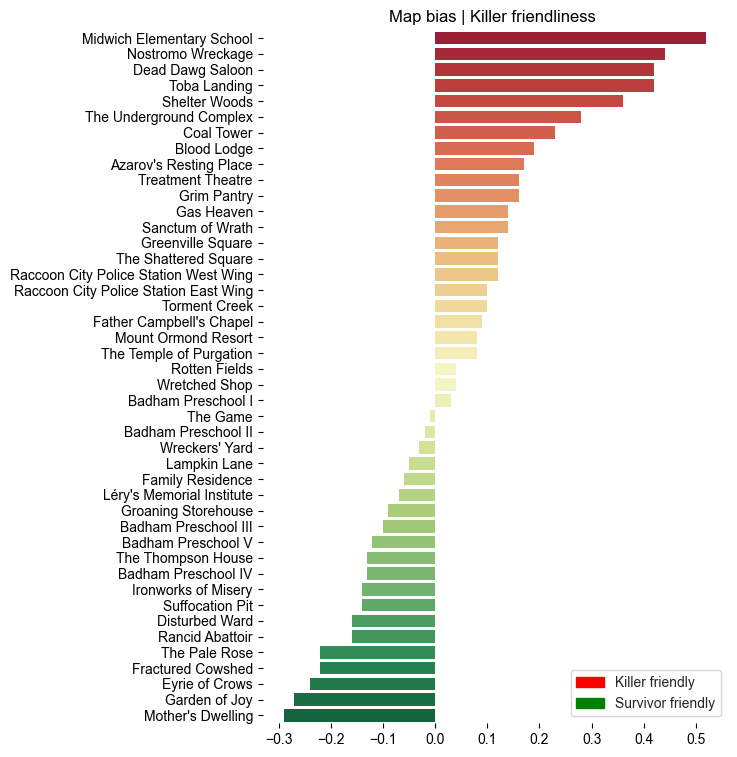

In [125]:
# MAP BIAS | KILLER FRIENDLINESS

# Create a figure
fig, ax = plt.subplots(figsize=(6, 9), facecolor='white')
ax.set_facecolor('white')

# Create bar plot
plot = sns.barplot(
    data=fact_maps.sort_values("average_score", ascending=False),
    y="map_name", x="average_score", palette="RdYlGn"
)

# Set the style
sns.set_style("whitegrid")
sns.set_style("white")

# Remove axis names
plot.set_xlabel('')
plot.set_ylabel('')

# Remove the spines
sns.despine(left=True, bottom=True)

# Remove gridlines
plot.grid(False)

# Adjust y-axis label & font size
plot.set_yticklabels(plot.get_yticklabels(), fontsize=10)

# Add title
plot.set_title('Map bias | Killer friendliness ', fontdict={'size':12})

# Add legend & style
red_patch = mpatches.Patch(color='red', label='Killer friendly')
green_patch = mpatches.Patch(color='green', label='Survivor friendly')
plt.legend(handles=[red_patch, green_patch], loc=4)

# Show chart
plt.show()


<h4> [Global] Map bias for each killer [Heatmap] </h4>

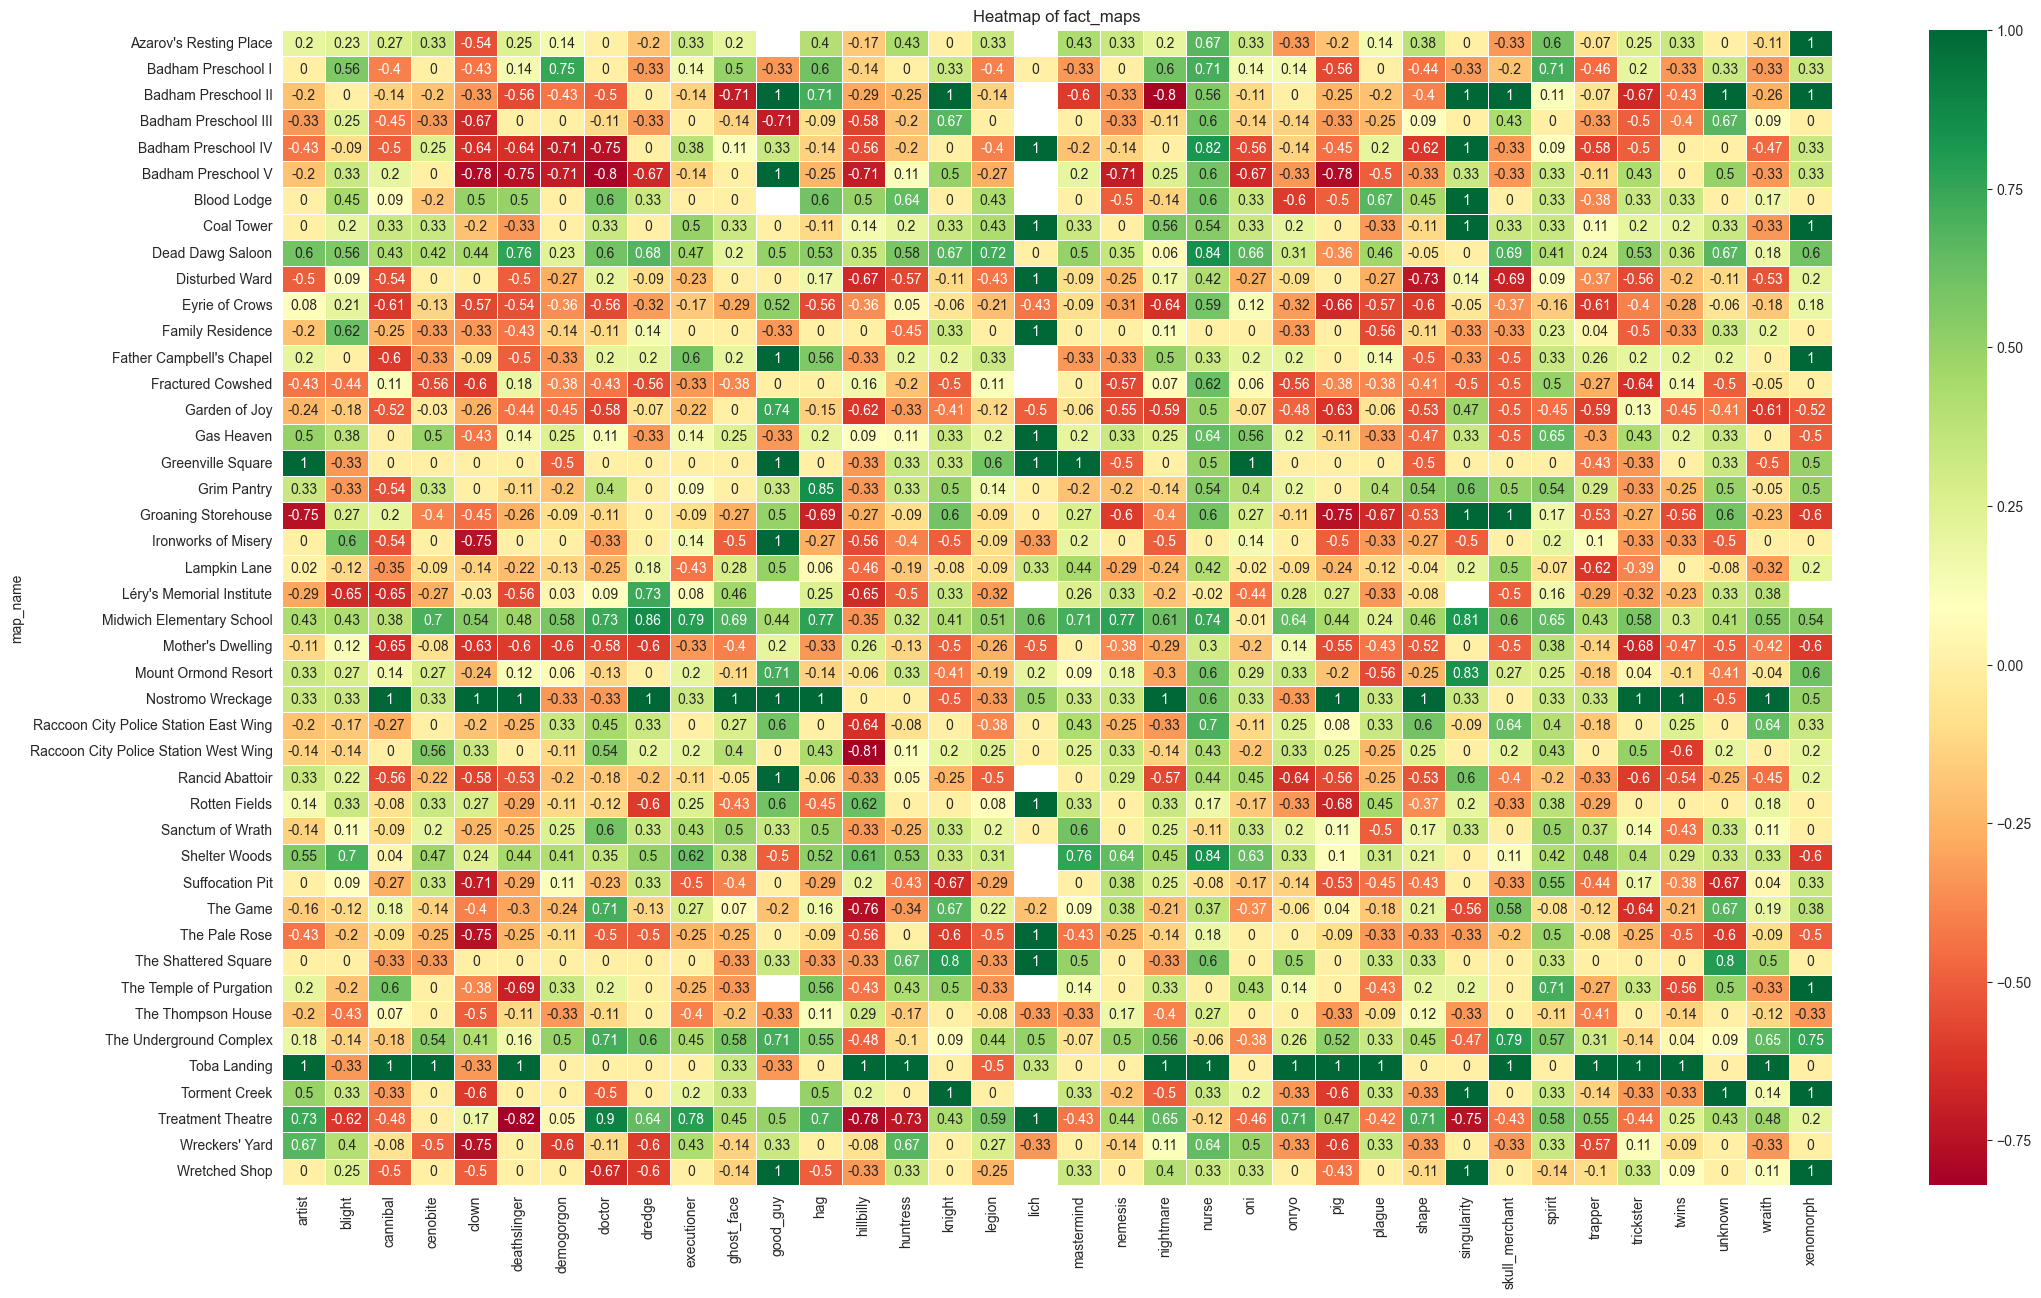

In [126]:
# MAPS vs. KILLER HEATMAP

# Slice data
heatmap_data = fact_maps.drop(columns=["last_updated","average_score","bias"])

# Create a heatmap
plt.figure(figsize=(25, 15))
sns.heatmap(heatmap_data.set_index(heatmap_data["map_name"]).drop(columns=["map_name"]), annot=True, cmap="RdYlGn", linewidths=.5)

# Add a title
plt.title('Heatmap of fact_maps')

# Show plot
plt.show()

<h4> [Global] Top maps: The blight </h4>

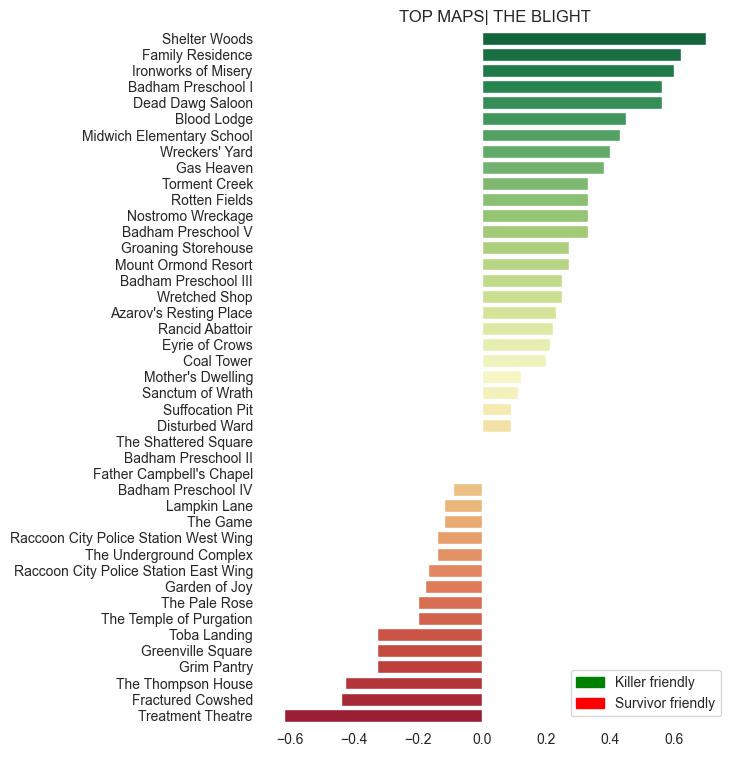

In [127]:
# TOP MAPS| THE BLIGHT

# Create a figure
fig, ax = plt.subplots(figsize=(6, 9), facecolor='white')
ax.set_facecolor('white')

# Create the bar plot
plot = sns.barplot(
    data=temp_blight_maps.sort_values("Gauge", ascending=False),
    y="Mapname", x="Gauge", palette="RdYlGn_r"
)

# Set the style
sns.set_style("whitegrid")
sns.set_style("white")

# Remove axis names and add a title
plot.set_xlabel('')
plot.set_ylabel('')
plot.set_title('TOP MAPS| THE BLIGHT', fontdict={'size':12})

# Remove the spines
sns.despine(left=True, bottom=True)

# Adjust y-axis label font size
plot.set_yticklabels(plot.get_yticklabels(), fontsize=10)

# Customize legend & set colour
## Green = killer friendly (as we have changed perspective from survivor to killer)
green_patch = mpatches.Patch(color='green', label='Killer friendly')
red_patch = mpatches.Patch(color='red', label='Survivor friendly')
plt.legend(handles=[green_patch, red_patch], loc=4)

# Show plot
plt.show()



<h3> FACT_MATCHES </h3>

<h5> [Global] Survival rate </h5>

In [128]:
# Calculate the total number of matches
## nunique as matches is duplicated once per player in a match (i.e. 5 times)
total_matches = fact_matches['match'].nunique()

# Calculate the total number of matches where killer_win is 1
## nunique as matches is duplicated once per player in a match (i.e. 5 times)
total_killer_wins = fact_matches[fact_matches['killer_win'] == 1]['match'].nunique()

# Calculate the total number of matches where draw is 1
## nunique as matches is duplicated once per player in a match (i.e. 5 times)
total_draws = fact_matches[fact_matches['draw'] == 1]['match'].nunique()

# Calculate the total number of matches where survivor_won is 1
## nunique as matches is duplicated once per player in a match (i.e. 5 times)
total_survivor_wins = fact_matches[fact_matches['survivor_won'] == 1]['match'].nunique()

# Calculate the percentage of matches the killer won
percentage_killer_wins = (total_killer_wins / total_matches) * 100

# Calculate the percentage of matches that ended in a draw
percentage_draws = (total_draws / total_matches) * 100

# Calculate the percentage of matches the survivor won
percentage_survivor_wins = (total_survivor_wins / total_matches) * 100

# Display data
print(f"The percentage of times the survivor won across all matches is: {percentage_survivor_wins:.1f}%")
print(f"The percentage of times the killer won across all matches is: {percentage_killer_wins:.1f}%")
print(f"The percentage of times there was a draw across all matches is: {percentage_draws:.1f}%")

The percentage of times the survivor won across all matches is: 47.4%
The percentage of times the killer won across all matches is: 38.8%
The percentage of times there was a draw across all matches is: 13.8%


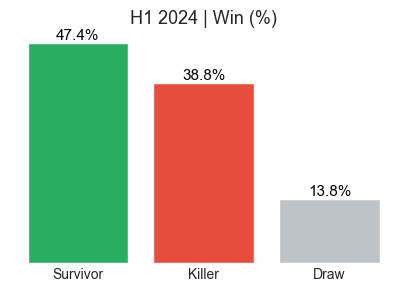

In [129]:
# FACT MATCHES SURVIVAL RATE 

# Set variables: select categories & take percentages from above ("[Global] survival rate")
categories = ['Survivor', 'Killer', 'Draw']
percentages = [percentage_survivor_wins, percentage_killer_wins, percentage_draws]

# Define colors
# Dark green, pastel red, neutral grey
colors = ['#27AE60', '#E74C3C', '#BDC3C7']  

# Set white background
plt.style.use('seaborn-white')

# Plotting the bar plot
plt.figure(figsize=(5, 3))
bars = plt.bar(categories, percentages, color=colors)

# Adding title & adjusting font size
plt.title('H1 2024 | Win (%)', fontsize=13)

# Removing y-axis labels
plt.yticks([])

# Adding value labels
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.1f}%', 
             ha='center', va='bottom', fontsize=11, color='black')

# Remove the border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Remove gridlines
plt.grid(False)

# Show the graph
plt.show()


<h4> [Global] Win rate </h4>

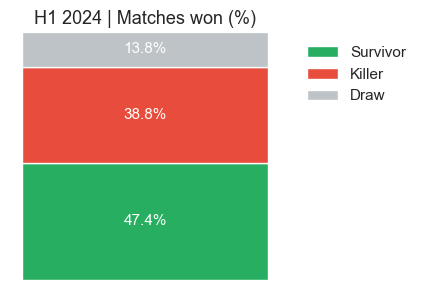

In [130]:
# H1 2024 | Matches won (%)

# Set variables: select categories & take percentages from above ("[Global] survival rate")
## Taken from above. 
## Could have left out, as they are defined above, but I wanted it to be able to run if ran out of pipeline order
categories = ['Survivor', 'Killer', 'Draw']
percentages = [percentage_survivor_wins, percentage_killer_wins, percentage_draws]

# Normalize percentages
total_percentage = sum(percentages)
normalized_percentages = [percentage / total_percentage * 100 for percentage in percentages]

# Define colors
## Dark green, pastel red, neutral grey
colors = ['#27AE60', '#E74C3C', '#BDC3C7']  

# Create a figure
plt.figure(figsize=(3, 3)) 

# Variable to keep track of the bottom of the bars
bottom = 0  

# Loop over the perecentages and categories & add them to the chart
for category, percentage, color in zip(categories, normalized_percentages, colors):
    plt.bar(0, percentage, bottom=bottom, label=category, color=color, width=0.3, align='center')
    plt.text(0, bottom + percentage / 2, f'{percentage:.1f}%', ha='center', va='center', color='white', fontsize=11)
    bottom += percentage  # Update the bottom to stack the next bar on top

# Add title & make look nice
plt.title('H1 2024 | Matches won (%)', fontsize=13)
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100
plt.grid(False)  # Turn off gridlines
plt.tight_layout()

# Remove borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Set background colour
plt.gca().set_facecolor('white') 

# Adding legend outside the plot area
plt.legend(loc='upper left', fontsize=11, bbox_to_anchor=(1.05, 1))

# Display graph
plt.show()


<h4> [Monthly] Win rate </h4>

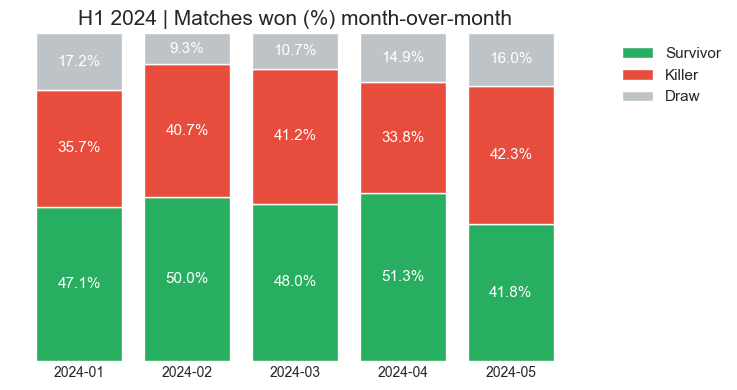

In [131]:
# H1 2024 | Matches won (%) MoM

# Extract the month from the date
fact_matches['month'] = fact_matches['date'].dt.to_period('M')

# Aggregate data by month
monthly_data = fact_matches.groupby('month').agg(
    total_matches=('match', 'nunique')
).reset_index()

# Calculate the unique match counts across our 3 conditions (killer wins, draws and survivor wins)
## match.unique() as each match appears 5 times (once per player in a match)
monthly_data['total_killer_wins'] = fact_matches[fact_matches['killer_win'] == 1].groupby('month')['match'].nunique().reindex(monthly_data['month']).fillna(0).values
monthly_data['total_draws'] = fact_matches[fact_matches['draw'] == 1].groupby('month')['match'].nunique().reindex(monthly_data['month']).fillna(0).values
monthly_data['total_survivor_wins'] = fact_matches[fact_matches['survivor_won'] == 1].groupby('month')['match'].nunique().reindex(monthly_data['month']).fillna(0).values

# Calculate percentages for each month
monthly_data['percentage_killer_wins'] = (monthly_data['total_killer_wins'] / monthly_data['total_matches']) * 100
monthly_data['percentage_draws'] = (monthly_data['total_draws'] / monthly_data['total_matches']) * 100
monthly_data['percentage_survivor_wins'] = (monthly_data['total_survivor_wins'] / monthly_data['total_matches']) * 100

# Set variables
categories = ['Survivor', 'Killer', 'Draw']
colors = ['#27AE60', '#E74C3C', '#BDC3C7']  # Dark green, pastel red, neutral grey

# Create a figure
plt.figure(figsize=(6, 4))

# Create a bottom array to hold the bottom positions of the bars
bottom = [0] * len(monthly_data)

# Plot each category
for category, color in zip(categories, colors):
    if category == 'Survivor':
        percentages = monthly_data['percentage_survivor_wins']
    elif category == 'Killer':
        percentages = monthly_data['percentage_killer_wins']
    else:
        percentages = monthly_data['percentage_draws']
    
    plt.bar(monthly_data['month'].astype(str), percentages, bottom=bottom, label=category, color=color)
    
    # Add value labels to each segment
    for i, (month, percentage) in enumerate(zip(monthly_data['month'].astype(str), percentages)):
        plt.text(i, bottom[i] + percentage / 2, f'{percentage:.1f}%', ha='center', va='center', color='white', fontsize=11)
    
    # Update the bottom values for the next category
    bottom = [i + j for i, j in zip(bottom, percentages)]

# Add labels, title, and legend
plt.title('H1 2024 | Matches won (%) month-over-month', fontsize=15)
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=12)
plt.yticks([])
plt.ylim(0, 100) 
plt.grid(False)
plt.tight_layout()

# Remove borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Set background color to white
plt.gca().set_facecolor('white')  

# Adding legend outside the plot area
plt.legend(loc='upper left', fontsize=11, bbox_to_anchor=(1.05, 1))

# Show graph
plt.show()


<h4> [Global] Map bias fact_matches </h4>

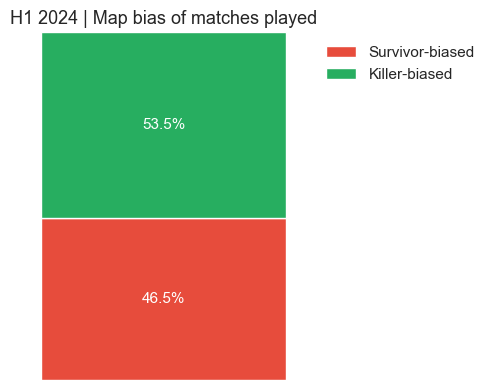

In [132]:
# H1 2024 | Map bias of played matches
## 60% of maps were weighted in killer's favour
## despite this, killers only got ~40% kill rate (2/4 kills on average per map)

# Perform the left join
merged_df = fact_matches.merge(dim_maps, left_on='map', right_on='map_name', how='left')

# Group by 'map' to get unique matches count
unique_matches = merged_df.groupby('map')['match'].nunique().reset_index()
unique_matches.columns = ['map', 'nunique_matches']

# Group by 'map' and calculate average score and bias
avg_values = merged_df.groupby('map').agg(
    avg_score=('average_score', 'mean'),
    avg_bias=('bias', 'mean')
).reset_index()

# Merge the unique matches with the average values
result_df = pd.merge(unique_matches, avg_values, on='map')

# Count occurrences of each unique avg_bias value
bias_counts = result_df['avg_bias'].value_counts().reset_index()
bias_counts.columns = ['avg_bias', 'count']

# Normalize the counts to sum up to 100%
total_count = bias_counts['count'].sum()
bias_counts['normalized_count'] = (bias_counts['count'] / total_count * 100).round(1)

# Sort by avg_bias to maintain consistent order
bias_counts = bias_counts.sort_values(by='avg_bias')

# Define labels
bias_labels = {
    -1: 'Survivor-biased',
    0: 'Neutral',
    1: 'Killer-biased'
}

# Map avg_bias values to labels
bias_counts['label'] = bias_counts['avg_bias'].map(bias_labels)

# Define colors with a horror theme
colors = ['#27AE60', '#E74C3C', '#BDC3C7']  # Dark green, neutral grey, pastel red

# Plotting the normalized stacked bar chart vertically
plt.figure(figsize=(3, 4))  # Adjust the figure size to make it thinner

bottom = 0  # Variable to keep track of the bottom of the bars

for i, row in bias_counts.iterrows():
    plt.bar(0, row['normalized_count'], bottom=bottom, label=row['label'], color=colors[i])
    plt.text(0, bottom + row['normalized_count'] / 2, f'{row["normalized_count"]:.1f}%', ha='center', va='center', color='white', fontsize=11)
    bottom += row['normalized_count']  # Update the bottom to stack the next bar on top

# Title and other adjustments
plt.title('H1 2024 | Map bias of matches played', fontsize=13)
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100
plt.grid(False)  # Turn off gridlines
plt.tight_layout()

# Remove all spines (borders)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.gca().set_facecolor('white')  # Set background color to white

# Adding legend outside the plot area
plt.legend(loc='upper left', fontsize=11, bbox_to_anchor=(1.05, 1))

plt.show()

<h4> [Global] Kill rate </h4>

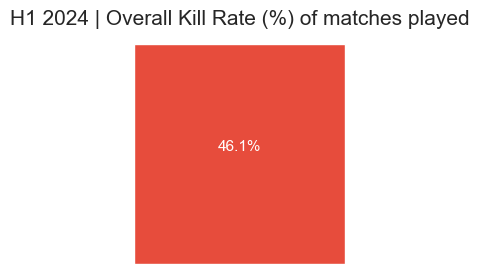

In [133]:
# H1 2024 | Overall Kill rate of matches played (as calculated by the developers)

'''
Kill rate calculation.

Taken from the game developers:
https://forums.bhvr.com/dead-by-daylight/kb/articles/433-developer-update-stats. 

    > The numbers below are the percentage of all Survivors who are killed when facing that Killer. 
    > For example, a 50% kill rate would mean they kill two Survivors per match on average. 
    > We try to keep Killers near a 60% kill rate on average to keep matches relatively 
    > even and support the horror theme of the game, where the Killer is a 
    > force to be reckoned with and the survival is not guaranteed.
    
'''

# Slice dataset to only include survivors
survivors = fact_matches[fact_matches['is_survivor'] == 1]

# Calculate the total number of survivors and those killed during a match
total_survivors = survivors.shape[0]
total_killed = survivors['died'].sum()

# Calculate the overall kill rate percentage
overall_kill_rate = (total_killed / total_survivors) * 100

# Variables for chart
categories = ['Overall Kill Rate']
percentages = [overall_kill_rate]

# Set red colour
colors = ['#E74C3C']

# Set white background
plt.style.use('seaborn-white')

# Plotting a bar plot
plt.figure(figsize=(3, 3))
bars = plt.bar(categories, percentages, color=colors)

# Adding title & adjusting font size
plt.title('H1 2024 | Overall Kill Rate (%) of matches played', fontsize=15)

# Removing y-axis labels
plt.yticks([])
plt.xticks([])

# Adding value labels
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height()/2, f'{percentage:.1f}%', 
             ha='center', va='bottom', fontsize=11, color='white')

# Remove chart border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Remove gridlines
plt.grid(False)

# Display the plot
plt.show()


<h4> [Monthly] Kill rate </h4>

  year_month  total_survivors  total_killed  kill_rate
0    2024-01              628           286      45.54
1    2024-02              560           254      45.36
2    2024-03              708           334      47.18
3    2024-04              780           336      43.08
4    2024-05              852           415      48.71


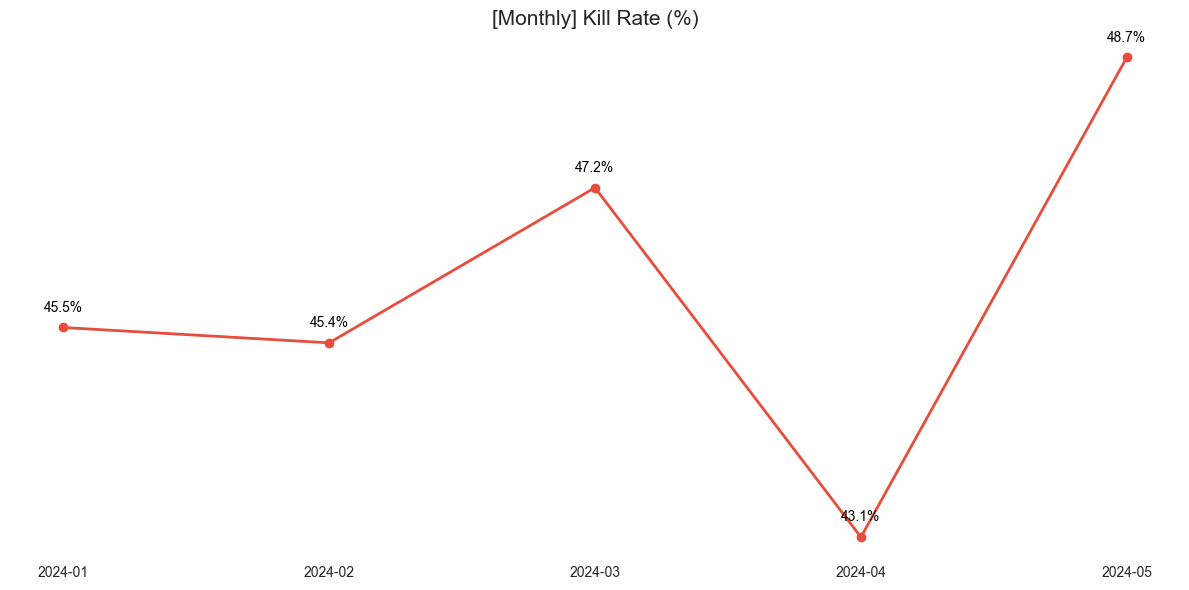

In [134]:
'''
Kill rate calculation.

Taken from the game developers:
https://forums.bhvr.com/dead-by-daylight/kb/articles/433-developer-update-stats. 

    > The numbers below are the percentage of all Survivors who are killed when facing that Killer. 
    > For example, a 50% kill rate would mean they kill two Survivors per match on average. 
    > We try to keep Killers near a 60% kill rate on average to keep matches relatively 
    > even and support the horror theme of the game, where the Killer is a 
    > force to be reckoned with and the survival is not guaranteed.
    
'''

# PREP DATA TO PLOT 
# Slice dataset to only include survivors
survivors = fact_matches[fact_matches['is_survivor'] == 1].copy()

# Extract year and month from the date column
survivors.loc[:, 'year_month'] = survivors['date'].dt.to_period('M')

# Calculate monthly totals
monthly_totals = survivors.groupby('year_month').agg(
    total_survivors=('died', 'size'),
    total_killed=('died', 'sum')
).reset_index()

# Calculate the kill rate percentage for each month
monthly_totals['kill_rate'] = round(((monthly_totals['total_killed'] / monthly_totals['total_survivors']) * 100),2)

# Display the monthly kill rates
print(monthly_totals)

# PLOT DATA
# Variable prep
months = monthly_totals['year_month'].astype(str)  # Convert Period to string for plotting. Was throwing error when not.
percentages = monthly_totals['kill_rate']

# Set white background
plt.style.use('seaborn-v0_8-white')

# Plotting the line plot
plt.figure(figsize=(12, 6))
plt.plot(months, percentages, marker='o', color='#E74C3C', linestyle='-', linewidth=2)

# Adding title & adjusting font size
plt.title('[Monthly] Kill Rate (%)', fontsize=15)

# Adding labels
plt.xlabel('', fontsize=12)
plt.yticks([])

# Adding value labels
for i, (month, percentage) in enumerate(zip(months, percentages)):
    plt.text(i, percentage+0.15, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=10, color='black')

# Remove gridlines
plt.grid(False)

# Remove border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Display the plot
plt.tight_layout()
plt.show()


  year_month  total_survivors  total_killed  kill_rate
0    2024-01              154            81      52.60
1    2024-02              131            68      51.91
2    2024-03              162            89      54.94
3    2024-04              182           102      56.04
4    2024-05              202           109      53.96


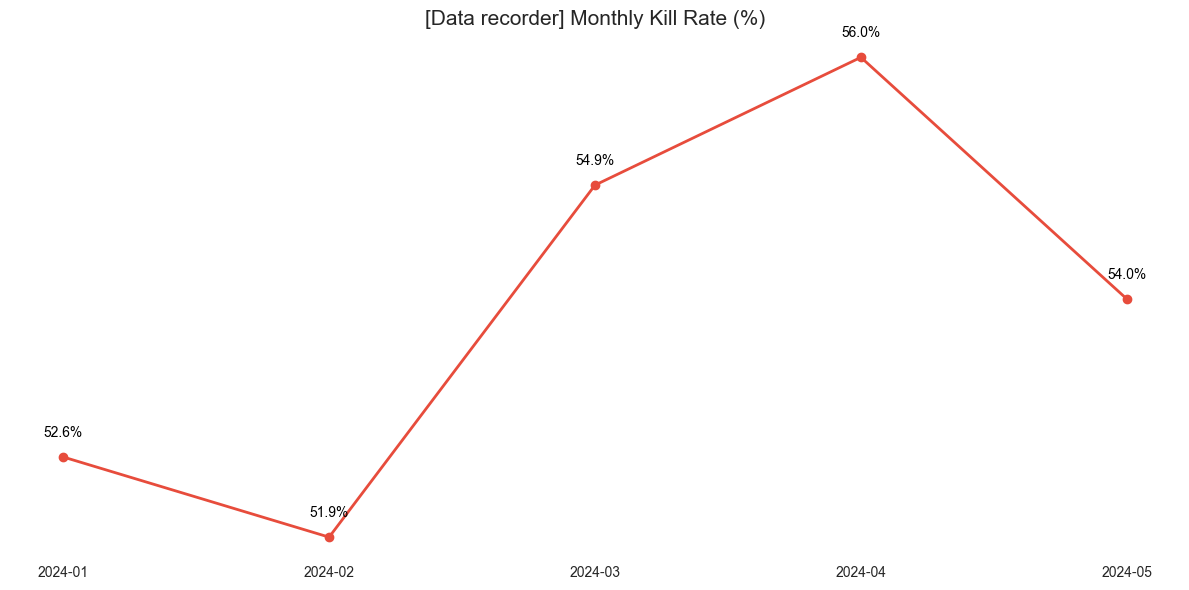

In [135]:
# Monthly kill rates for the person recording 
## 50% = they died in 50% of their matches

'''
Kill rate calculation.

Taken from the game developers:
https://forums.bhvr.com/dead-by-daylight/kb/articles/433-developer-update-stats. 

    > The numbers below are the percentage of all Survivors who are killed when facing that Killer. 
    > For example, a 50% kill rate would mean they kill two Survivors per match on average. 
    > We try to keep Killers near a 60% kill rate on average to keep matches relatively 
    > even and support the horror theme of the game, where the Killer is a 
    > force to be reckoned with and the survival is not guaranteed.
    
Data recorder:
- There was always one person in each match who was recoding the match.
- In order to assess their level vs random peoples' level, I wanted to check each separately.
- That is: is the person recoding bringing the average up or down?
    
'''

# DATA PREPARATION
# Filter the dataset to only include survivors where is_data_recorder == 1
survivors = fact_matches[(fact_matches['is_survivor'] == 1) & (fact_matches['is_data_recorder'] == 1)].copy()

# Extract year and month from the date column
survivors['year_month'] = survivors['date'].dt.to_period('M')

# Calculate monthly totals
monthly_totals = survivors.groupby('year_month').agg(
    total_survivors=('died', 'size'),
    total_killed=('died', 'sum')
).reset_index()

# Calculate the kill rate percentage for each month
monthly_totals['kill_rate'] = round(((monthly_totals['total_killed'] / monthly_totals['total_survivors']) * 100), 2)

# Display the monthly kill rates
print(monthly_totals)

# PLOTTING
# Variables
months = monthly_totals['year_month'].astype(str)  # Convert Period to string for plotting
percentages = monthly_totals['kill_rate']

# White background
plt.style.use('seaborn-v0_8-white')

# Plotting the line plot
plt.figure(figsize=(12, 6))
plt.plot(months, percentages, marker='o', color='#E74C3C', linestyle='-', linewidth=2)

# Adding title and adjusting font size
plt.title('[Data recorder] Monthly Kill Rate (%)', fontsize=15)

# Adding labels
plt.xlabel('', fontsize=12)
plt.yticks([])

# Adding value labels
for i, (month, percentage) in enumerate(zip(months, percentages)):
    plt.text(i, percentage + 0.15, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=10, color='black')

# Remove the border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Remove gridlines
plt.grid(False)

# Display the plot
plt.tight_layout()
plt.show()


  year_month  total_survivors  total_killed  kill_rate
0    2024-01              474           205      43.25
1    2024-02              429           186      43.36
2    2024-03              546           245      44.87
3    2024-04              598           234      39.13
4    2024-05              650           306      47.08


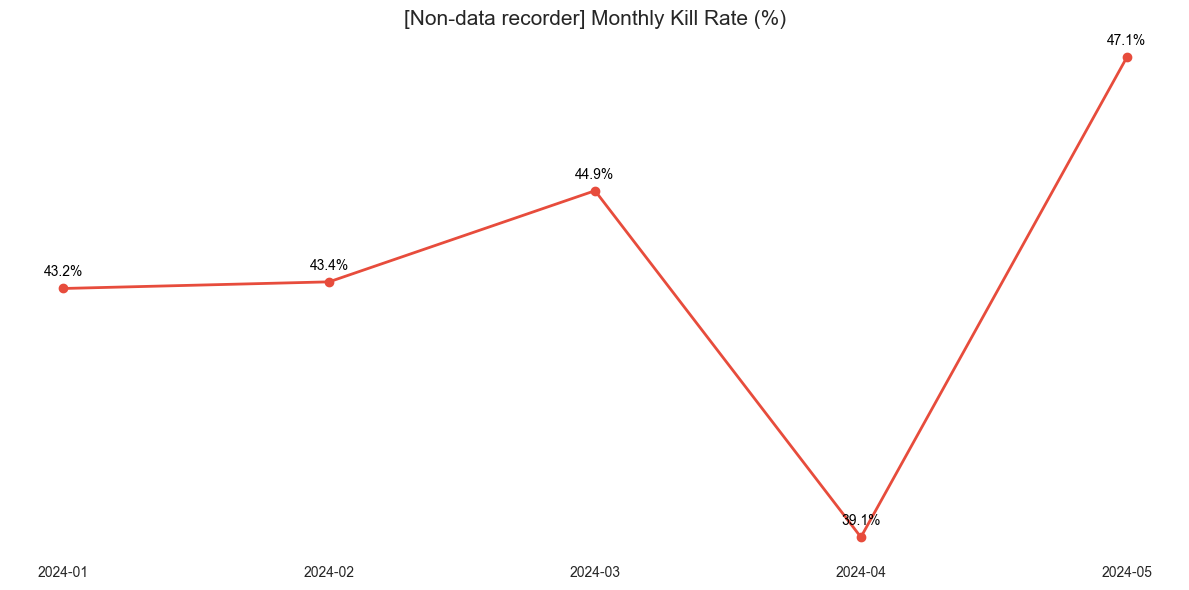

In [136]:
# Non-data recorder monthly kill rate
## 50% = they died in 50% of their matches

'''
Kill rate calculation.

Taken from the game developers:
https://forums.bhvr.com/dead-by-daylight/kb/articles/433-developer-update-stats. 

    > The numbers below are the percentage of all Survivors who are killed when facing that Killer. 
    > For example, a 50% kill rate would mean they kill two Survivors per match on average. 
    > We try to keep Killers near a 60% kill rate on average to keep matches relatively 
    > even and support the horror theme of the game, where the Killer is a 
    > force to be reckoned with and the survival is not guaranteed.
    
Data recorder:
- There was always one person in each match who was recoding the match.
- In order to assess their level vs random peoples' level, I wanted to check each separately.
- That is: are the people recoding bringing the average up or down?
    
'''

# DATA PREPARATION
# Filter the dataset to only include survivors where is_data_recorder == 0
survivors = fact_matches[(fact_matches['is_survivor'] == 1) & (fact_matches['is_data_recorder'] == 0)].copy()

# Extract year and month from the date column
## Defined above, but leaving in, incase I ever want to run the pipeline out of order.
survivors['year_month'] = survivors['date'].dt.to_period('M')

# Calculate monthly totals
monthly_totals = survivors.groupby('year_month').agg(
    total_survivors=('died', 'size'),
    total_killed=('died', 'sum')
).reset_index()

# Calculate the kill rate percentage for each month
monthly_totals['kill_rate'] = round(((monthly_totals['total_killed'] / monthly_totals['total_survivors']) * 100), 2)

# Display the monthly kill rates
print(monthly_totals)

# PLOTTING THE DATA
# Variables
months = monthly_totals['year_month'].astype(str)  # Convert Period to string for plotting. Was throwing error when not converted.
percentages = monthly_totals['kill_rate']

# Set white background
plt.style.use('seaborn-v0_8-white')

# Plotting the line plot
plt.figure(figsize=(12, 6))
plt.plot(months, percentages, marker='o', color='#E74C3C', linestyle='-', linewidth=2)

# Adding title & adjusting font size
plt.title('[Non-data recorder] Monthly Kill Rate (%)', fontsize=15)

# Adding labels
plt.xlabel('', fontsize=12)
plt.yticks([])

# Adding value labels
for i, (month, percentage) in enumerate(zip(months, percentages)):
    plt.text(i, percentage + 0.15, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=10, color='black')
    
# Remove the border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Remove gridlines
plt.grid(False)

# Display the plot
plt.tight_layout()
plt.show()


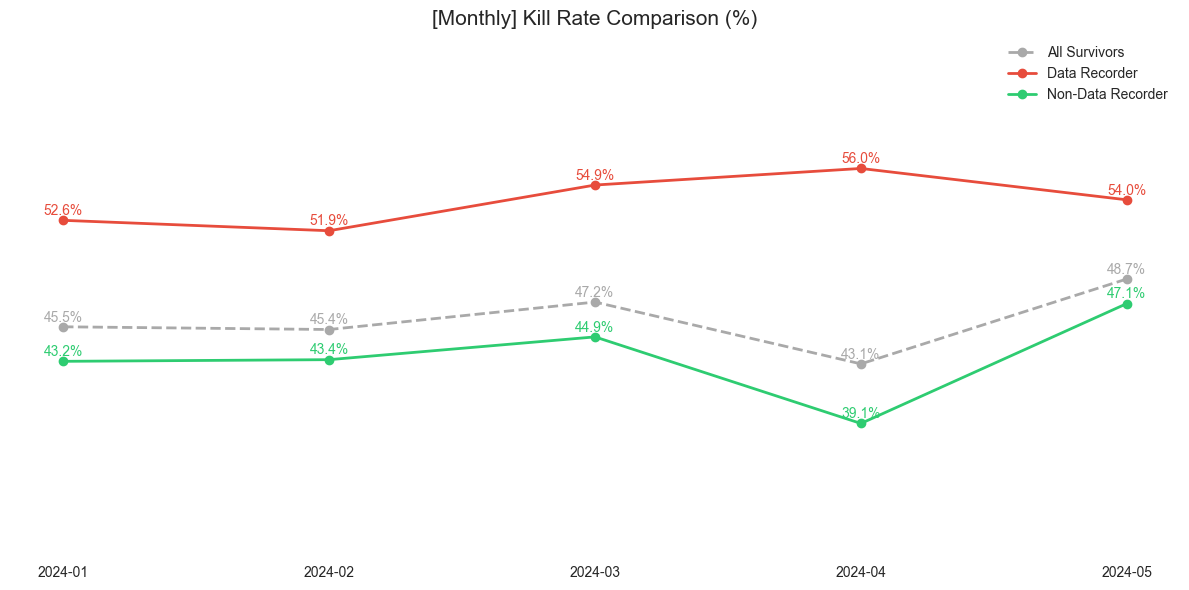

In [137]:
# Combined plot (kill rate across all three groups)
## 50% = they died in 50% of their matches

'''
Kill rate calculation.

Taken from the game developers:
https://forums.bhvr.com/dead-by-daylight/kb/articles/433-developer-update-stats. 

    > The numbers below are the percentage of all Survivors who are killed when facing that Killer. 
    > For example, a 50% kill rate would mean they kill two Survivors per match on average. 
    > We try to keep Killers near a 60% kill rate on average to keep matches relatively 
    > even and support the horror theme of the game, where the Killer is a 
    > force to be reckoned with and the survival is not guaranteed.
    
Data recorder:
- There was always one person in each match who was recoding the match.
- In order to assess their level vs random peoples' level, I wanted to check each separately.
- That is: are the people recoding bringing the average up or down?
    
'''

# Create plot
plt.figure(figsize=(12, 6))

# Plot for all survivors / average across all categories (dashed black line)
# Filtered to only include survivors (is_survivor==1)
survivors_all = fact_matches[fact_matches['is_survivor'] == 1].copy()
survivors_all['year_month'] = survivors_all['date'].dt.to_period('M')
monthly_totals_all = survivors_all.groupby('year_month').agg(
    total_survivors=('died', 'size'),
    total_killed=('died', 'sum')
).reset_index()
monthly_totals_all['kill_rate'] = round(((monthly_totals_all['total_killed'] / monthly_totals_all['total_survivors']) * 100), 2)
months_all = monthly_totals_all['year_month'].astype(str)
percentages_all = monthly_totals_all['kill_rate']
plt.plot(months_all, percentages_all, marker='o', color='darkgrey', linestyle='--', linewidth=2, label='All Survivors')

# Plot for data recorder (solid red line)
# Filtered to only include survivors where is_data_recorder == 1
survivors_recorder = fact_matches[(fact_matches['is_survivor'] == 1) & (fact_matches['is_data_recorder'] == 1)].copy()
survivors_recorder['year_month'] = survivors_recorder['date'].dt.to_period('M')
monthly_totals_recorder = survivors_recorder.groupby('year_month').agg(
    total_survivors=('died', 'size'),
    total_killed=('died', 'sum')
).reset_index()
monthly_totals_recorder['kill_rate'] = round(((monthly_totals_recorder['total_killed'] / monthly_totals_recorder['total_survivors']) * 100), 2)
months_recorder = monthly_totals_recorder['year_month'].astype(str)
percentages_recorder = monthly_totals_recorder['kill_rate']
plt.plot(months_recorder, percentages_recorder, marker='o', color='#E74C3C', linestyle='-', linewidth=2, label='Data Recorder')

# Plot for non-data recorder (solid green line)
# Filtered to only include survivors where is_data_recorder == 0
survivors_non_recorder = fact_matches[(fact_matches['is_survivor'] == 1) & (fact_matches['is_data_recorder'] == 0)].copy()
survivors_non_recorder['year_month'] = survivors_non_recorder['date'].dt.to_period('M')
monthly_totals_non_recorder = survivors_non_recorder.groupby('year_month').agg(
    total_survivors=('died', 'size'),
    total_killed=('died', 'sum')
).reset_index()
monthly_totals_non_recorder['kill_rate'] = round(((monthly_totals_non_recorder['total_killed'] / monthly_totals_non_recorder['total_survivors']) * 100), 2)
months_non_recorder = monthly_totals_non_recorder['year_month'].astype(str)
percentages_non_recorder = monthly_totals_non_recorder['kill_rate']
plt.plot(months_non_recorder, percentages_non_recorder, marker='o', color='#2ECC71', linestyle='-', linewidth=2, label='Non-Data Recorder')

# Add title & labels
plt.title('[Monthly] Kill Rate Comparison (%)', fontsize=15)
plt.yticks([30, 65], ['', ''])

# Add legend
plt.legend()

# Add value labels
for i, (month, percentage) in enumerate(zip(months_all, percentages_all)):
    plt.text(i, percentage + 0.15, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=10, color='darkgrey')
for i, (month, percentage) in enumerate(zip(months_recorder, percentages_recorder)):
    plt.text(i, percentage + 0.15, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=10, color='#E74C3C')
for i, (month, percentage) in enumerate(zip(months_non_recorder, percentages_non_recorder)):
    plt.text(i, percentage + 0.15, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=10, color='#2ECC71')

# Remove the border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Remove gridlines
plt.grid(False)

# Display the plot
plt.tight_layout()
plt.show()


<h4> [Global] Average kill rate </h4>

In [138]:
# Compute the total kill rate for all survivors
survivors_all = fact_matches[fact_matches['is_survivor'] == 1].copy()
total_survivors_all = survivors_all['died'].size
total_killed_all = survivors_all['died'].sum()
average_kill_rate_all = (total_killed_all / total_survivors_all) * 100

#Compute the total kill rate for data recorders
survivors_recorder = fact_matches[(fact_matches['is_survivor'] == 1) & (fact_matches['is_data_recorder'] == 1)].copy()
total_survivors_recorder = survivors_recorder['died'].size
total_killed_recorder = survivors_recorder['died'].sum()
average_kill_rate_recorder = (total_killed_recorder / total_survivors_recorder) * 100

#Compute the total kill rate for non-data recorders
survivors_non_recorder = fact_matches[(fact_matches['is_survivor'] == 1) & (fact_matches['is_data_recorder'] == 0)].copy()
total_survivors_non_recorder = survivors_non_recorder['died'].size
total_killed_non_recorder = survivors_non_recorder['died'].sum()
average_kill_rate_non_recorder = (total_killed_non_recorder / total_survivors_non_recorder) * 100

# Step 4: Print the results
print(f'The average kill rate for all survivors is {average_kill_rate_all:.2f}%')
print(f'The average kill rate for data recorders is {average_kill_rate_recorder:.2f}%')
print(f'The average kill rate for non-data recorders is {average_kill_rate_non_recorder:.2f}%')


The average kill rate for all survivors is 46.06%
The average kill rate for data recorders is 54.03%
The average kill rate for non-data recorders is 43.60%


<h4> [Global] Player behaviour </h4>

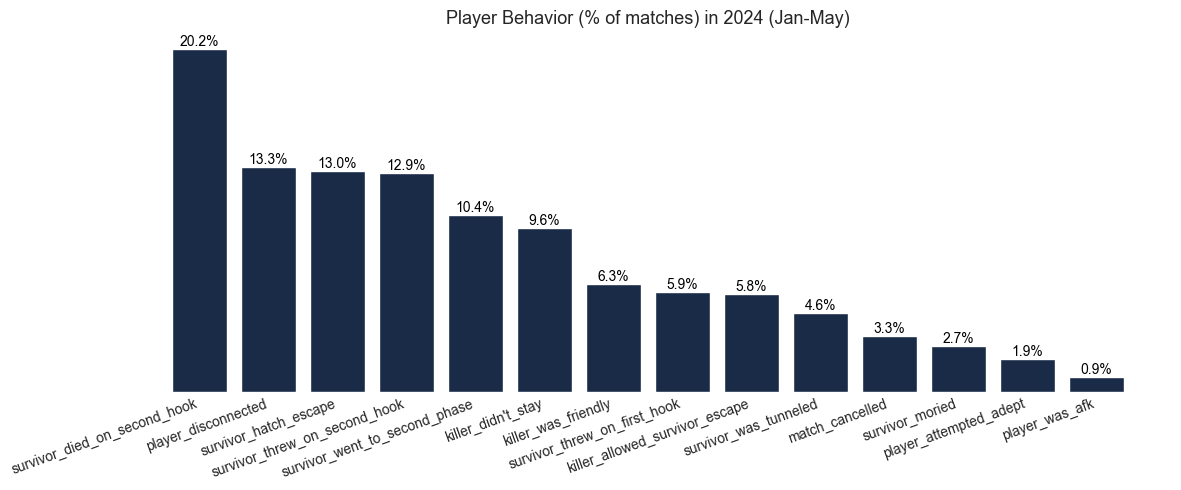

In [139]:
# All player behaviour 

# Create list of events to analyze
events = [
    'survivor_went_to_second_phase',
    'killer_allowed_survivor_escape',
    'player_attempted_adept',
    'killer_didn\'t_stay',
    'survivor_died_on_second_hook',
    'survivor_was_tunneled',
    'player_disconnected',
    'survivor_hatch_escape',
    'survivor_moried',
    'survivor_threw_on_first_hook',
    'survivor_threw_on_second_hook',
    'killer_was_friendly',
    'match_cancelled',
    'player_was_afk'
]

# Calculate the percentage for each event
## using fact_matches["match"].nunique() as match number is repeated 5 times per game (1 per player). 
percentages = {event: (fact_matches[event].sum() / fact_matches["match"].nunique()) * 100 for event in events}

# Convert to a df for easier plotting
percentages_df = pd.DataFrame(list(percentages.items()), columns=['Event', 'Percentage'])

# Sort the df by % in descending order
percentages_df = percentages_df.sort_values(by='Percentage', ascending=False)

# Set white background
plt.style.use('seaborn-white')

# Create plot
plt.figure(figsize=(12, 5))
bars = plt.bar(percentages_df['Event'], percentages_df['Percentage'], color='#1a2b48')

# Add title
plt.title('Player Behavior (% of matches) in 2024 (Jan-May)', fontsize=13)

# Rotate the x-axis labels slightly for readability
plt.xticks(rotation=20, ha='right')

# Remove the y-axis labels
plt.yticks([])

# Add value labels
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{round(bar.get_height(), 1)}%', 
             ha='center', va='bottom', fontsize=10, color='black')

# Remove the border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Display the plot
plt.show();

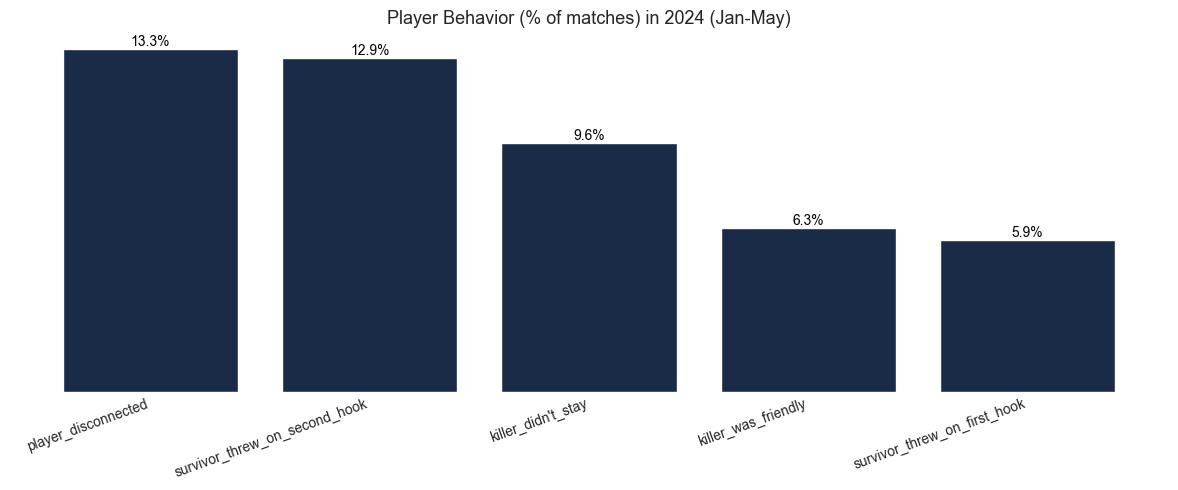

In [140]:
# Player behaviour: top 5

# List of events to include in the plot
events_to_include = [
    "player_disconnected",
    "survivor_threw_on_second_hook",
    "killer_didn't_stay",
    "killer_was_friendly",
    "survivor_threw_on_first_hook"
]

# Create df for ease of plotting
## percentages_df created above [Global] Player behaviour
filtered_df = percentages_df[percentages_df['Event'].isin(events_to_include)]

# Creating the plot
plt.figure(figsize=(12, 5))
bars = plt.bar(filtered_df['Event'], filtered_df['Percentage'], color='#1a2b48')

# Add title
plt.title('Player Behavior (% of matches) in 2024 (Jan-May)', fontsize=13)

# Rotate the x-axis labels for readability
plt.xticks(rotation=20, ha='right')

# Remove the y-axis labels
plt.yticks([])

# Add value labels
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{round(bar.get_height(), 1)}%', 
             ha='center', va='bottom', fontsize=10, color='black')

# Remove the border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Set white background
plt.style.use('seaborn-white')

# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Display the plot
plt.show();

<h4> [Global] Positive/Negative/Neural events </h4>

In [141]:
# Category of behaviours witnessed in fact_matches dataset
## positive/negative/neutral

# Define the lists of events for each category
## Done by manual assessment 
neutral_events = [
    "survivor_died_on_second_hook",
    "player_was_afk",
    "player_attempted_adept",
    "survivor_moried",
    "survivor_went_to_second_phase",
    "survivor_hatch_escape"
]

negative_events = [
    "player_disconnected",
    "survivor_threw_on_second_hook",
    "killer_didn't_stay",
    "survivor_threw_on_first_hook",
    "survivor_was_tunneled",
    "match_cancelled"
]

positive_events = [
    "killer_was_friendly",
    "killer_allowed_survivor_escape"
]

# Create df for ease of plotting
## percentages_df created above for [Global] Player behaviour
neutral_df = percentages_df[percentages_df['Event'].isin(neutral_events)]
negative_df = percentages_df[percentages_df['Event'].isin(negative_events)]
positive_df = percentages_df[percentages_df['Event'].isin(positive_events)]

# Total count of events
total_events = len(percentages_df)

# Count of events for each category
neutral_count = len(neutral_df)
negative_count = len(negative_df)
positive_count = len(positive_df)

# Percentages
neutral_percentage = (neutral_count / total_events) * 100
negative_percentage = (negative_count / total_events) * 100
positive_percentage = (positive_count / total_events) * 100

# Print results
print(f"Percentage of neutral events: {neutral_percentage:.2f}%")
print(f"Percentage of negative events: {negative_percentage:.2f}%")
print(f"Percentage of positive events: {positive_percentage:.2f}%")



Percentage of neutral events: 42.86%
Percentage of negative events: 42.86%
Percentage of positive events: 14.29%


<h4> [Global] Killer behaviour heatmap </h4>

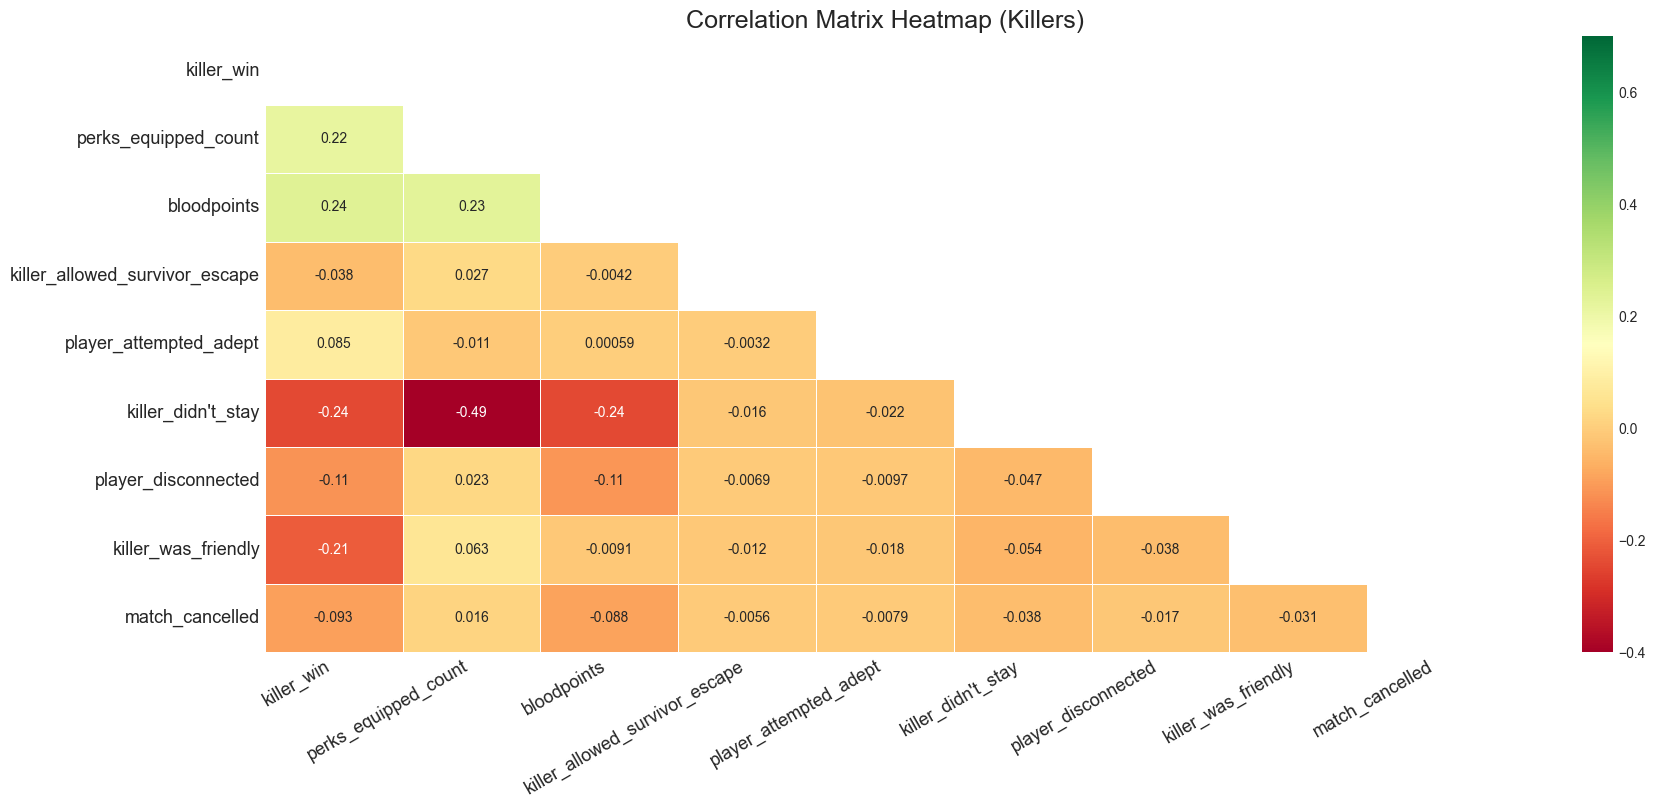

In [142]:
# FACT MATCHES CORRELATION MAP (killers)

# Create the correlation matrix
corr_matrix_killers = fact_matches[fact_matches["is_survivor"] == 0][[
    "killer_win", "perks_equipped_count", "bloodpoints", 
    "killer_allowed_survivor_escape", "player_attempted_adept", "killer_didn't_stay", 
    "player_disconnected", 
    "killer_was_friendly", "match_cancelled"
]].corr()

# Generate a mask to hide upper triangle (for readability)
mask = np.triu(np.ones_like(corr_matrix_killers, dtype=bool))

# Set white style
sns.set_style("white")

# Plotting the heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix_killers, mask=mask, annot=True, cmap="RdYlGn", linewidths=.5, vmin=-0.4, vmax=0.7)

# Set title
plt.title('Correlation Matrix Heatmap (Killers)', fontsize=18)

# Set the font size of the y-axis labels
plt.yticks(ha="right",fontsize=13)
plt.xticks(rotation=30, ha='right', fontsize=13)

# Display
plt.show()


<h4> [Global] Survivor behaviour heatmap </h4>

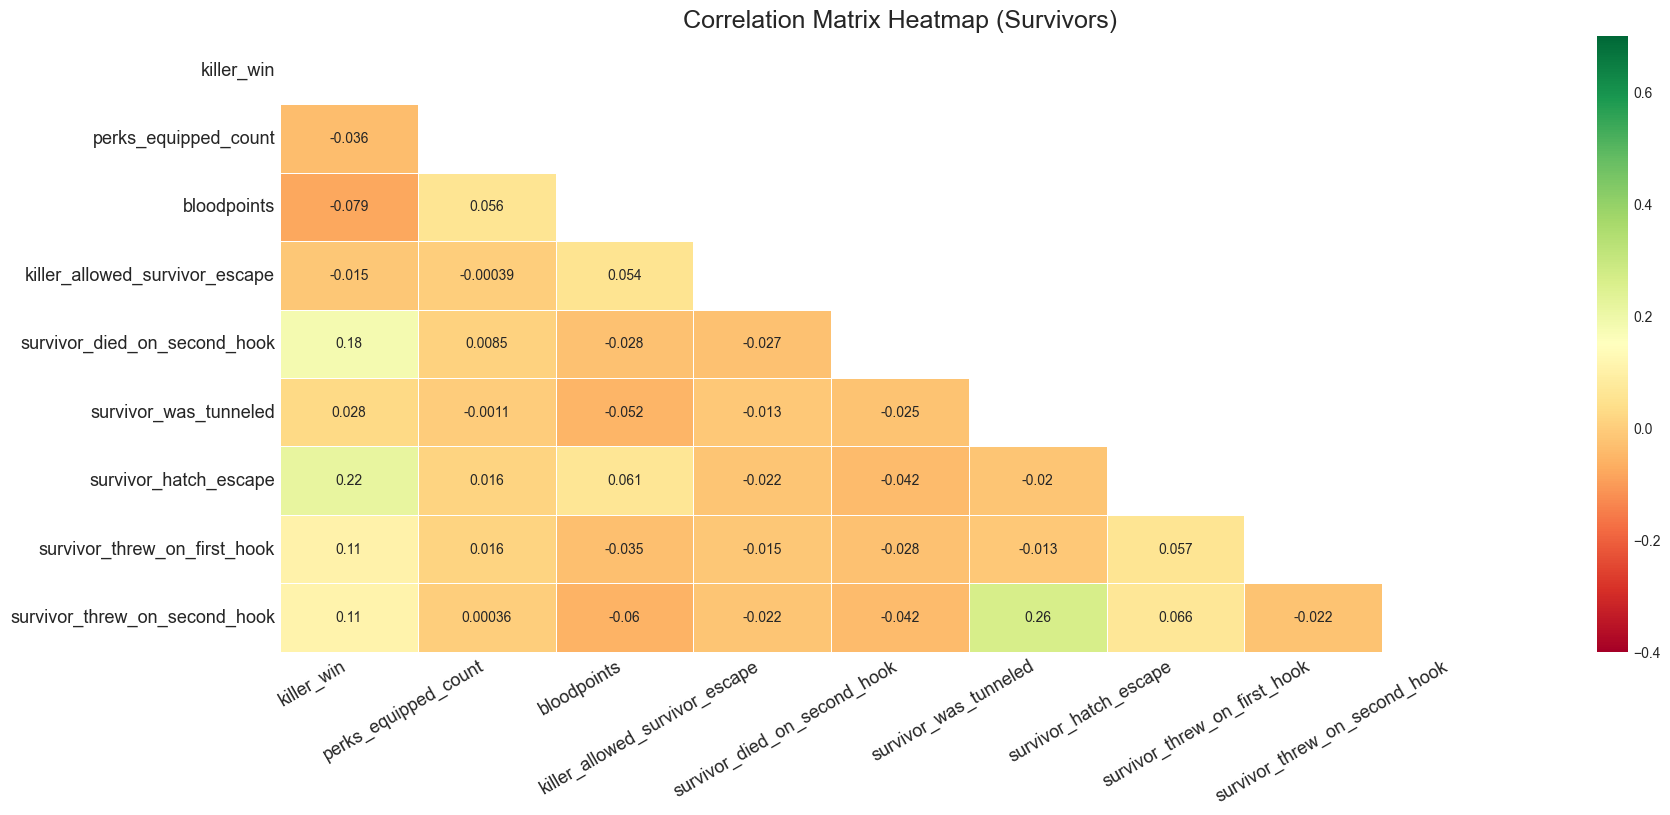

In [143]:
# fact_matches correlation map (survivors)

# Create the correlation matrix
## Commented out some that were not as correlated for ease of readability
corr_matrix = fact_matches[fact_matches["is_survivor"] == 1][[
    "killer_win",
    "perks_equipped_count", 
    "bloodpoints", 
    "killer_allowed_survivor_escape", 
    "survivor_died_on_second_hook",
    "survivor_was_tunneled", 
    "survivor_hatch_escape", 
    "survivor_threw_on_first_hook", 
    "survivor_threw_on_second_hook" 
    # "match_cancelled" ,
    # "player_was_afk",
    # "survivor_went_to_second_phase", 
    # "generators_complete",    
    # "player_attempted_adept", 
    # "player_disconnected", 
    # "survivor_moried", 
]].corr()

# Create a mask to hide upper triangle (readability)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set white style
sns.set_style("white")

# Plotting the heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="RdYlGn", linewidths=.5, vmin=-0.4, vmax=0.7)

# Set title
plt.title('Correlation Matrix Heatmap (Survivors)', fontsize=18)

# Set the font size of the y-axis labels
plt.yticks(ha="right",fontsize=13)

# Rotate xticks for readability 
plt.xticks(rotation=30, ha='right', fontsize=13)

# Display
plt.show()

<h3> DIM_PERKS </h3>

<h4> [Global] Total perks by character category </h4>

In [144]:
# Total perks by player category

# Number of survivor perks
survivor_perk_count = dim_perks[dim_perks["is_survivor"]==1]["perk_name"].count()

# Number of killer perks
killer_perk_count = dim_perks[dim_perks["is_survivor"]==0]["perk_name"].count()

# Print data
print(f'Total perks: {survivor_perk_count + killer_perk_count}')
print(f'Survivor perks: {survivor_perk_count}')
print(f'Killer perks: {killer_perk_count}')

Total perks: 261
Survivor perks: 140
Killer perks: 121


<h4> [Global] Total perks by cost </h4>

In [145]:
# Grab cost data of characters and their perks

# Combine dataframes to get the information we need (cost of perks)
perk_character_data = pd.merge(dim_perks, dim_characters, how='left', left_on='acquired_from', right_on='name')

# Create columns to quickly filter the data we need.
perk_character_data['is_free'] = (perk_character_data['auric_cell_cost'] > 0) & (perk_character_data['iridescent_shard_cost'].notna())
perk_character_data['is_paid'] = (perk_character_data['auric_cell_cost'] > 0) & (perk_character_data['iridescent_shard_cost'].isna())

In [146]:
# Total perks by cost

# Number of free perks
perk_character_data_free = perk_character_data[perk_character_data["is_paid"]==False]["perk_name"].count()

# Number of non-free perks
perk_character_data_cost = perk_character_data[perk_character_data["is_paid"]==True]["perk_name"].count()

# Display data
print(f'Total perks: {perk_character_data_free + perk_character_data_cost}')
print(f'Free perks: {perk_character_data_free}')
print(f'Not free perks: {perk_character_data_cost}')

Total perks: 261
Free perks: 174
Not free perks: 87


<h4> [Global] Total perks by cost & player category </h4>

In [147]:
# Total perks by cost & player category

# Number of free perks by player category
## is_paid is defined under [Global] total perks by cost
perk_character_data_free_survivor = perk_character_data[(perk_character_data["is_paid"]==False) & (perk_character_data["is_survivor_x"]==1)]["perk_name"].count()
perk_character_data_free_killer = perk_character_data[(perk_character_data["is_paid"]==False) & (perk_character_data["is_survivor_x"]==0)]["perk_name"].count()

# Number of non-free perks by player category
## is_paid is defined under [Global] total perks by cost
perk_character_data_cost_survivor = perk_character_data[(perk_character_data["is_paid"]==True) & (perk_character_data["is_survivor_x"]==1)]["perk_name"].count()
perk_character_data_cost_killer = perk_character_data[(perk_character_data["is_paid"]==True) & (perk_character_data["is_survivor_x"]==0)]["perk_name"].count()

# Dispaly data
print(f'Total perks: {perk_character_data_free_survivor + perk_character_data_free_killer + perk_character_data_cost_killer + perk_character_data_cost_survivor}')
print(f'Free perks: survivor: {perk_character_data_free_survivor}')
print(f'Free perks: killer: {perk_character_data_free_killer}')
print(f'Not free perks: survivor: {perk_character_data_cost_survivor}')
print(f'Not free perks: killer: {perk_character_data_cost_killer}')

Total perks: 261
Free perks: survivor: 95
Free perks: killer: 79
Not free perks: survivor: 45
Not free perks: killer: 42


<h4> [Global] Total perk combination by character category </h4>

In [148]:
# Total combinations of perks for survivors and killers 

'''

Players can choose to equip either:
- no perks
- 1 perk
- 2 perks 
- 3 perks 
- 4 perks

Perks are unique and can only be equipped once (as opposed to multiple times)

Blanks can only occur alone or as trailing.
- Additionally, 1 trailing blank is the equivalent to 2 or 3 trailing blanks.

'''

# Create a function to calculate total number of combinations
from math import comb

def calculate_combinations(n):
    blank = 1
    one_item = comb(n, 1)
    two_items = comb(n, 2)
    three_items = comb(n, 3)
    four_items = comb(n, 4)
    
    total = blank + one_item + two_items + three_items + four_items
    
    return total

# Get perk counts for each category of player
survivor_perk_count = fact_perks[fact_perks["is_survivor"] == 1]["perk_name"].count()
killer_perk_count = fact_perks[fact_perks["is_survivor"] == 0]["perk_name"].count()

# Apply the function to each
survivor_combinations = calculate_combinations(survivor_perk_count)
killer_combinations = calculate_combinations(killer_perk_count)

# Print results
print(f"Number of possible survivor combinations: {survivor_combinations}")
print(f"Number of possible killer combinations: {killer_combinations}")

Number of possible survivor combinations: 15787066
Number of possible killer combinations: 8790772


<h3> FACT_MATCHES: PERKS </h3>

<h4> [Global] Top 10 survivor perks </h4>

In [149]:
# Count occurrences of each perk in the dataframe
perk_counts = {}

# Define variable for the columns we're interested in
columns_to_check = ['perk1', 'perk2', 'perk3', 'perk4']

# Loop over each column and count the amount of time each perk was used in total
for col in columns_to_check:
    for perk in dim_perks['perk_name']:
        count = (fact_matches[col] == perk).sum()
        if perk in perk_counts:
            perk_counts[perk] += count
        else:
            perk_counts[perk] = count

# Convert the dictionary to a dataframe for better readability/ease of plotting
perk_counts_df = pd.DataFrame(list(perk_counts.items()), columns=['perk_name', 'count'])


In [150]:
# Create perk_count dataframe for easier aggregating)
perk_counts_df = perk_counts_df.merge(dim_perks[["perk_name","is_survivor"]],on="perk_name",how="left").sort_values(by="count", ascending=False)

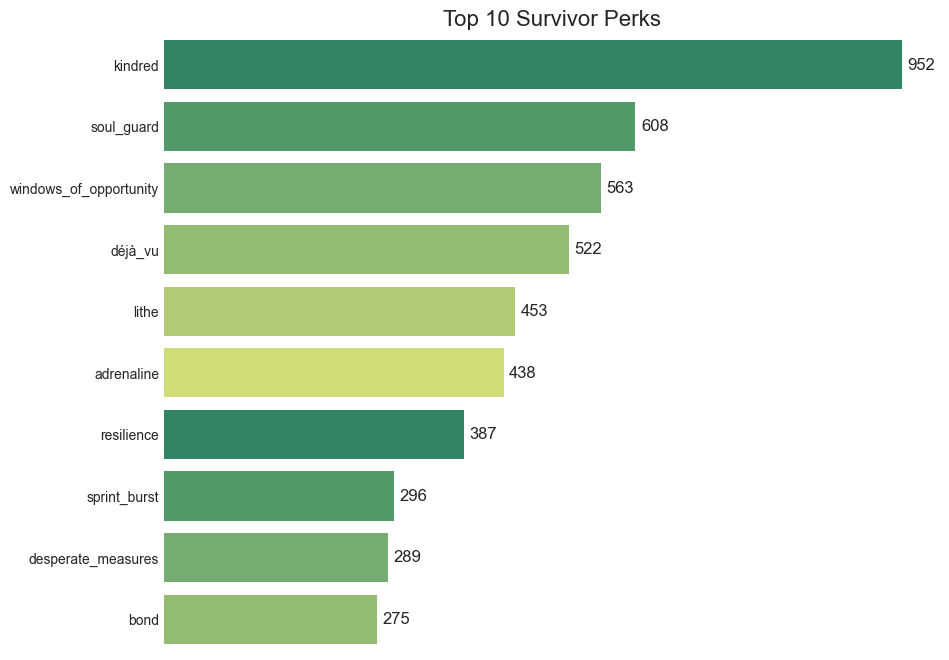

In [151]:
# TOP 10 SURVIVOR PERKS

# Subset data and prepare it for plotting
top_perks_survivors = perk_counts_df[perk_counts_df["is_survivor"] == 1][["perk_name", "count"]].sort_values(by="count", ascending=False).head(10)

# Set bar colours
pastel_colors = sns.color_palette("summer")

# Set white style
sns.set_style("whitegrid") 

# Create plot
## Set labels
## Remove gridlines
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="count", y="perk_name", data=top_perks_survivors, palette=pastel_colors, edgecolor='none')
plt.title('Top 10 Survivor Perks', fontsize=16)
plt.xlabel('') 
plt.ylabel('') 
plt.grid(False) 
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)  

# Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Add value labels
for index, value in enumerate(top_perks_survivors["count"]):
    ax.text(value + 7, index, str(value), va='center', fontsize=12)

# Display
plt.show()


<h4> [Global] Top 10 killer perks </h4>

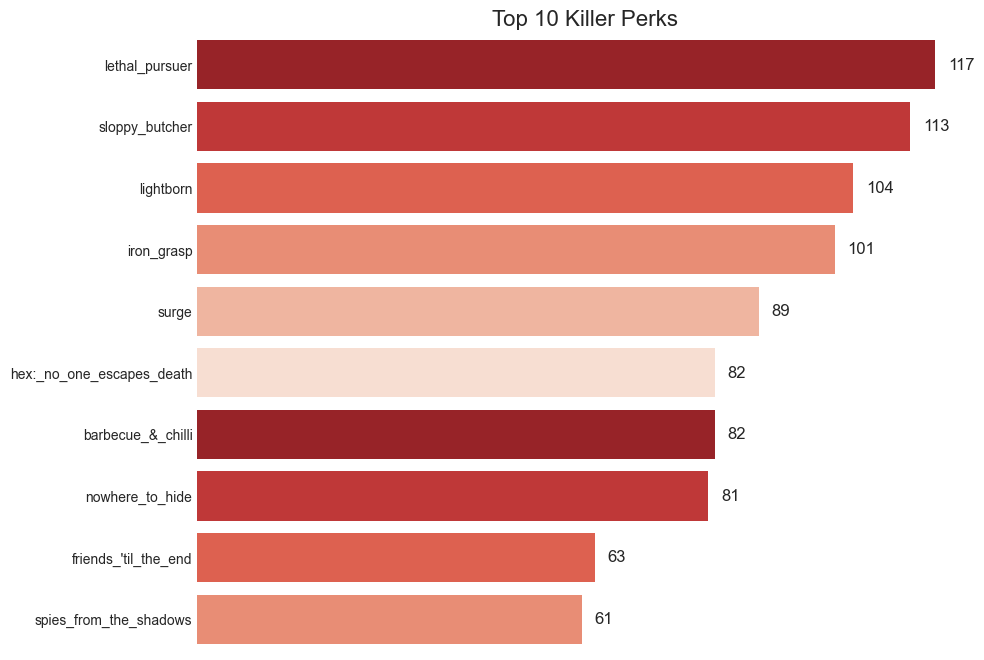

In [152]:
# TOP 10 KILLER PERKS

# Subset data for killer perks
top_perks_killers = perk_counts_df[perk_counts_df["is_survivor"] == 0][["perk_name", "count"]].sort_values(by="count", ascending=False).head(10)

# Set red colour (killers)
pastel_colors = sns.color_palette("Reds_r")

# Set white background
sns.set_style("whitegrid")

# Create plot
## Set title
## Set labels
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="count", y="perk_name", data=top_perks_killers, palette=pastel_colors, edgecolor='none') 
plt.title('Top 10 Killer Perks', fontsize=16)
plt.xlabel('') 
plt.ylabel('')  
plt.grid(False)  
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Add value labels
for index, value in enumerate(top_perks_killers["count"]):
    ax.text(value + 2, index, str(value), va='center', fontsize=12)

# Display plot
plt.show()


<h4> [Weekly] Top 5 survivor/killer perks </h4>

In [153]:
# Count occurrences of each perk in the dataframe week over week

# Set variable to check all 4 perk columns
columns_to_check = ['perk1', 'perk2', 'perk3', 'perk4']

# Melt the df to long format for easier processing
fact_matches_melted = fact_matches.melt(id_vars=['date'], value_vars=columns_to_check, var_name='perk_column', value_name='perk')

# Group by week and perk & count occurrences
fact_matches_melted['week'] = fact_matches_melted['date'].dt.to_period('W').dt.start_time
perk_counts_df = fact_matches_melted.groupby(['week', 'perk']).size().reset_index(name='count')

# Rename columns
perk_counts_df.rename(columns={'perk': 'perk_name'}, inplace=True)

# Sort values 
perk_counts_df = perk_counts_df.sort_values(by=['perk_name', 'week']).reset_index(drop=True)


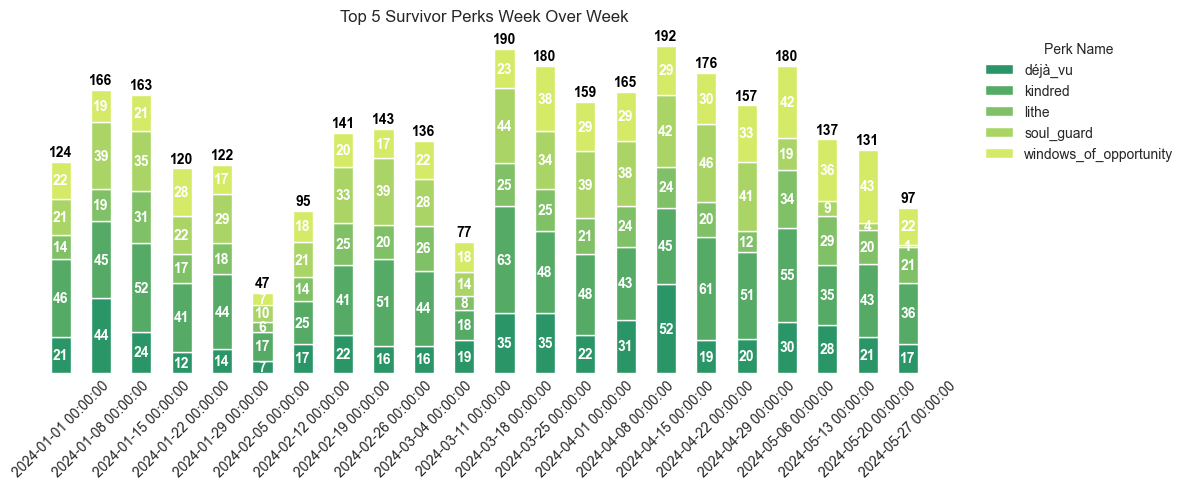

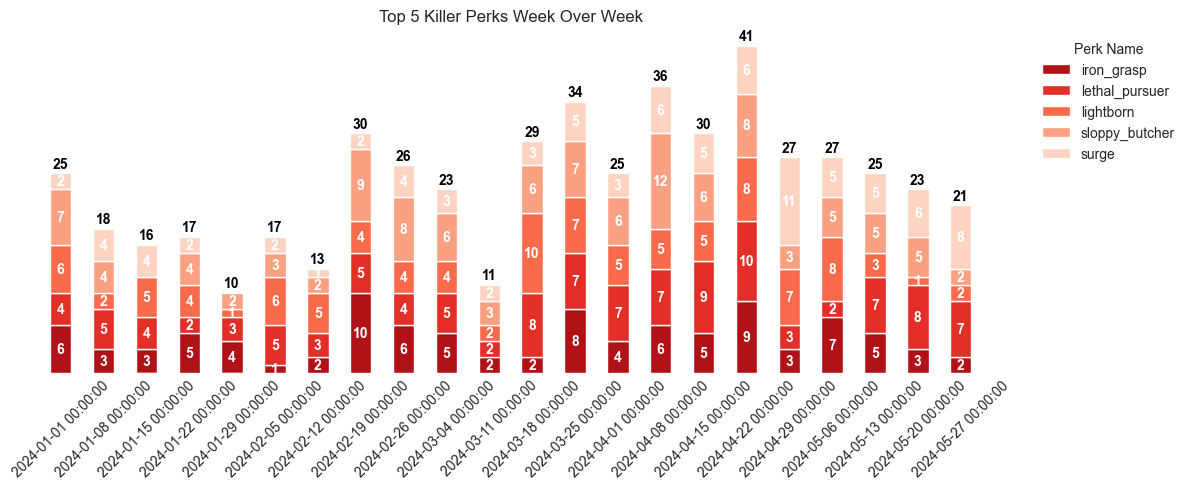

In [154]:
# WEEKLY PERK DATA OVER TIME

# Merge with dim_perks to get is_survivor information
perk_counts_df_merged = perk_counts_df.merge(dim_perks[['perk_name', 'is_survivor']], on='perk_name', how='left')

# Calculate total counts for each perk_name and is_survivor category
perk_totals = perk_counts_df_merged.groupby(['perk_name', 'is_survivor'])['count'].sum()

# Get top 5 survivor perks based on total counts
top_survivor_perks = perk_totals[perk_totals.index.get_level_values('is_survivor') == 1].nlargest(5)

# Get top 5 killer perks based on total counts
top_killer_perks = perk_totals[perk_totals.index.get_level_values('is_survivor') == 0].nlargest(5)

# Filter perk_counts_df_merged to include only the top 5 survivor and killer perks
top_survivor_perks_df = perk_counts_df_merged[perk_counts_df_merged['perk_name'].isin(top_survivor_perks.index.get_level_values('perk_name'))]
top_killer_perks_df = perk_counts_df_merged[perk_counts_df_merged['perk_name'].isin(top_killer_perks.index.get_level_values('perk_name'))]

# Pivot tables for stacked bar charts
survivor_pivot = top_survivor_perks_df.pivot_table(index='week', columns='perk_name', values='count', fill_value=0)
killer_pivot = top_killer_perks_df.pivot_table(index='week', columns='perk_name', values='count', fill_value=0)

# Add value labels
def add_value_labels(ax):
    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate(f'{p.get_height():.0f}', 
                        (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height() / 2.), 
                        ha='center', va='center', xytext=(0, 0), textcoords='offset points', color='white', weight='bold')

# Add total labels
def add_total_labels(ax, data):
    totals = data.sum(axis=1)
    for i, total in enumerate(totals):
        ax.annotate(f'{total:.0f}', 
                    (i, total), 
                    ha='center', va='bottom', xytext=(0, 2), textcoords='offset points', color='black', weight='bold')

# SURVIVOR PLOT
# Set colors for survivor plot
sns.set_palette("summer")
colors_survivor = sns.color_palette("summer", n_colors=top_survivor_perks.size)

# Plotting Survivor Perks
## Setting title & labels
ax = survivor_pivot.plot(kind='bar', stacked=True, figsize=(12, 5), color=colors_survivor)
add_value_labels(ax)
add_total_labels(ax, survivor_pivot)
plt.title('Top 5 Survivor Perks Week Over Week')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)  # For readability
plt.legend(title='Perk Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)

# Remove y-axis label and border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.tick_params(axis='y', which='both', left=False, labelleft=False)

# Plot
plt.tight_layout()
plt.show()

# KILLER PLOT
# Set colors for killer plot
sns.set_palette("Reds_r")
colors_killer = sns.color_palette("Reds_r", n_colors=top_killer_perks.size)

# Plotting Killer Perks
## Setting title & labels
ax = killer_pivot.plot(kind='bar', stacked=True, figsize=(12, 5), color=colors_killer)
add_value_labels(ax)
add_total_labels(ax, killer_pivot)
plt.title('Top 5 Killer Perks Week Over Week')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45) # For readability
plt.legend(title='Perk Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False) 

# Remove y-axis label and border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.tick_params(axis='y', which='both', left=False, labelleft=False)

# Plot
plt.tight_layout()
plt.show()


<h4> [Weekly] Top 5 survivor/killer perks (Line) </h4>

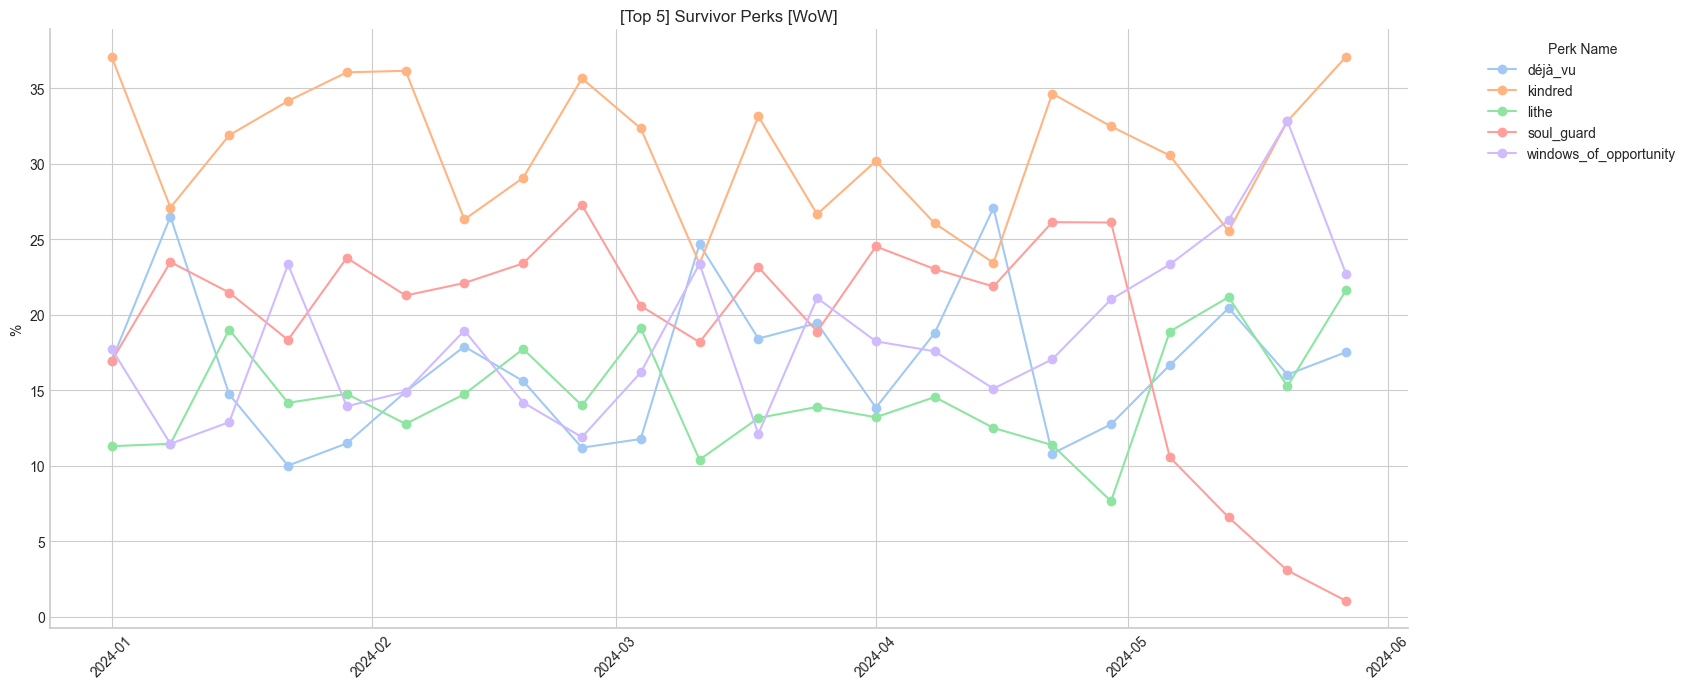

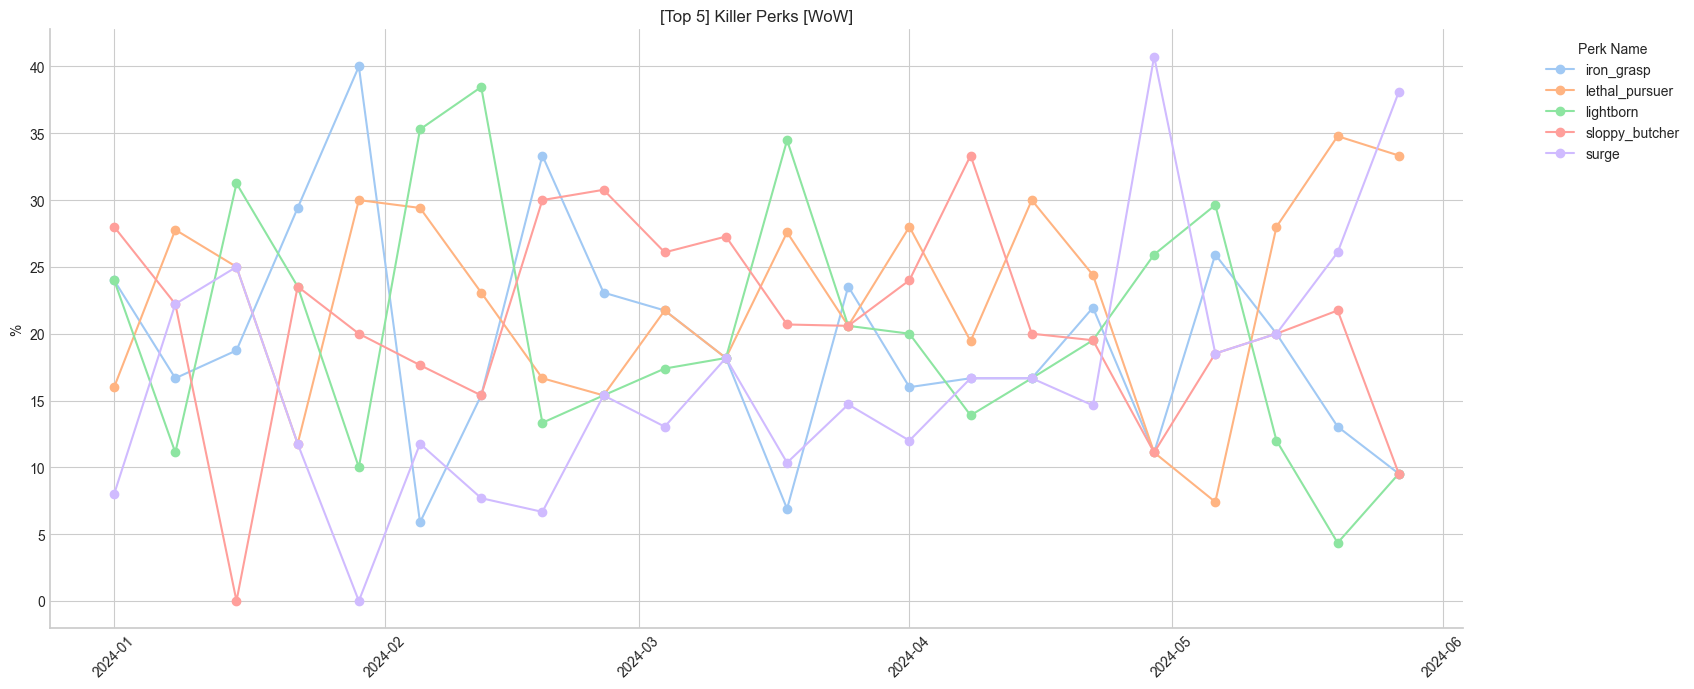

In [155]:
# WEEKLY PERK DATA OVER TIME (NORMALISED)

# Normalize the data to get percentages
survivor_pivot_norm = survivor_pivot.div(survivor_pivot.sum(axis=1), axis=0) * 100
killer_pivot_norm = killer_pivot.div(killer_pivot.sum(axis=1), axis=0) * 100

# Set colors for survivor perks
sns.set_palette("pastel")
colors_survivor = sns.color_palette("pastel", n_colors=top_survivor_perks.size)

# SURVIVORS
# Plot survivor perks
## Set title & labels
plt.figure(figsize=(17, 7))
for perk in survivor_pivot_norm.columns:
    plt.plot(survivor_pivot_norm.index, survivor_pivot_norm[perk], marker='o', label=perk)
plt.title('[Top 5] Survivor Perks [WoW]')
plt.xlabel('')
plt.ylabel('%')
plt.xticks(rotation=45)
plt.legend(title='Perk Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Remove y-axis label and border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Plot
plt.tight_layout()
plt.show()

# KILLERS
# Set colors for killers
sns.set_palette("pastel")
colors_killer = sns.color_palette("pastel", n_colors=top_killer_perks.size)

# Plot killer perks
## Set title & labels
plt.figure(figsize=(17, 7))
for perk in killer_pivot_norm.columns:
    plt.plot(killer_pivot_norm.index, killer_pivot_norm[perk], marker='o', label=perk)
plt.title('[Top 5] Killer Perks [WoW]')
plt.xlabel('')
plt.ylabel('%')
plt.xticks(rotation=45)
plt.legend(title='Perk Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Remove y-axis label and border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Plot
plt.tight_layout()
plt.show()

<h4> [Global] Apriori Analysis: Survivor & Killer perks </h4>

In [156]:
# Look at association rules for DBD Players and their perk usage
## Split into data_recorder / non data recorder & killers vs survivor perks

# Import libraries needed
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Filter for survivors and killers
fact_matches_survivors = fact_matches[fact_matches['is_survivor'] == 1]
fact_matches_killers = fact_matches[fact_matches['is_survivor'] == 0]

# Further filter for data recorder
## In case the data recorder affect the results
fact_matches_survivors_data_recorder = fact_matches_survivors[fact_matches_survivors['is_data_recorder'] == 1]
fact_matches_survivors_non_data_recorder = fact_matches_survivors[fact_matches_survivors['is_data_recorder'] == 0]
fact_matches_killers_data_recorder = fact_matches_killers[fact_matches_killers['is_data_recorder'] == 1]
fact_matches_killers_non_data_recorder = fact_matches_killers[fact_matches_killers['is_data_recorder'] == 0]

def prepare_data(df):
    # Extract perk columns
    perk_columns = ['perk1', 'perk2', 'perk3', 'perk4']
    df_perks = df[perk_columns].fillna('None')

    # Convert each row of perks into a frozenset (to handle as a set in each row)
    transactions = df_perks.apply(frozenset, axis=1).tolist()

    # Get all unique perks
    unique_perks = set().union(*transactions)

    return transactions, unique_perks

# Prepare data for each group
survivor_transactions, survivor_unique_perks = prepare_data(fact_matches_survivors)
killer_transactions, killer_unique_perks = prepare_data(fact_matches_killers)
survivor_data_recorder_transactions, survivor_data_recorder_unique_perks = prepare_data(fact_matches_survivors_data_recorder)
survivor_non_data_recorder_transactions, survivor_non_data_recorder_unique_perks = prepare_data(fact_matches_survivors_non_data_recorder)
killer_data_recorder_transactions, killer_data_recorder_unique_perks = prepare_data(fact_matches_killers_data_recorder)
killer_non_data_recorder_transactions, killer_non_data_recorder_unique_perks = prepare_data(fact_matches_killers_non_data_recorder)

# Convert transactions to a binary matrix
def create_binary_matrix(transactions, unique_items):
    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    df = pd.DataFrame(te_ary, columns=te.columns_)
    return df

# Create binary matrices for each group
survivor_matrix = create_binary_matrix(survivor_transactions, survivor_unique_perks)
killer_matrix = create_binary_matrix(killer_transactions, killer_unique_perks)
survivor_data_recorder_matrix = create_binary_matrix(survivor_data_recorder_transactions, survivor_data_recorder_unique_perks)
survivor_non_data_recorder_matrix = create_binary_matrix(survivor_non_data_recorder_transactions, survivor_non_data_recorder_unique_perks)
killer_data_recorder_matrix = create_binary_matrix(killer_data_recorder_transactions, killer_data_recorder_unique_perks)
killer_non_data_recorder_matrix = create_binary_matrix(killer_non_data_recorder_transactions, killer_non_data_recorder_unique_perks)

# Generate association rules
def generate_association_rules(matrix, min_support=0.05):
    freq_items = apriori(matrix, min_support=min_support, use_colnames=True)
    rules = association_rules(freq_items, metric="lift", min_threshold=1)
    return rules

# Generate association rules for each group
survivor_rules_global = generate_association_rules(survivor_matrix)
killer_rules_global = generate_association_rules(killer_matrix)
survivor_rules_data_recorder = generate_association_rules(survivor_data_recorder_matrix)
survivor_rules_non_data_recorder = generate_association_rules(survivor_non_data_recorder_matrix)
killer_rules_data_recorder = generate_association_rules(killer_data_recorder_matrix)
killer_rules_non_data_recorder = generate_association_rules(killer_non_data_recorder_matrix)

# # Display the results
# print("Association Rules for Survivors Global:")
# print(survivor_rules_global)

# print("\nAssociation Rules for Killers Global:")
# print(killer_rules_global)

# print("\nAssociation Rules for Survivors (Data Recorder):")
# print(survivor_rules_data_recorder)

# print("\nAssociation Rules for Killers (Data Recorder):")
# print(killer_rules_data_recorder)

print("\nAssociation Rules for Survivors (Non-Data Recorder):")
print(survivor_rules_non_data_recorder)

print("\nAssociation Rules for Killers (Non-Data Recorder):")
print(killer_rules_non_data_recorder)



Association Rules for Survivors (Non-Data Recorder):
                antecedents               consequents  antecedent support  consequent support   support  confidence       lift  leverage  conviction  zhangs_metric
0                    (None)            (no_perk_data)            0.097516            0.057471  0.057471    0.589354  10.254753  0.051867    2.295232       1.000000
1            (no_perk_data)                    (None)            0.057471            0.097516  0.057471    1.000000  10.254753  0.051867         inf       0.957514
2                   (lithe)  (windows_of_opportunity)            0.163515            0.194661  0.051168    0.312925   1.607541  0.019338    1.172127       0.451810
3  (windows_of_opportunity)                   (lithe)            0.194661            0.163515  0.051168    0.262857   1.607541  0.019338    1.134766       0.469283

Association Rules for Killers (Non-Data Recorder):
      antecedents     consequents  antecedent support  consequent support 

<h4> [Global] Perks by category count </h4>

/var/folders/49/5y943xb547n64g5m7tnv4jyc0000gn/T/ipykernel_41044/3116889627.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = filtered_data.groupby(['category', 'tier']).size().reset_index(name='count')


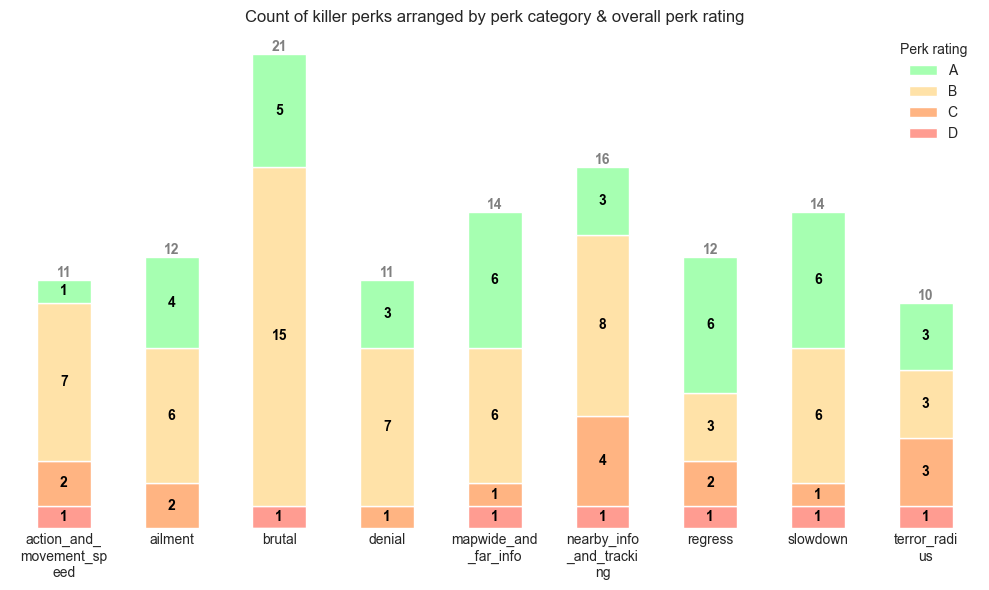

In [157]:
# Import library for the value labels
## This graph was having problems with the labels sitting in the correct place

import textwrap

# Filter the DataFrame for is_survivor == 0
filtered_data = fact_perks[fact_perks["is_survivor"] == 0]

# Aggregate the data to get counts
aggregated_data = filtered_data.groupby(['category', 'tier']).size().reset_index(name='count')

# Pivot the data to get it in the format needed for stacked bar plot
pivot_data = aggregated_data.pivot(index='category', columns='tier', values='count').fillna(0)

# Define the pastel color scheme
pastel_colors = {
    'A': '#a6ffb1',  # light green
    'B': '#ffe2a8',  # light gold
    'C': '#ffb482',  # light orange
    'D': '#ff9c91'   # light red
}

# Put columns in correct order
desired_order = ['D', 'C', 'B', 'A']
pivot_data = pivot_data[desired_order]

# Ensure all columns in pivot_data have a corresponding pastel color
color_list = [pastel_colors.get(tier, 'black') for tier in desired_order]

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot stacked bars with pastel colors
pivot_data.plot(kind='bar', stacked=True, color=color_list, ax=ax)

# Remove background and borders
ax.set_facecolor('none')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove gridlines
ax.grid(False)

# Adding labels and title
ax.set_xlabel("")
plt.title('Count of killer perks arranged by perk category & overall perk rating')

# Add count labels to each section
for i, category in enumerate(pivot_data.index):
    cumulative_count = 0
    for tier in desired_order:
        count = pivot_data.loc[category, tier]
        if count > 0:
            ax.text(
                i,  # x coordinate
                cumulative_count + count / 2,  # y coordinate
                str(int(count)),  # text label as integer
                color='black', 
                va='center', ha='center',
                fontweight='bold', 
                fontsize=10  
            )
            cumulative_count += count
    
    # Add total value label for each category
    total_count = pivot_data.loc[category].sum()
    ax.text(
        i,  # x coordinate (same as stacked bar)
        pivot_data.loc[category].sum(),  # y coordinate (top of stacked bar)
        str(int(total_count)),  # total value label as integer
        color='grey', 
        va='bottom', ha='center', 
        fontweight='bold', 
        fontsize=10  
    )

# Reorder the legend (for readability)
handles, labels = ax.get_legend_handles_labels()
legend_order = ['A', 'B', 'C', 'D']
ordered_handles = [handles[labels.index(tier)] for tier in legend_order]
ordered_labels = [tier for tier in legend_order]

ax.legend(ordered_handles, ordered_labels, title="Perk rating")

# X axis ticks / labels
max_label_length = 11 # Otherwise it was looking messy.
wrapped_labels = [textwrap.fill(label, max_label_length) for label in pivot_data.index]
ax.set_xticks(range(len(pivot_data.index)))
ax.set_xticklabels(wrapped_labels, rotation=0, ha='center', fontsize=10, wrap=True)

# Remove y-axis labels
ax.set_yticklabels([])

# Ensure tight layout
plt.tight_layout()

# Show the plot
plt.show()


<h3> DIM_CHARACTERS </h3>

<h4> [Global] Total character by category </h4>

In [158]:
# Total characters
print("Total characters:")
print(int(dim_characters["name"].nunique()))

print("\n")

# Total survivors vs killers
print("Total survivors:")
print(dim_characters[dim_characters["is_survivor"]==1]["name"].count().round(2))

print("\n")

print("Total survivors (%):")
print(((dim_characters[dim_characters["is_survivor"]==1]["name"].count())/(dim_characters[["name"]].count())).values[0].round(2)*100)

print("\n")

print("Total killers:")
print(dim_characters[dim_characters["is_survivor"]==0]["name"].count().round(2))

print("\n")

print("Total killers (%):")
print(((dim_characters[dim_characters["is_survivor"]==0]["name"].count())/(dim_characters[["name"]].count())).values[0].round(2)*100)


Total characters:
78


Total survivors:
42


Total survivors (%):
54.0


Total killers:
36


Total killers (%):
46.0


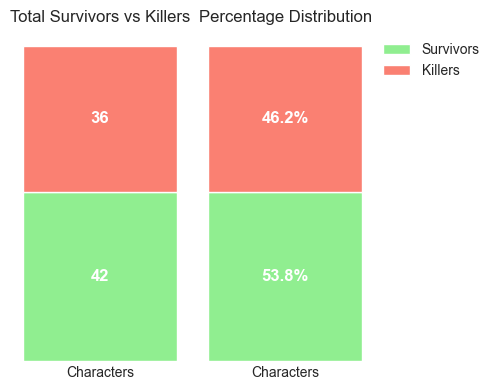

In [159]:
# Total character count (split by character category: survivor vs killer)

# Calculate datapoints 
total_characters = dim_characters["name"].nunique()
total_survivors = dim_characters[dim_characters["is_survivor"] == 1]["name"].count()
total_killers = dim_characters[dim_characters["is_survivor"] == 0]["name"].count()

# Calculate percentages
survivor_percentage = (total_survivors / total_characters) * 100
killer_percentage = (total_killers / total_characters) * 100

# Plot
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(5, 4))

# Stacked bar plot for total survivors and killers
ax.bar('Characters', total_survivors, width=0.1, label='Survivors', color='lightgreen')
ax.bar('Characters', total_killers, width=0.1, bottom=total_survivors, label='Killers', color='salmon')

# Add data labels
ax.text(0, total_survivors / 2, str(total_survivors), ha='center', va='center', fontweight='bold', fontsize=12, color='white')
ax.text(0, total_survivors + (total_killers / 2), str(total_killers), ha='center', va='center', fontweight='bold', fontsize=12, color='white')

# Stacked bar plot for percentage distribution
ax2.bar('Characters', survivor_percentage, width=0.1, label='Survivors', color='lightgreen')
ax2.bar('Characters', killer_percentage, width=0.1, bottom=survivor_percentage, label='Killers', color='salmon')

# Add percentage labels
ax2.text(0, survivor_percentage / 2, f"{survivor_percentage:.1f}%", ha='center', va='center', fontweight='bold', fontsize=12, color='white')
ax2.text(0, survivor_percentage + (killer_percentage / 2), f"{killer_percentage:.1f}%", ha='center', va='center', fontweight='bold', fontsize=12, color='white')

# Remove y axis, y labels, and y ticks
ax.yaxis.set_visible(False)
ax2.yaxis.set_visible(False)

# Remove gridlines
ax.grid(False)
ax2.grid(False)

# Remove border box
for spine in ax.spines.values():
    spine.set_visible(False)
for spine in ax2.spines.values():
    spine.set_visible(False)

# Add titles
ax.set_title('Total Survivors vs Killers')
ax2.set_title('Percentage Distribution')

# Add legend
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Display the plots
plt.tight_layout()
plt.show()


<h4> [Global] Total character by cost & unlock status </h4>

In [160]:
# Total unlockable characters (total number of characters with an auric_cell cost)
print("Total number of unlockable characters (i.e. that have an auric cell cost):")
print(dim_characters[dim_characters["auric_cell_cost"] > 0]["name"].count())

print("\n")

# Total unlockable characters (total number of characters with an auric_cell cost) (%)
print("Total % unlockable characters:")
print(round(dim_characters[dim_characters["auric_cell_cost"] > 0]["name"].count() / int(dim_characters["name"].nunique()),2)*100)

print("\n")

# Total default characters (without an auric_cell cost)
print("Total number of default characters (i.e. that don't have an auric cell cost):")
print(dim_characters[dim_characters["auric_cell_cost"].isna()]["name"].count())

print("\n")

# Total default characters (without an auric_cell cost) (%)
print("Total % default characters:")
print(round(dim_characters[dim_characters["auric_cell_cost"].isna()]["name"].count()/ int(dim_characters["name"].nunique()),2)*100)

print("\n")

# Total number of survivors with an auric cell  cost
print("Total default survivors (i.e. with an auric cell  cost):")
print(dim_characters[(dim_characters["auric_cell_cost"] > 0) & (dim_characters["is_survivor"] == 1)]["name"].count())

print("\n")

# Total number of killers with an auric cell  cost
print("Total default killers (i.e. with an auric cell  cost):")
print(dim_characters[(dim_characters["auric_cell_cost"] > 0) & (dim_characters["is_survivor"] == 0)]["name"].count())

print("\n")


# Total number default survivors (without an auric cell  cost)
print("Total default survivors (i.e. with an auric cell  cost):")
print(dim_characters[(dim_characters["auric_cell_cost"].isna()) & (dim_characters["is_survivor"] == 1)]["name"].count())

print("\n")

# Total number of killers (without an auric cell  cost)
print("Total default killers (i.e. with an auric cell  cost):")
print(dim_characters[(dim_characters["auric_cell_cost"].isna()) & (dim_characters["is_survivor"] == 0)]["name"].count())

print("\n")

Total number of unlockable characters (i.e. that have an auric cell cost):
63


Total % unlockable characters:
81.0


Total number of default characters (i.e. that don't have an auric cell cost):
15


Total % default characters:
19.0


Total default survivors (i.e. with an auric cell  cost):
34


Total default killers (i.e. with an auric cell  cost):
29


Total default survivors (i.e. with an auric cell  cost):
8


Total default killers (i.e. with an auric cell  cost):
7




<h4> [Global] Total character by cost & category </h4>

In [161]:
## COST 

# Total unlockable characters cost in euros
## Total unlockable characters cost (in euros)
print("Total cost of unlockable characters (i.e. that have an auric cell cost):")
print(round(dim_characters[dim_characters["auric_cell_cost"] > 0]["total_cost_euros"].sum(),2),"EUR")

print("\n")

# Total unlockable characters that can be bought with in-game currency
print("Total unlockable characters that can be bought with in-game currency:")
print(int(round(dim_characters[dim_characters["auric_cell_cost"] > 0]["iridescent_shard_cost"].count(),0)))

# Total % unlockable characters that can be bought with in-game currency
print("% unlockable characters that can be bought with in-game currency:")
print(round((int(round(dim_characters[dim_characters["auric_cell_cost"] > 0]["iridescent_shard_cost"].count(),0))/dim_characters[dim_characters["auric_cell_cost"] > 0]["name"].count()*100),1))

print("\n")

# Total unlockable characters that CANT be bought with in-game currency
print("Total number of unlockable characters that CANT be bought with in-game currency:")
print(int(round(dim_characters[dim_characters["is_licensed"] ==1]["name"].count(),0)))

# Total % unlockable characters that CANT be bought with in-game currency
print("% of unlockable characters that CANT be bought with in-game currency:")
print(round((int(round(dim_characters[dim_characters["is_licensed"] ==1]["name"].count(),0))/dim_characters[dim_characters["auric_cell_cost"] > 0]["name"].count()*100),1))

print("\n")

# Total unlockable characters cost in in-game currency
print("Total number of unlockable characters that can be bought with in-game currency - cost:")
print(int(round(dim_characters[dim_characters["auric_cell_cost"] > 0]["iridescent_shard_cost"].sum(),0)),"Iri shards")

print("\n")

# Total unlockable characters cost in euros
print("Total number of unlockable characters that can be bought with in-game currency - cost:")
print(round(dim_characters[(dim_characters["auric_cell_cost"] > 0) & (dim_characters["iridescent_shard_cost"] >0)]["total_cost_euros"].sum(),2),"EUR")
print(int(dim_characters[(dim_characters["auric_cell_cost"] > 0) & (dim_characters["iridescent_shard_cost"] >0)]["auric_cell_cost"].sum()),"AUR")
print(int(dim_characters[(dim_characters["auric_cell_cost"] > 0) & (dim_characters["iridescent_shard_cost"] >0)]["iridescent_shard_cost"].sum()),"IRIS")


print("\n")

# Total cost (euros) characters that CANT be bought with in-game currency
print("Total cost of unlockable characters that CANT be bought with in-game currency (licensed):")
print(round(dim_characters[dim_characters["is_licensed"] == 1]["total_cost_euros"].sum(),2),"EUR")
print(int(dim_characters[dim_characters["is_licensed"] == 1]["auric_cell_cost"].sum()),"AUR")
print(int(dim_characters[dim_characters["is_licensed"] == 1]["iridescent_shard_cost"].sum()),"IRIS")

print("\n")

# KILLER Total unlockable characters cost in euros
print("Killer: Total number of unlockable characters that can be bought with in-game currency - cost:")
print(round(dim_characters[(dim_characters["auric_cell_cost"] > 0) & (dim_characters["iridescent_shard_cost"] >0) & (dim_characters["is_survivor"] ==0)]["total_cost_euros"].sum(),2),"EUR")
print(int(dim_characters[(dim_characters["auric_cell_cost"] > 0) & (dim_characters["iridescent_shard_cost"] >0) & (dim_characters["is_survivor"] ==0)]["auric_cell_cost"].sum()),"AUR")
print(int(dim_characters[(dim_characters["auric_cell_cost"] > 0) & (dim_characters["iridescent_shard_cost"] >0) & (dim_characters["is_survivor"] ==0)]["iridescent_shard_cost"].sum()),"IRIS")


print("\n")

# Killer Total cost (euros) characters that CANT be bought with in-game currency
print("Killer: Total cost of unlockable characters that CANT be bought with in-game currency (licensed):")
print(round(dim_characters[(dim_characters["is_licensed"] == 1) & (dim_characters["is_survivor"] ==0)]["total_cost_euros"].sum(),2),"EUR")
print(int(dim_characters[(dim_characters["is_licensed"] == 1) & (dim_characters["is_survivor"] ==0)]["auric_cell_cost"].sum()),"AUR")
print(int(dim_characters[(dim_characters["is_licensed"] == 1)& (dim_characters["is_survivor"] ==0)]["iridescent_shard_cost"].sum()),"IRIS")

print("\n")

# SURVIVOR Total unlockable characters cost in euros
print("Survivor: Total number of unlockable characters that can be bought with in-game currency - cost:")
print(round(dim_characters[(dim_characters["auric_cell_cost"] > 0) & (dim_characters["iridescent_shard_cost"] >0) & (dim_characters["is_survivor"] ==1)]["total_cost_euros"].sum(),2),"EUR")
print(int(dim_characters[(dim_characters["auric_cell_cost"] > 0) & (dim_characters["iridescent_shard_cost"] >0) & (dim_characters["is_survivor"] ==1)]["auric_cell_cost"].sum()),"AUR")
print(int(dim_characters[(dim_characters["auric_cell_cost"] > 0) & (dim_characters["iridescent_shard_cost"] >0) & (dim_characters["is_survivor"] ==1)]["iridescent_shard_cost"].sum()),"IRIS")


print("\n")

# SURVIVOR Total cost (euros) characters that CANT be bought with in-game currency
print("Survivor: Total cost of unlockable characters that CANT be bought with in-game currency (licensed):")
print(round(dim_characters[(dim_characters["is_licensed"] == 1) & (dim_characters["is_survivor"] ==1)]["total_cost_euros"].sum(),2),"EUR")
print(int(dim_characters[(dim_characters["is_licensed"] == 1) & (dim_characters["is_survivor"] ==1)]["auric_cell_cost"].sum()),"AUR")
print(int(dim_characters[(dim_characters["is_licensed"] == 1)& (dim_characters["is_survivor"] ==1)]["iridescent_shard_cost"].sum()),"IRIS")

Total cost of unlockable characters (i.e. that have an auric cell cost):
244.65 EUR


Total unlockable characters that can be bought with in-game currency:
32
% unlockable characters that can be bought with in-game currency:
50.8


Total number of unlockable characters that CANT be bought with in-game currency:
31
% of unlockable characters that CANT be bought with in-game currency:
49.2


Total number of unlockable characters that can be bought with in-game currency - cost:
162000 Iri shards


Total number of unlockable characters that can be bought with in-game currency - cost:
89.96 EUR
9000 AUR
162000 IRIS


Total cost of unlockable characters that CANT be bought with in-game currency (licensed):
154.69 EUR
15500 AUR
0 IRIS


Killer: Total number of unlockable characters that can be bought with in-game currency - cost:
42.48 EUR
4250 AUR
76500 IRIS


Killer: Total cost of unlockable characters that CANT be bought with in-game currency (licensed):
69.86 EUR
7000 AUR
0 IRIS


Survivo

<h4> [Yearly] Count of characters by release year </h4>

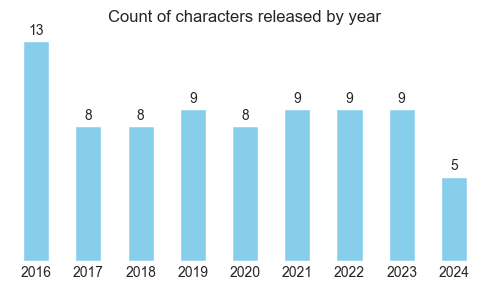

In [162]:
# Count of characters by release year 
dim_characters['release_date'] = pd.to_datetime(dim_characters['release_date'])
dim_characters['release_year'] = dim_characters['release_date'].dt.year

# Group by release_year and count occurrences of name
release_counts = dim_characters.groupby('release_year')['name'].count()

# Create figure
plt.figure(figsize=(5, 3))
bars = release_counts.plot(kind='bar', color='skyblue')

# Title and labels
plt.title('Count of characters released by year')
plt.xlabel('')
plt.ylabel('')  # Empty string to remove y-axis label
plt.yticks([])
plt.xticks(rotation=0)
plt.tick_params(axis='x', which='both', bottom=False, top=False) 

# Remove gridlines
plt.grid(False)

# Remove border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['bottom'].set_visible(False) 
plt.gca().spines['left'].set_visible(False)  

# Add value labels
for i, count in enumerate(release_counts):
    plt.text(i, count + 0.2, str(count), ha='center', va='bottom')

# Plot
plt.tight_layout()
plt.show()

<h4> [Yearly] Count of characters by release year & cost </h4>

In [163]:
# Create free-vs-paid killer count dataset (to plot)

# Define free and paid killers
dim_characters['is_free'] = (dim_characters['auric_cell_cost'] > 0) & (dim_characters['iridescent_shard_cost'].notna())
dim_characters['is_paid'] = (dim_characters['auric_cell_cost'] > 0) & (dim_characters['iridescent_shard_cost'].isna())

# Group by release_year and cost type, then count occurrences of name
free_counts = dim_characters[dim_characters['is_free']].groupby('release_year')['name'].count()
paid_counts = dim_characters[dim_characters['is_paid']].groupby('release_year')['name'].count()

# Combine into a single dataframe
release_counts = pd.DataFrame({'Free characters': free_counts, 'Paid characters': paid_counts}).fillna(0)


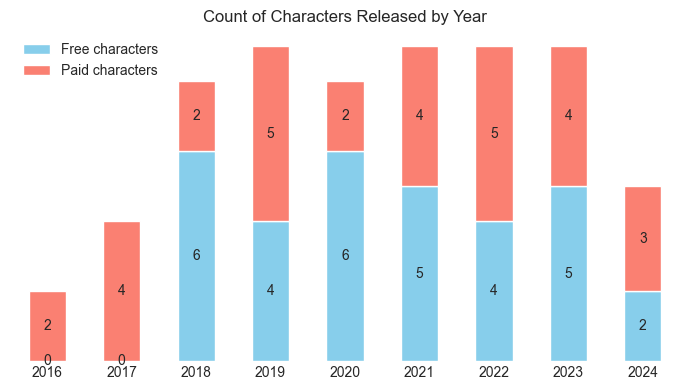

In [164]:
# Count of characters released by year - stacked by free/paid

# Plot stacked bar chart
ax = release_counts.sort_values(by='release_year', ascending=True).plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(7,4))

# Title, labels and ticks
plt.title('Count of Characters Released by Year')
plt.xlabel('')
plt.ylabel('')
plt.yticks([])
plt.xticks(rotation=0)
plt.tick_params(axis='x', which='both', bottom=False, top=False)

# Remove gridlines
plt.grid(False)

# Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Add value labels
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width / 2, y + height / 2, int(height), ha='center', va='center')

# Plot
plt.tight_layout()
plt.show()


<h4> [Global] Count of characters by release year </h4>

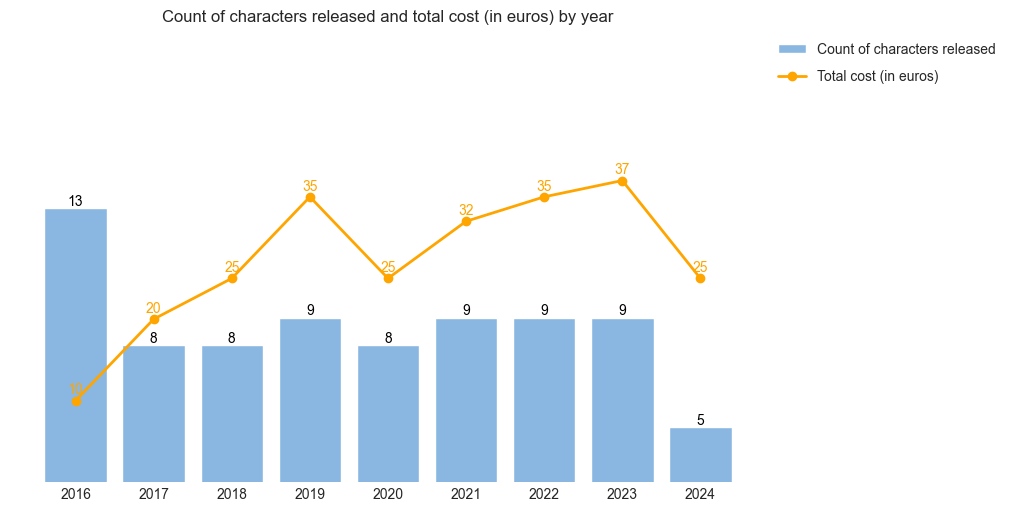

In [165]:
# Cost of characters vs release year (grouped by character categories)
release_counts = dim_characters.groupby('release_year')['name'].count()
total_cost_euros_all_characters = dim_characters.groupby('release_year')['total_cost_euros'].sum()

# Create figure
fig, ax1 = plt.subplots(figsize=(10, 5), constrained_layout=True)

# Bar plot for character counts
bars = ax1.bar(release_counts.index, release_counts.values, color='#8ab7e2', label='Count of characters released')

# Custom rounding function 
## Previously the values were rounding down even when values were above .5 
## To ensure consistency and accuracy, I added this check in
def custom_round(value):
    return np.floor(value) + 1 if value - np.floor(value) > 0.5 else np.floor(value)

# Apply custom rounding
total_cost_euros_all_characters = total_cost_euros_all_characters.apply(custom_round)

# Add value labels
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', color='black', fontsize=10)

# Line plot for total cost in euros
ax2 = ax1.twinx()
line = ax2.plot(total_cost_euros_all_characters.index, total_cost_euros_all_characters.values, color='orange', marker='o', linestyle='-', linewidth=2, label='Total cost (in euros)')

# Adding value labels to the line points
for i, txt in enumerate(total_cost_euros_all_characters.values):
    ax2.annotate(int(txt), (total_cost_euros_all_characters.index[i], txt), textcoords="offset points", xytext=(0, 5), ha='center', color='orange')

# Adjust y-axis limits for ax1 to make the line graph sit higher
## It was looking messy without
ax1.set_ylim(3, release_counts.max() * 1.5)
ax2.set_ylim(0, total_cost_euros_all_characters.max() * 1.5)

# Combine legends from both axes and place them outside the plot
bars_legend = ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))
line_legend = ax2.legend(loc='upper left', bbox_to_anchor=(1, 0.94))

# Setting labels & ticks
ax1.set_title('Count of characters released and total cost (in euros) by year')
ax1.set_xlabel('')
ax1.set_ylabel("")
ax2.set_ylabel("")
ax2.set_yticks([])
ax1.set_yticks([])
plt.xticks(release_counts.index, rotation=0)

# Remove gridlines on both plots
ax1.grid(False)
ax2.grid(False)

# Hide borders on both charts
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

# plt.tight_layout()
plt.show()

<h4> [Global] Count of must-buy characters by release year </h4>

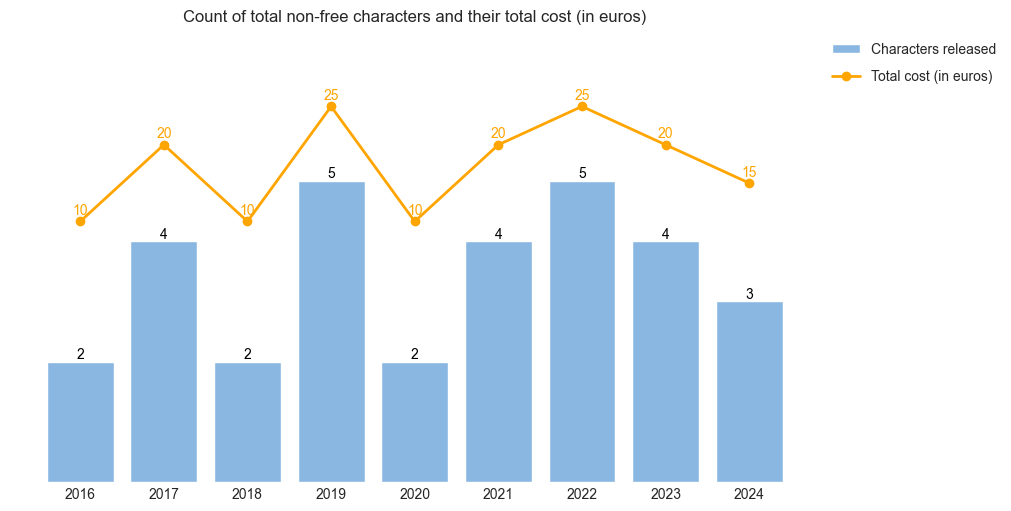

In [166]:
#Q: How much does it cost if you buy only the characters that need to be purchased with money?

# Release counts of characters (by year)
release_counts = dim_characters[dim_characters['is_paid']].groupby('release_year')['name'].count()

# Filtering the dim_characters dataframe for paid characters
filtered_characters = dim_characters[dim_characters['is_paid']]

# Calculating the total cost in euros for the paid characters
total_cost_euros_paid_characters = filtered_characters.groupby('release_year')['total_cost_euros'].sum()

# Custom rounding function
## The rounding was off, it was rounding down even when value was above .5
## Added this in to correct this and to keep the data accurate
def custom_round(value):
    return np.floor(value) + 1 if value - np.floor(value) > 0.5 else np.floor(value)

# Apply custom rounding
total_cost_euros_paid_characters = total_cost_euros_paid_characters.apply(custom_round)

# Create a plot/figure
fig, ax1 = plt.subplots(figsize=(10, 5), constrained_layout=True)

# Bar plot for character counts
bars = ax1.bar(release_counts.index, release_counts.values, color='#8ab7e2', label='Characters released')

# Add value labels for bar plot
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', color='black', fontsize=10)

# Line plot for total cost in euros
ax2 = ax1.twinx()
line = ax2.plot(total_cost_euros_paid_characters.index, total_cost_euros_paid_characters.values, color='orange', marker='o', linestyle='-', linewidth=2, label='Total cost (in euros)')

# Add value labels to the line plot
for i, txt in enumerate(total_cost_euros_paid_characters.values):
    ax2.annotate(int(txt), (total_cost_euros_paid_characters.index[i], txt), textcoords="offset points", xytext=(0, 5), ha='center', color='orange')

# Adjust y-axis limits for ax1 to make the line graph sit higher
## It was looking messy without
ax1.set_ylim(0, release_counts.max() * 1.5)
ax2.set_ylim(-24, total_cost_euros_paid_characters.max() * 1.4)

# Combine legends from both axes and place them outside the plot
bars_legend = ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))
line_legend = ax2.legend(loc='upper left', bbox_to_anchor=(1, 0.94))

# Setting labels & ticks
ax1.set_title('Count of total non-free characters and their total cost (in euros)')
ax1.set_xlabel('')
ax1.set_ylabel("")
ax2.set_ylabel("")
ax2.set_yticks([])
ax1.set_yticks([])
plt.xticks(release_counts.index, rotation=0)

# Remove gridlines (from both plots)
ax1.grid(False)
ax2.grid(False)

# Remove borders
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

# Plot
plt.show()
